# Lending Club Loan Approval System

## Business Background

Lending Club is a peer-to-peer lending company where individuals can borrow loans, and investors can fund those loans. Lending Club was founded in 2006 by Renaud Laplanche as a peer-to-peer (P2P) lending platform in San Francisco. It was one of the pioneers in the online lending space, where individual borrowers could obtain loans, and individual or institutional investors could invest in these loans to earn interest. The platform allowed for a more direct connection between lenders and borrowers, bypassing traditional banking intermediaries.

Read more here https://en.wikipedia.org/wiki/LendingClub

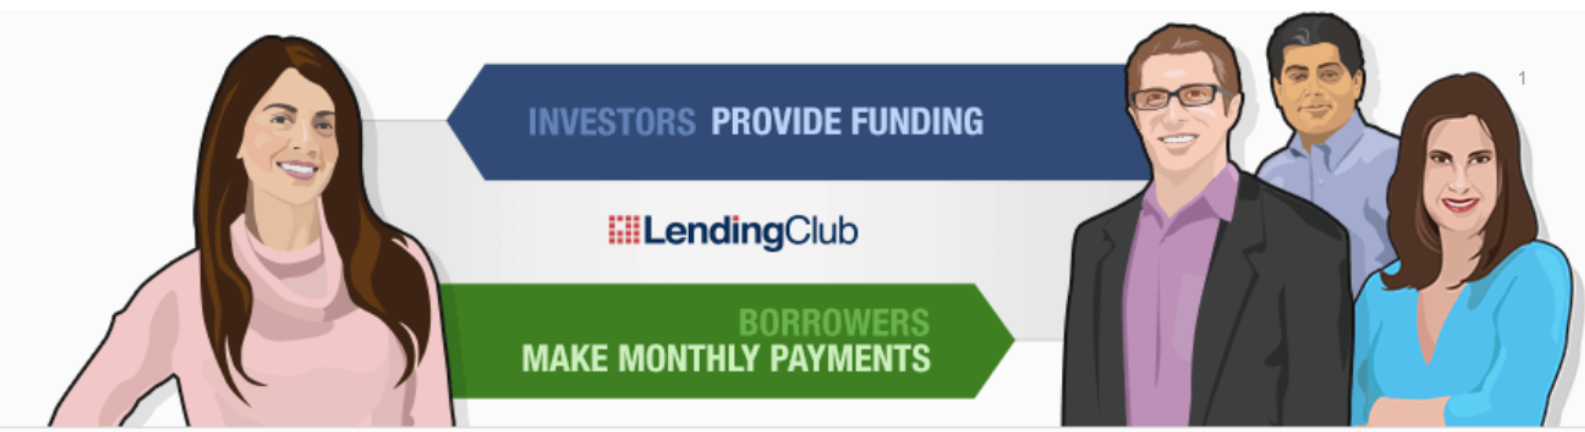

## Problem Statement

Now, whenever *Lending Club* approves a loan, there are two ways in which it is at risk:
- If LC approves a loan and the borrower fails to repay it on time
- If LC rejects a loan despite the borrower being capable of repaying the loan

Defaulting on loans can lead to significant financial losses for both the platform and investors. Similarly, not providing loans to credit-worthy customers can lead to missing out on potential revenue and profits. Therefore, a robust loan approval system is the need of the hour.

In the current loan approval process, underwriters evaluate loan applications by manually reviewing credit scores, income, debt, etc. and then, based on several parameters, either approve or reject a loan. This process is time-consuming and prone to errors.

Hence, Lending Club wants to build a loan approval system using Machine Learning models to automatically assess whether a given loan is likely to be repaid or whether the borrower is likely to default.

This is where you come in! As a budding data scientist, your goal is to help out Lending Club in creating this ML model that helps them predict whether a loan is likely to default or not.

## Data Understanding

You have been provided with around 38k loan application data from the Lending Club's website. The different columns and their description are mentioned below:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

...

## PLEASE NOTE:
## OBSERVATIONS ARE WRITTEN AFTER EACH CODE CELL INSTEAD OF EVERYTHING AT THE BOTTOM FOR EASY FLOW.

## Starter Code

### Necessary Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

### Data Loading

In [4]:
# mount my google drive
#from google.colab import drive
#drive.mount('/content/drive')

## Load the dataset
#loan_data = pd.read_csv('/content/loans.csv')

from google.colab import files

# Upload file(s)
uploaded = files.upload()

# 'uploaded' is a dict: filename -> file data
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')

loan_data = pd.read_csv('loans.csv')

Saving loans.csv to loans.csv
User uploaded file "loans.csv" with length 6367566 bytes


In [5]:
## Observe the first few rows
loan_data.head()

## Do you observe any issues?
## Yes, the features belonged to different types: numerical, float, string, alpha-numeric, etc
#1: Need to convert 'term', 'int_rate', 'emp_length' and 'revol_util' to the types they were defined as

id  member_id  loan_amnt        term int_rate  installment grade  \
0  1077501  1296599.0     5000.0   36 months   10.65%       162.87     B   
1  1077430  1314167.0     2500.0   60 months   15.27%        59.83     C   
2  1077175  1313524.0     2400.0   36 months   15.96%        84.33     C   
3  1076863  1277178.0    10000.0   36 months   13.49%       339.31     C   
4  1075269  1311441.0     5000.0   36 months    7.90%       156.46     A   

  sub_grade emp_length home_ownership  annual_inc verification_status  \
0        B2  10+ years           RENT     24000.0            Verified   
1        C4   < 1 year           RENT     30000.0     Source Verified   
2        C5  10+ years           RENT     12252.0        Not Verified   
3        C1  10+ years           RENT     49200.0     Source Verified   
4        A4    3 years           RENT     36000.0     Source Verified   

          purpose    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
0     credit_card  27.65          0.0             1.0       3.0      0.0   
1             car   1.00          0.0             5.0       3.0      0.0   
2  small_business   8.72          0.0             2.0       2.0      0.0   
3           other  20.00          0.0             1.0      10.0      0.0   
4         wedding  11.20          0.0             3.0       9.0      0.0   

   revol_bal revol_util  total_acc  last_pymnt_amnt  loan_status  
0    13648.0      83.7%        9.0           171.62   Fully Paid  
1     1687.0       9.4%        4.0           119.66  Charged Off  
2     2956.0      98.5%       10.0           649.91   Fully Paid  
3     5598.0        21%       37.0           357.48   Fully Paid  
4     7963.0      28.3%       12.0           161.03   Fully Paid

Observations:

The features belonged to different types: numerical, float, string, alpha-numeric, etc
Need to convert 'term', 'int_rate', 'emp_length' and 'revol_util' to the types they were defined as.

In [6]:
## Check the dataframe structure - datatypes and number of non-null rows
loan_data.info()

# data has 10 categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           37734 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

Observations:

There are 10 categorical features and the remaining numerical.

In [7]:
## Check the shape
loan_data.shape

# moderate 38K dataset with 23 features


(38770, 23)

Observations:

Dataset has a total of 38770 entries for the 23 features.

In [8]:
## Check the missing values across the columns

pd.DataFrame(loan_data.isnull().sum(), columns=['Missing Values'])

# 1036 employment length and 50 revolving utilization are missing


Missing Values
id                                0
member_id                         0
loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                     1036
home_ownership                    0
annual_inc                        0
verification_status               0
purpose                           0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       50
total_acc                         0
last_pymnt_amnt                   0
loan_status                       0

Observations:

'emp_length' has 1036 and 'revol_util' has 50 missing values.

#### Observations

#- Document your observations
0. There are a total 23 features with > 38K entries
1. There are 10 categorical features which need to be eventually encoded into numerical features before final analysis
2. To repeat: Need to convert 'term', 'int_rate', 'emp_length' and 'revol_util', etc to the types they were defined as.
3. Many emp_length values are missing and some revol_util values. Both are useful in approving a loan. So, it seems appropraite to impute these missing values, as deleting those entire columns would lose their effect.
4. There are missing values that need to be imputed.
5. Some irrelevant features present that can be dropped.

### Data Cleaning

- Perform missing value treatment
- Remove extra symbols, characters, etc. from appropriate columns

In [9]:
## Write your code
### we will do clean up first and then treat missing values

# cleanup 1: 'term'
loan_data.term = loan_data.term.str.replace(' months', '')
loan_data.term = pd.to_numeric(loan_data.term, errors='raise')
pd.DataFrame.head(loan_data)

id  member_id  loan_amnt  term int_rate  installment grade sub_grade  \
0  1077501  1296599.0     5000.0    36   10.65%       162.87     B        B2   
1  1077430  1314167.0     2500.0    60   15.27%        59.83     C        C4   
2  1077175  1313524.0     2400.0    36   15.96%        84.33     C        C5   
3  1076863  1277178.0    10000.0    36   13.49%       339.31     C        C1   
4  1075269  1311441.0     5000.0    36    7.90%       156.46     A        A4   

  emp_length home_ownership  annual_inc verification_status         purpose  \
0  10+ years           RENT     24000.0            Verified     credit_card   
1   < 1 year           RENT     30000.0     Source Verified             car   
2  10+ years           RENT     12252.0        Not Verified  small_business   
3  10+ years           RENT     49200.0     Source Verified           other   
4    3 years           RENT     36000.0     Source Verified         wedding   

     dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0  27.65          0.0             1.0       3.0      0.0    13648.0   
1   1.00          0.0             5.0       3.0      0.0     1687.0   
2   8.72          0.0             2.0       2.0      0.0     2956.0   
3  20.00          0.0             1.0      10.0      0.0     5598.0   
4  11.20          0.0             3.0       9.0      0.0     7963.0   

  revol_util  total_acc  last_pymnt_amnt  loan_status  
0      83.7%        9.0           171.62   Fully Paid  
1       9.4%        4.0           119.66  Charged Off  
2      98.5%       10.0           649.91   Fully Paid  
3        21%       37.0           357.48   Fully Paid  
4      28.3%       12.0           161.03   Fully Paid

In [10]:
## Write your code
# cleanup 2: 'int_rate'
loan_data.int_rate = loan_data.int_rate.str.replace('%', '')
loan_data.int_rate = pd.to_numeric(loan_data.int_rate, errors='raise')
pd.DataFrame.head(loan_data)

id  member_id  loan_amnt  term  int_rate  installment grade sub_grade  \
0  1077501  1296599.0     5000.0    36     10.65       162.87     B        B2   
1  1077430  1314167.0     2500.0    60     15.27        59.83     C        C4   
2  1077175  1313524.0     2400.0    36     15.96        84.33     C        C5   
3  1076863  1277178.0    10000.0    36     13.49       339.31     C        C1   
4  1075269  1311441.0     5000.0    36      7.90       156.46     A        A4   

  emp_length home_ownership  annual_inc verification_status         purpose  \
0  10+ years           RENT     24000.0            Verified     credit_card   
1   < 1 year           RENT     30000.0     Source Verified             car   
2  10+ years           RENT     12252.0        Not Verified  small_business   
3  10+ years           RENT     49200.0     Source Verified           other   
4    3 years           RENT     36000.0     Source Verified         wedding   

     dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0  27.65          0.0             1.0       3.0      0.0    13648.0   
1   1.00          0.0             5.0       3.0      0.0     1687.0   
2   8.72          0.0             2.0       2.0      0.0     2956.0   
3  20.00          0.0             1.0      10.0      0.0     5598.0   
4  11.20          0.0             3.0       9.0      0.0     7963.0   

  revol_util  total_acc  last_pymnt_amnt  loan_status  
0      83.7%        9.0           171.62   Fully Paid  
1       9.4%        4.0           119.66  Charged Off  
2      98.5%       10.0           649.91   Fully Paid  
3        21%       37.0           357.48   Fully Paid  
4      28.3%       12.0           161.03   Fully Paid

In [11]:
## Write your code
# cleanup 3: 'revol_util'
loan_data.revol_util = loan_data.revol_util.str.replace('%', '')
loan_data.revol_util = pd.to_numeric(loan_data.revol_util, errors='coerce')
pd.DataFrame.head(loan_data)

id  member_id  loan_amnt  term  int_rate  installment grade sub_grade  \
0  1077501  1296599.0     5000.0    36     10.65       162.87     B        B2   
1  1077430  1314167.0     2500.0    60     15.27        59.83     C        C4   
2  1077175  1313524.0     2400.0    36     15.96        84.33     C        C5   
3  1076863  1277178.0    10000.0    36     13.49       339.31     C        C1   
4  1075269  1311441.0     5000.0    36      7.90       156.46     A        A4   

  emp_length home_ownership  annual_inc verification_status         purpose  \
0  10+ years           RENT     24000.0            Verified     credit_card   
1   < 1 year           RENT     30000.0     Source Verified             car   
2  10+ years           RENT     12252.0        Not Verified  small_business   
3  10+ years           RENT     49200.0     Source Verified           other   
4    3 years           RENT     36000.0     Source Verified         wedding   

     dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0  27.65          0.0             1.0       3.0      0.0    13648.0   
1   1.00          0.0             5.0       3.0      0.0     1687.0   
2   8.72          0.0             2.0       2.0      0.0     2956.0   
3  20.00          0.0             1.0      10.0      0.0     5598.0   
4  11.20          0.0             3.0       9.0      0.0     7963.0   

   revol_util  total_acc  last_pymnt_amnt  loan_status  
0        83.7        9.0           171.62   Fully Paid  
1         9.4        4.0           119.66  Charged Off  
2        98.5       10.0           649.91   Fully Paid  
3        21.0       37.0           357.48   Fully Paid  
4        28.3       12.0           161.03   Fully Paid

In [12]:
## Write your code
# cleanup 4: 'emp_length'
loan_data.emp_length = loan_data.emp_length.str.replace('10+', '11')
loan_data.emp_length = loan_data.emp_length.str.replace('< 1', '0')
loan_data.emp_length = loan_data.emp_length.str.replace(' years', '')
loan_data.emp_length = loan_data.emp_length.str.replace(' year', '')
loan_data.emp_length = pd.to_numeric(loan_data.emp_length, errors='raise')
pd.DataFrame.head(loan_data)

id  member_id  loan_amnt  term  int_rate  installment grade sub_grade  \
0  1077501  1296599.0     5000.0    36     10.65       162.87     B        B2   
1  1077430  1314167.0     2500.0    60     15.27        59.83     C        C4   
2  1077175  1313524.0     2400.0    36     15.96        84.33     C        C5   
3  1076863  1277178.0    10000.0    36     13.49       339.31     C        C1   
4  1075269  1311441.0     5000.0    36      7.90       156.46     A        A4   

   emp_length home_ownership  annual_inc verification_status         purpose  \
0        11.0           RENT     24000.0            Verified     credit_card   
1         0.0           RENT     30000.0     Source Verified             car   
2        11.0           RENT     12252.0        Not Verified  small_business   
3        11.0           RENT     49200.0     Source Verified           other   
4         3.0           RENT     36000.0     Source Verified         wedding   

     dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0  27.65          0.0             1.0       3.0      0.0    13648.0   
1   1.00          0.0             5.0       3.0      0.0     1687.0   
2   8.72          0.0             2.0       2.0      0.0     2956.0   
3  20.00          0.0             1.0      10.0      0.0     5598.0   
4  11.20          0.0             3.0       9.0      0.0     7963.0   

   revol_util  total_acc  last_pymnt_amnt  loan_status  
0        83.7        9.0           171.62   Fully Paid  
1         9.4        4.0           119.66  Charged Off  
2        98.5       10.0           649.91   Fully Paid  
3        21.0       37.0           357.48   Fully Paid  
4        28.3       12.0           161.03   Fully Paid

In [13]:
# Let's further give importance to senior employees
senior_emp = loan_data['emp_length']==11
loan_data.insert(loan_data.columns.get_loc('emp_length')+1, 'senior_emp', senior_emp)
loan_data.senior_emp = loan_data.senior_emp.map({True: 1, False: 0})
pd.DataFrame.head(loan_data)
print(loan_data.head())

        id  member_id  loan_amnt  term  int_rate  installment grade sub_grade  \
0  1077501  1296599.0     5000.0    36     10.65       162.87     B        B2   
1  1077430  1314167.0     2500.0    60     15.27        59.83     C        C4   
2  1077175  1313524.0     2400.0    36     15.96        84.33     C        C5   
3  1076863  1277178.0    10000.0    36     13.49       339.31     C        C1   
4  1075269  1311441.0     5000.0    36      7.90       156.46     A        A4   

   emp_length  senior_emp home_ownership  annual_inc verification_status  \
0        11.0           1           RENT     24000.0            Verified   
1         0.0           0           RENT     30000.0     Source Verified   
2        11.0           1           RENT     12252.0        Not Verified   
3        11.0           1           RENT     49200.0     Source Verified   
4         3.0           0           RENT     36000.0     Source Verified   

          purpose    dti  delinq_2yrs  inq_last_6mths  o

In [14]:
loan_data.shape

(38770, 24)

Observations:

After the clean up of data and adding a new feature to represent 10+ year emp_length, the new feature count has gone up to 24.

But, this new feature will correlate highly with the emp_length with most of the entries are equal to 1.

##### Dropping the unnecessary columns

- Columns which are not required for analysis - `id`, `member_id`
- Columns which are not available at the time of loan approval (Check the data dictionary and problem statement to understand this more) - `installment` and `last_pymnt_amnt`

In [15]:
## Drop the above columns
loan_data.drop(['id', 'member_id', 'installment', 'last_pymnt_amnt'], axis=1, inplace=True)
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38770 non-null  float64
 1   term                 38770 non-null  int64  
 2   int_rate             38770 non-null  float64
 3   grade                38770 non-null  object 
 4   sub_grade            38770 non-null  object 
 5   emp_length           37734 non-null  float64
 6   senior_emp           38770 non-null  int64  
 7   home_ownership       38770 non-null  object 
 8   annual_inc           38770 non-null  float64
 9   verification_status  38770 non-null  object 
 10  purpose              38770 non-null  object 
 11  dti                  38770 non-null  float64
 12  delinq_2yrs          38770 non-null  float64
 13  inq_last_6mths       38770 non-null  float64
 14  open_acc             38770 non-null  float64
 15  pub_rec              38770 non-null 

In [17]:
loan_data.shape

(38770, 20)

Observation

After dropping 4 feature the number of features has now dome down to 20 from 24.

In [18]:
## Check the dataframe again
loan_data.head()

loan_amnt  term  int_rate grade sub_grade  emp_length  senior_emp  \
0     5000.0    36     10.65     B        B2        11.0           1   
1     2500.0    60     15.27     C        C4         0.0           0   
2     2400.0    36     15.96     C        C5        11.0           1   
3    10000.0    36     13.49     C        C1        11.0           1   
4     5000.0    36      7.90     A        A4         3.0           0   

  home_ownership  annual_inc verification_status         purpose    dti  \
0           RENT     24000.0            Verified     credit_card  27.65   
1           RENT     30000.0     Source Verified             car   1.00   
2           RENT     12252.0        Not Verified  small_business   8.72   
3           RENT     49200.0     Source Verified           other  20.00   
4           RENT     36000.0     Source Verified         wedding  11.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0          0.0             1.0       3.0      0.0    13648.0        83.7   
1          0.0             5.0       3.0      0.0     1687.0         9.4   
2          0.0             2.0       2.0      0.0     2956.0        98.5   
3          0.0             1.0      10.0      0.0     5598.0        21.0   
4          0.0             3.0       9.0      0.0     7963.0        28.3   

   total_acc  loan_status  
0        9.0   Fully Paid  
1        4.0  Charged Off  
2       10.0   Fully Paid  
3       37.0   Fully Paid  
4       12.0   Fully Paid

Perform any additional data preparation steps if needed

In [20]:
# 2: Imputation of missing values
# which are the missing values
# sum() all features for null values and then print the ones that > 0
#
print(loan_data.isnull().sum()[loan_data.isnull().sum()>0])


emp_length    1036
revol_util      50
dtype: int64


Observation:

Off the 38770 entries, emp_length has 1036 and revol_util has 50 missing values. These 50 missing revil_util entries can be dropped since they are very small in number, but, all other feature values of these rows will be dropped too. Which is probably okay, but, at this point I am curious to fill them using methods below.

In [ ]:
#
# ++ Points to ponder before and after imputation ++
#
# Imputation should not change the nature of the relations between dependent and
# independent variables. I.e., it should -vely influence the prediction model
# quality and performance.
#
# So, we need to measure these relationships before and after the imputation.
# What are these relationships and their measurements?
# First and foremost that comes to mind is the correlation between the features.
# It should not be greatly altered due to imputations.
# So, we can visually analyze the correlation matrixes before and after.
# However, there is a preprocessing required: map all categorical to numerical.
# Another measure is the Pearson's 'r': the correlation coefficient, mainly between
# the features being imputed with the target variable. The imputation should support
# the strength of the linear relationship between them.
# Since, the 'target' variable is a binary categorical feature, following metrics will
# be computed before and after each imputation to arrive at the best imputation
# method.

# For Categorical features:
#   Accuracy
#   precision
#   recall
#   F1/F2 scores
#   ROC-AUC

# Then again, the quality of imputation itself needs to be measured.

# 'emp_length' and 'revol_util' are the two features with missing values - both numeric!
# For categorical feature missing values, if we want to use kNN, the imputer is
# KNeighborsClassifier() ; accuracy can be measured using accuracy_score()

# Observations and comments
# The total dataset size is 38770 (with 23 feautres)
# 1036 off 38770 is not really a lot of missing data and 50 is even less
# So, we could have actually dropped these rows without losing much of
# of the prediction model performance.

# However, in the spirit of completion and as well how important missing value
# treatment is in data science is, we should carry out this task with a few
# known important models like mean/media/mode/kNN/Iterative and maybe some
# predictive models like regression or tree-based models.
#

# Then we also need to measure the performance of the imputation itself.
# But, we don't have an actual true value dataset to compare against these imputed values.
# I.e., we did not randomly introduce these in the dataset.
# So, how do we measure the metrics of imputation model performance; i.e. how do we
# evaluate these different models to see which one is giving low MAE/MSE/RMSE to prove
# that the model is close to truth and also using R^2 value to tell us how well our newly
# computed missing vlaues in the independent variables are able to explain the variance in
# the target variable.

# Against what dataset do we compute MAE/MSR/RMSE/R^2 etc? We don't have a known (true)
# missing value dataset. Hence, we can build the models using the train_test_split() (TTS) method
# after creating 2 new datasets:
# first one a copy of the origincal dataset without the missing values
# second one with random missing values introduced 10-30%
# We work on the 2nd dataset using TTS for different methods and then calculate
# accuracy/precision/F1-F2 to evaluate the methods against the original dataset (Ground truth)

# We can then employ the best model on the actual missing values for each feature
# and compute the PCC to check the strength and direction of the linear relationship
# of these features with the target feature.

# However, in the end, the models should not weaken the strenght of the linear relationship
# that has been established between already without the few missing values. This is very
# important. Pearson's 'r' or the correletion coefficient (PCC) gives a measure of this.

# So, which one should we perform first: the model performance measurement metrics like
# accuracy/precision/F1-F2 or PCC, to select the model?
# We will do both and select the model that gives the best metrics like MSE/RMSE/R^2.

In [21]:
# Utility routine
# Used to compute and print below metrics for each method by using different
# class threholds for each class; this helps in choosing thresholds giving best
# below metrics.
#   Accuracy
#   precision
#   recall
#   F1/F2 scores
#   ROC-AUC

def loan_print_stats(y_pred_proba, y_test, y_pred):

 print(GRNBLD, "Proba", CLEAN)
 print(y_pred_proba.shape)
 print(y_pred)
 print(y_pred_proba)
 from sklearn.metrics import accuracy_score
 # Since, we have too many False Negatives, that is, incorrectly predicting Class 1 by
 # predicting that true defaulters as Fully Paid, let's see if we can tweak the prediction
 # thresholds for each class and see if we can get better results.
 prhigh=0.0
 crprt_high=[]
 cm_high = []
 roc_high = 0.0
 thr0=0
 thr1=0
 ac_high=0
 for threshold0 in .50, .60, .70, .80, .90:
  #for threshold1 in .50, .40, .30, .20, .15, .10:
  #for threshold1 in .18, .17, .16, .15, .14, .13, .12, .11, .10:
  for threshold1 in np.linspace(.01, 0.50, 50):
    custom_preds = []
    for p0, p1 in y_pred_proba:
      if p1 >= threshold1 and p0 < threshold0:
        custom_preds.append(1) # classify it as class 0
      elif p1 < threshold1 and p0 >= threshold0:
        custom_preds.append(0) # classify it as an uncertain class
      else:
        #print("p0: %f p1 %f" % (p0, p1))
        if p1 >= threshold1:
          custom_preds.append(1)
        elif p0 >= threshold0:
          custom_preds.append(0)
        else:
          #print("p0: %f p1 %f" % (p0, p1))
          custom_preds.append(0)
    #print(custom_preds)
    cm = confusion_matrix(y_test, custom_preds)
    if cm[0][0] < cm[0][1] or cm[1][1] < cm[1][0]:
      continue
    #print("Confusion Matrix:", threshold0, ":", threshold1, "\n", cm)
    crprt = classification_report(y_test, custom_preds, output_dict=True)
    #if crprt['1']['precision'] >= prhigh and thr1 >= .5:
    key = '1'
    if '1' in crprt:
      key = '1'
    elif '1.0' in crprt:
      key = '1.0'
    else:
      continue
    if crprt[key]['precision'] > prhigh:
     prhigh = crprt[key]['precision']
     crprt_high = crprt
     cm_high = cm
     thr0 = threshold0
     thr1 = threshold1
     ac_high = accuracy_score(y_test, custom_preds)
   #print("Classification report:\n", crprt)
   #print("ROC-AUC: ", roc_auc_score(y_test, custom_preds))
   #accuracy = accuracy_score(y_test, custom_preds)
   #print(f"Test Accuracy: {accuracy:.2f} \n\n")
 print(GRNBLD, 'HIGH', CLEAN)
 print(thr0)
 print(thr1)
 print(prhigh)
 print(crprt_high)
 print(cm_high)
 print(f"Test Accuracy: {ac_high:.2f} \n\n")

In [22]:
# TITLE MACROS
# Used for good readability of the output
#
GREEN='\033[92m'
GRNBLD='\033[1m\033[92m'
RED='\033[91m'
REDBLD='\033[1m\033[91m'
BLD='\033[1m'
BLDULN='\033[1m\x1B[4m'
CLEAN='\x1B[0m'

# In many places above MACROS are used.
# In some places HTML displays are used - kindly accept this discrepancy.
from IPython.display import display, HTML


NOTES on Imputation

Although, it's not probably intended by the project designers, I am inclined to dig deeper in to this aspect of data preperation. A simple mean/median/mode imputation could have been carried out, but, digging deeper into how the imputation is going to affect the data as a whole gives me a deeper perspective on different imputation methods as well as the prediction models.

So, next several sections are on imputation.

 Loan_status distribution:  
 loan_status
Fully Paid     33136
Charged Off     5634
Name: count, dtype: int64


   loan_amnt  term  int_rate grade sub_grade  emp_length  senior_emp  \
0     5000.0    36     10.65     B        B2        11.0           1   
1     2500.0    60     15.27     C        C4         0.0           0   
2     2400.0    36     15.96     C        C5        11.0           1   
3    10000.0    36     13.49     C        C1        11.0           1   
4     5000.0    36      7.90     A        A4         3.0           0   

  home_ownership  annual_inc verification_status         purpose    dti  \
0           RENT     24000.0            Verified     credit_card  27.65   
1           RENT     30000.0     Source Verified             car   1.00   
2           RENT     12252.0        Not Verified  small_business   8.72   
3           RENT     49200.0     Source Verified           other  20.00   
4           RENT     36000.0     Source Verified         wedding  11.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0          0.0             1.0       3.0

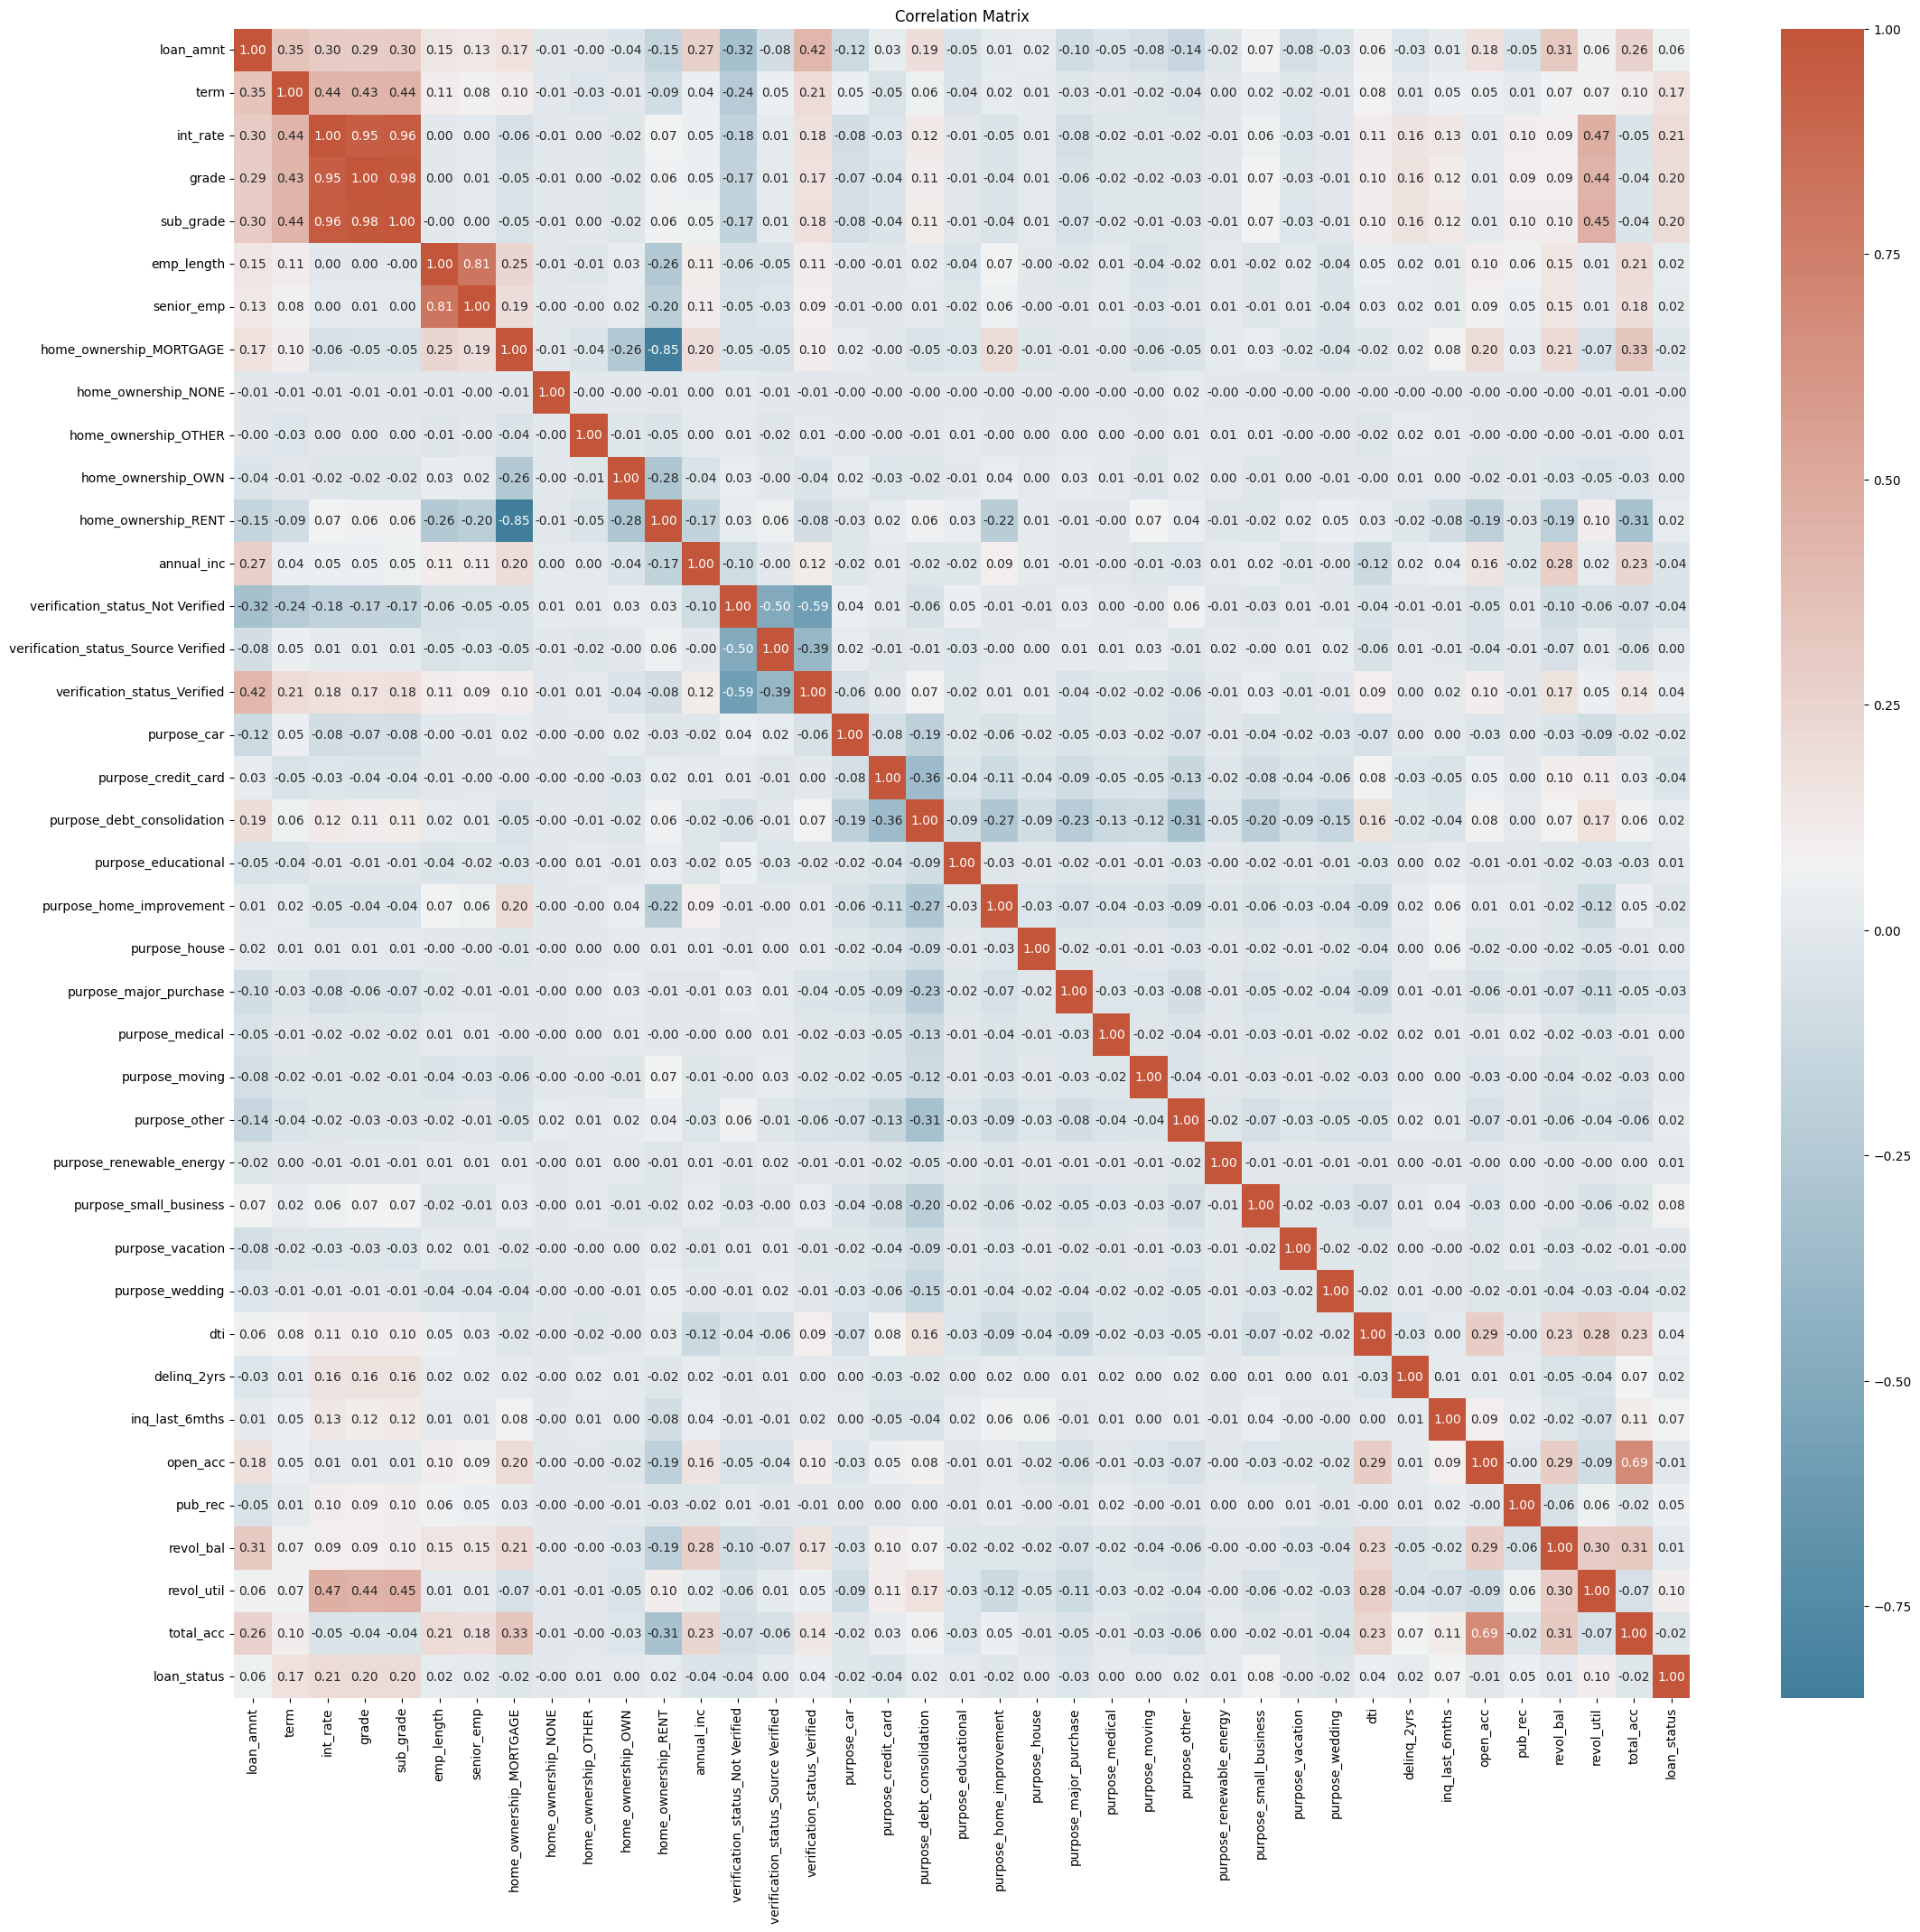


** Dropping  ['grade', 'sub_grade', 'senior_emp', 'home_ownership_RENT']  due to high correlation (> .8) to reduce bias in imputation

C. New shape of loan-data for imputation:  (38770, 35)


(38770, 35)
num_mask  Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc'],
      dtype='object')


   loan_amnt      term  int_rate  emp_length  home_ownership_MORTGAGE  \
0  -0.824363 -0.576616 -0.350940    1.498987                      0.0   
1  -1.163935  1.734258  0.898443   -1.329640                      0.0   
2  -1.177518 -0.576616  1.085040    1.498987                      0.0   
3  -0.145218 -0.576616  0.417079    1.498987                      0.0   
4  -0.824363 -0.576616 -1.094621   -0.558196                      0.0   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  annual_inc  \
0                  0.0                   0.0                 0.0   -0.698253   
1                  0.0                   0.0                 0.0   -0.604737   
2                  0.0                   0.0                 0.0   -0.881356   
3                  0.0                   0.0                 0.0   -0.305488   
4                  0.0                   0.0                 0.0   -0.511222   

   verification_status_Not Verified  verification_status_Source Verified  \
0   

<Figure size 640x480 with 0 Axes>

In [23]:
# Imputation: Step 1: data-preperation

# Impute emp_length and rvol_util using mean/median/mode/knn/iterative models
#
# Imputation using k nearest nieghbors::
# 1) Numerical mapping of categorical features
# kNN requires the neighbors to be in numerical form.
# So, we need to map all non-numeric feautres to numeric.
# Since, we have uni/bi-variate analyses later, we will keep
# the original loan_data as it is and use a copy of it for
# this mapping.
# 2) Drop highly correlating features
# If the features are highly correlating and get included in the
# imputation calculations, then this redundancy can incorrectly bias
# the imputation towards them. So, we should also remove this redundancy
# before imputation.
# 3) Compute non-NaN data metrics
#   a) Create a new dataset without the missing value rows
#   b) train-test-split the dataset in the 70%:30% ratio
#   For each feature:
#   c) Run the model and use model's predict method to get the y_pred for the X_test data
#   d) Check the Precision/Recall/ROC-AUC/F1-score metrics
#   e) If these metrics are not satifactory, try the predict_proba() method to get the x & y
#      probabilities.
#   f) Try different thresholds from 0.1 to 1.0 in a loop for both x & y (independent & target)
#      and see which combinstion of thresholds for x & y probs are giving the best custom predictions.
#      Print cunfusion_matrix and classification_report in each combination.
#   g) Pick the combination that gives the best 'Precision' for class1 (loan_defaults) and the one
#      that predicts more 'TRUE NEGATIVES' than FALSE ones.
#      ** We want to use these metrics since the main focus is in catching more possible defaulters
#         that can created loss for the business.
#      ** If we want to be more precise, we could calculate the actual amount of gain (class0) vs loss (class1)
#         and pick that threshold combination.
# 4) Impute:
#    Try mean/median/mode/knn/iterative models and select the ones
#    giving best metrics >= those carried out in step 3)
# 5) Imputation quality/Model evaluation
#    We then compute the MAE/RMSE/PCC for the imputed vis-a-vis the original
#    features w.r.t. the target variable and make sure that the original
#    relationship as well as prediction is either maintained or made better.
#
# [[ Imputation accuracy can be verified through following metrics:
# For Categorical features:
#   Accuracy
#   precision
#   recall
#   F1/F2 scores
#   ROC-AUC
# For Continuous features:
#   MSE
#   RMSE
#   R^2
# Approach:
#   We need the metrics above for both pre & post imputation contexts for comparison.
#   For pre-imputation, we need to mask-off the target values corresponding to the NaNs of 'emp_length' and 'rvol_util'.
#   Since, the non-NaN dataset is relatively pretty big compared to NaNs (38K vs 1050), a union mask will be used.
#   For post-imputation, we use the entire dataset and then compare the results for each method and select the method
#   that gave the lowest error. ]]

display(HTML("<b><p style='font-size: 3em;color:orange;'>Imputation: step 1 - data preperation</p></b>"))

# 1) Numerical mapping of categorical features

# copy loan_data and keep the original as it is.
loan_data_copy = loan_data.copy()
# convert loan_status to numeric
# loan_data_copy.loan_status = loan_data_copy.loan_status.map({'Fully Paid':0, 'Charged Off':1})
print(GRNBLD, "Loan_status distribution:", CLEAN, "\n", loan_data_copy.loan_status.value_counts())

'''
Output:
 loan_status
Fully Paid     33136
Charged Off     5634
'''

## Observation: The target variable is pretty imbalanced in favor of 'Fully Paid': 6:1

from sklearn.preprocessing import StandardScaler

# Scaler is required so that features with very high values don't dominate the imputation model
# We apply this only on the numerical features where it makes sense.
# Also, it's important to do it here rather than after encoding of categorical features to numerical.
display(HTML("<h1 style='color:blue;'>Before standardscaler on numeric cols</h1>"))
print(loan_data_copy.head())

num_mask = loan_data_copy.select_dtypes(exclude = 'object').columns

# inverse scale and print again for testing the scaler
#loan_data_copy[num_mask] = scaler.inverse_transform(loan_data_copy[num_mask])
#display(HTML("<h1 style='color:blue;'>After inverting standardscaler on numeric cols</h1>"))
#print(loan_data_copy.head())
# Scale again
#loan_data_copy[num_mask] = scaler.fit_transform(loan_data_copy[num_mask])

# Map loan_status
loan_data_copy.loan_status = loan_data_copy.loan_status.map({'Fully Paid':0, 'Charged Off':1})

# Below variabe is used later for PCC: Pearson Correlation Coefficient
# of missing value feature imputations w.r.t. the target vaiable loan_status
loan_status_num = loan_data_copy.loan_status

print(GRNBLD, "Following are the categorical features in loan-data:\n", CLEAN,
      loan_data_copy.select_dtypes(include='object').columns)

# Following are the oject type features that need to be
# mapped to numeric values.
#
# 'grade', 'sub_grade',
# 'home_ownership', 'verification_status',
# 'purpose'
#
# One rule I follow is to
# use OneHot encoding for features that have categories
# having no specific relation or order and use Ordinal
# mapping on features that have classes with some relation
# or order.
# Of these features, 'grade and sub_grade' are ordinal because of inherent ordering in grading.
# Remaining have no mutual relation, and so, we will use 1-hot encoding
# Once this is done, we will find and drop the highly correlated features for avoiding bias
# as well as dimensionality reduction.

# convert grade to ordinal
# No need to map higher rank to a higher value: sg_values = range(len(sg_keys), 0, -1)
# The relation will be established accordingly by model
loan_data_copy.grade = loan_data_copy.grade.map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7})
print(GRNBLD, "Loan-data-copy after mapping grade", CLEAN)
print(loan_data_copy.grade.head())

# convert sub_grade to ordinal

# A programmatic way to ordinal mapping
# now we shall convert sub_grade to numerical values
sg_keys = sorted(pd.DataFrame(loan_data_copy).sub_grade.unique())
sg_values = range(1,len(sg_keys)+1)
# No need to map higher rank to a higher value as in: sg_values = range(len(sg_keys), 0, -1)
# The relation will be established accordingly by the model.
sg_dict = dict(zip(sg_keys, sg_values))
print(sg_dict)
loan_data_copy.sub_grade = loan_data_copy.sub_grade.map(sg_dict)
print(loan_data_copy.sub_grade)

print("\nA. New shape of loan-data-copy: ", loan_data_copy.shape)

# 1-hot encode:
#  'home_ownership'
#  'verification_status',
#  'purpose'
#
# Note: Binary encoding can also be used to reduce the dimensionality, especially, for 'purpose' which has 14 different categories.
#       Since, the total #of feautres is ONLY ~30, after encoding, going ahead with 1-Hot for now.

# A. 'purpose'
# Note: steps of:
#       1-hot encoding
#       skipping classes that have 0% contribution,
#       inserting them in loan data copy
#       and then dropping the parent column from it
#       This will be repeated for remaining categorical features
print("\n%s%d Classes within 'purpose':%s\n" % (GRNBLD, len(loan_data_copy.purpose.unique()), CLEAN), loan_data_copy.purpose.unique())

# there are 14 categories of feature 'purpose'
from sklearn.preprocessing import OneHotEncoder

# Ideally, the sub-categories contributing very little to the target features can be dropped
# in this Linear Regression project. But, we are just keeping them as the feature dimentionality
# is not very high even after 1-hot encoding. It's a discussion point with one of the experts(TBD).
for feature in 'home_ownership', 'verification_status', 'purpose':
  print("\n%sFeature %s has %d categories %s" % (GRNBLD, feature, len(loan_data_copy[feature].unique()), CLEAN))
  print(GRNBLD,"\nCategories of this feature contributed to 'defaults' as follows:\n",CLEAN)
  print(pd.concat([loan_data_copy[feature][loan_data_copy['loan_status'] == 1].value_counts(),
                   loan_data_copy[feature][loan_data_copy['loan_status'] == 1].value_counts(normalize=True)],
                  axis=1,
                  keys=('count', 'percentage')))

  # get 1-hot encoder and get the 1-hot dataframe for the feature 'purpose'
  oh = OneHotEncoder()
  oh_df = pd.DataFrame(oh.fit_transform(loan_data_copy[[feature]]).toarray())
  oh_df.columns = oh.get_feature_names_out()
  oh_df.info()
  oh_df.shape

  # Replacing the categorical column:
  # Insert the 1-hot encoded columns of the feature in loan dta copy right after
  # feature column one after another; the parent will be dropped before KNN step
  # since it's categories are now encoded into the dataframe.
  ploc = loan_data_copy.columns.get_loc(feature)
  for col in oh_df.columns:
    loan_data_copy.insert(ploc, col, oh_df[col])
    ploc = ploc + 1

  # Drop the 1-hot encoded parent features
  loan_data_copy.drop(feature, axis=1, inplace=True)

# Print the shape after encoding
print("\nB. New shape of loan-data-copy: ", loan_data_copy.shape)

'''
Output:
B. New shape of loan-data-copy:  (38770, 38)
Observation: the features have gone up from 19 to 38, i.e., doubled.
We will keep 38 dimensions since it's a small number still.
Note: Binary encoding can reduce this feature blow-out as 4-bits
      can represent up to 16 different categories. The iterpretation of
      results from different metrics would be cumbersome since multiple
      bit-columns would need to be interpreted together.
'''

# 2) Drop highly correlating features: i.e., keep one of the mutually correlating features only
print(GRNBLD, "\nDimentionality reduction of highly correlating features using corr matrix\n", CLEAN)

# correlation matrix
f, ax = plt.subplots(figsize=(26, 24))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(loan_data_copy.corr(), annot=True, cmap=cmap, fmt=".2f")
#sns.heatmap(loan_data_copy.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
plt.clf()

'''
Observation from corr matrix:
A few (5) features showed high correlation (>80%) and they will purged.
Since, only one of the correlating features adds useful information for the prediction
of the target, we can drop the redundant (2nd to last correlating) features.
'''

# Compute upper corr matrix for the dimensionality reduction task
corr_matrix = loan_data_copy.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# drop column if correlation is > .8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("\n** Dropping ", to_drop, " due to high correlation (> .8) to reduce bias in imputation")
loan_data_copy.drop(to_drop, axis=1, inplace=True)
print("\nC. New shape of loan-data for imputation: ", loan_data_copy.shape)
'''
Output:
** Dropping  ['grade', 'sub_grade', 'sentior_emp', 'home_ownership_RENT']  due to high correlation (> .8) to reduce bias in imputation

C. New shape of loan-data for imputation:  (38770, 35)

Observation:
int_rate, grade, and sub-grade are highly correlating with each other - dorpping the latter 2
home_ownership_RENT & home_ownership_MORTGAGE are higly correlated: droppinghome_ownership_RENT

After this, the new dimension of the dataset is 35 (reduced from 38)
'''

display(HTML("<h2 style='color:blue;'>Shape after dropping highly correlating features</h2>"))
print(loan_data_copy.shape)

# remove above features from num_mask
num_mask = num_mask.drop(['senior_emp'])
print("num_mask ", num_mask)

# standard scale these numerical columns
# Note that we have avoided scaling encoded cat' features from this num_mask carefully
# so that they don't get scaled and their ordinality is maintained.
scaler = StandardScaler()
loan_data_copy[num_mask] = scaler.fit_transform(loan_data_copy[num_mask])
display(HTML("<h1 style='color:blue;'>After standardscaler on numeric cols</h1>"))
print(loan_data_copy.head())


Observations

loan_data_copy is a copy of the original loan_data used for handling imputation operations.
1. Standard scaler is employed on all the numerical features so that all of them become 'comparabale' with mean centered at 0, without changing individual feature distribution character, only shift & scale. This helps in unbiased computation of imputed values.
2. Categorical features are 1-hot or Ordinal encoded based on their nature. This increased the dimension of the data to from 20 to 39! That's a big changed but not prohibitively high. In cases where it becomes prohibitive, binary encoding can be used in place of 1-hot, which reduces the sparsity of 1-hot also.
3. After encoding, corrleation heatmap is displayed for visual scanning of any highly correlated features.
4. Highly correlating features are programmatically identified (>80% correlation) and dropped: dropped features thus were 'grade', 'sub_grade', 'senior_emp', 'home_ownership_RENT'
5. The final dimension came down to 35 after the drop.

Observations


In [24]:
# Imputation: step 2: Pre-Imputation dataset metrics (runtime: 9min)

# Shouldn't drop target variable for imputation task beacuse the relation between
# the imputation features and the target variable should be maiantained and to avoid bias as well.
# https://www.google.com/search?q=do+we+drop+target+variable+for+imputation+of+independent+variables+in+python&sca_esv=1a884ab41b9b57e9&sxsrf=AE3TifNic77Bw_w4NPB29OYE6fhBIa5LcQ%3A1748214338893&ei=QqIzaKWnNoKH0PEP1cDo4Aw&ved=0ahUKEwil0KT13b-NAxWCAzQIHVUgGswQ4dUDCBA&uact=5&oq=do+we+drop+target+variable+for+imputation+of+independent+variables+in+python&gs_lp=Egxnd3Mtd2l6LXNlcnAiTGRvIHdlIGRyb3AgdGFyZ2V0IHZhcmlhYmxlIGZvciBpbXB1dGF0aW9uIG9mIGluZGVwZW5kZW50IHZhcmlhYmxlcyBpbiBweXRob25I_QlQ-AJY-AJwAXgBkAEAmAFjoAFjqgEBMbgBA8gBAPgBAZgCAaACBcICChAAGLADGNYEGEeYAwCIBgGQBgiSBwExoAeAAbIHALgHAA&sclient=gws-wiz-serp
#
# 3. Pre-Imputation dataset metrics
#    Will use metrics of different loan_status prediction models as well as PCC for the quality measurement
#    LogisticRegression, RandomForest Classifier and Decision Tree classifier models are tested for
#    the Precision, Recall, F1-score, ROC-AUC metrics and PCC w.r.t. loan_status
# 3.a) PCC before imputation
# Pearson Correlation Coefficient for emp_length and revol_util w.r.t. loan_status before imputation::
# These numbers can be compared against the PCCs after imputation to check the quality of imputation
# from different methods and then settle with the method that gave the best PCC value and metrics.
# This will ensure that our imputation will at least maintain the liner relationship between these
# features and the target feature if not better it.

display(HTML("<b><p style='font-size: 3em;color:orange;'>Imputation: step 2 Pre-imputation metrics</p></b>"))

from scipy.stats import pearsonr as pr # Pearson's 'r'

## Mask off all rows that have NaNs for pre-imputation metrics
# Masks that represent non-NaNs
el_na_mask = loan_data_copy.emp_length.notna()
ru_na_mask = loan_data_copy.revol_util.notna()

# Masks that represent NaNs: imputation masks
el_impmask = loan_data_copy.emp_length.isna()
ru_impmask = loan_data_copy.revol_util.isna()
print(GRNBLD, "\nCount of union of NaNs in data set:", CLEAN, (el_impmask|ru_impmask).sum())

'''
Output:
Count of union of NaNs in data set:  1083
NaN rows:
[
  emp_length    1036
  revol_util      50
]
(total: 1086)

Observation:
There are 3 common records with NaNs for the above two imputation features

'''

# PCC before imputation
print(GRNBLD, "\nPearson Correlation Coefficients (PCCs) before imputation", CLEAN)

# PCC with target feature reduced to match the missing value features (mask-off)
el_pr_pre_imp, el_pval = pr(x=loan_data_copy.emp_length[el_na_mask], y=loan_status_num[el_na_mask])
ru_pr_pre_imp, ru_pval = pr(x=loan_data_copy.revol_util[ru_na_mask], y=loan_status_num[ru_na_mask])
print("\na)\nPCCs with target feature reduced to match missing value features.")
print("PCC of emp_length before imputation: ", el_pr_pre_imp)
print("PCC of revol_util before imputation: ", ru_pr_pre_imp, "\n")

'''
Output:
a)
PCCs with target feature reduced to match missing value features.
PCC of emp_length before imputation:  0.01657433213477153
PCC of revol_util before imputation:  0.09998894592417931
'''

# Out-of-curiosity:
# PCC with mean values filled for missing values
el_pr_pre_imp, el_pval = pr(x=loan_data_copy.emp_length.fillna(loan_data_copy.emp_length.mean()), y=loan_status_num)
ru_pr_pre_imp, ru_pval = pr(x=loan_data_copy.revol_util.fillna(loan_data_copy.revol_util.mean()), y=loan_status_num)
print("\nb)\nPCCs w.r.t. target feature with missing values filled by 'mean'.")
print("\nPCC of emp_length before imputation: ", el_pr_pre_imp)
print("PCC of revol_util before imputation: ", ru_pr_pre_imp, "\n")
'''
Output:
b)
PCCs w.r.t. target feature with missing values filled by 'mean'.

PCC of emp_length before imputation:  0.0162549819924667
PCC of revol_util before imputation:  0.09986004071603272

Observation: Not much difference in PCC observed with NaNs filled with mean & wihtout.
'''

# 3.b) Metrics:
# We are going to try the following classifiers:
# LogisticRegresion
# RandomForestClassifier
# DecisionTreeClassifier
# GradientBoostingClassifier
#
# Let's compute Precision/Recall/F1/ROC-AUC for another copy of loan_data_copy that does not have any rows with NaNs
# This will help us in comparing different imputation models that give close to or better metrics
# compared to the pre-imputed dataset and choose the best among those.
loan_data_copy_no_nan = loan_data_copy.dropna()
loan_data_copy_no_nan.dropna(inplace=True)
loan_data_copy_no_nan.info()

# Standardize the DataFrame
# This is required so that features with very high values don't dominate the imputation model
# This is already done in previous section

# Let's use a simple Multiple LR model for this purpose
from sklearn.metrics import mean_absolute_error, mean_squared_error
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.metrics import geometric_mean_score #  Consider using this for imbalanced data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# The target variable being categorical,
# we should compute Precision-Recall, F1, ROC-AUC metrics for pre-imputation models.
# After imputation we can then measure the same metrics to compare and choose the best.
# Stratified split of data is carried out to handle class imbalance in target so that
# the train & test datasets will have proporational majority and minority class presence.

# Let's use 30% of non-NaN data for testing and 70% for training
X_train, X_test, y_train, y_test = train_test_split(loan_data_copy_no_nan.drop(['loan_status'], axis=1),
                                                    loan_data_copy_no_nan.loan_status,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=loan_data_copy_no_nan['loan_status'])
print("\n", GRNBLD, "Stratified TTS\n", CLEAN, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("\ny-train value counts\n", y_train.value_counts())
print("\ny-test value counts\n", y_test.value_counts())


# Let's try simple Logistic Regression first
print(GRNBLD, "\n\nLogisticRegression\n", CLEAN)
lr = LogisticRegression(random_state=42, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC: ", roc_auc_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

y_pred_proba = lr.predict_proba(X_test)
print("Geometric Mean Score: ", geometric_mean_score(y_test, y_pred))
print(GRNBLD, "Proba", CLEAN, y_pred_proba.shape)
print(GRNBLD, "\nloan_print_stats:\n", CLEAN, y_pred_proba.shape)
loan_print_stats(y_pred_proba, y_test, y_pred)

'''
---
OUTPUT/Observation

For Logistic regression, the best metrics started at class0/1 thresholds as below: .5/.5 to .5/1.0
These are not best metrics at an absolute scale , but, the best among different probabilistic thresholds.
0.5
0.5
0.24009378663540445
{'0': {'precision': 0.9157909684748651, 'recall': 0.665531475748194, 'f1-score': 0.7708582357159933, 'support': 9690.0}, '1': {'precision': 0.24009378663540445, 'recall': 0.6332714904143476, 'f1-score': 0.3481808908534512, 'support': 1617.0}, 'accuracy': 0.6609180153886973, 'macro avg': {'precision': 0.5779423775551348, 'recall': 0.6494014830812709, 'f1-score': 0.5595195632847223, 'support': 11307.0}, 'weighted avg': {'precision': 0.8191603553118325, 'recall': 0.6609180153886973, 'f1-score': 0.710411674590785, 'support': 11307.0}}
[[6449 3241]
 [ 593 1024]]
Test Accuracy: 0.66
'''

print(GRNBLD, "DecisionTreeClassifier\n", CLEAN)
for msl in 10,20,50,100,500,1000,2000,5000,10000:
  print(GRNBLD, "min_samples_leaf", CLEAN, msl)
  dclf = DecisionTreeClassifier(random_state=42, class_weight='balanced', min_samples_leaf=msl)
  dclf.fit(X_train, y_train)
  y_pred = dclf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print("ROC-AUC: ", roc_auc_score(y_test, y_pred))
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

  y_pred_proba = dclf.predict_proba(X_test)
  #print("Geometric Mean Score: ", geometric_mean_score(y_test, y_pred_proba))
  print(GRNBLD, "Proba", CLEAN, y_pred_proba.shape)
  loan_print_stats(y_pred_proba, y_test, y_pred)

'''
Output: min_samples_leaf = 500
0.5
0.5
0.21816261879619853
{'0': {'precision': 0.9111381618989653, 'recall': 0.6179566563467492, 'f1-score': 0.7364407821916124, 'support': 9690.0}, '1': {'precision': 0.21816261879619853, 'recall': 0.6388373531230674, 'f1-score': 0.32525188916876574, 'support': 1617.0}, 'accuracy': 0.6209427788095869, 'macro avg': {'precision': 0.5646503903475819, 'recall': 0.6283970047349083, 'f1-score': 0.530846335680189, 'support': 11307.0}, 'weighted avg': {'precision': 0.812036591792202, 'recall': 0.6209427788095869, 'f1-score': 0.6776371702682071, 'support': 11307.0}}
[[5988 3702]
 [ 584 1033]]
Test Accuracy: 0.62

Observation:
Off many trials with min_samples_leaf, DTC gave best result for 500.
The prediction probabilities are the natural defaults of .5 for both classes.
The True Negatives are a healthy 1033 (2:1 ratio over FN)
'''

#
# Let's try RandomForest Classifier next
print(GRNBLD, "\n\nRandomForest Classifier\n", CLEAN)

print(GRNBLD, "Class Weights NOT balanced\n", CLEAN)
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC: ", roc_auc_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

'''
Observation: Without class weights balanced RFC is. giving pretty bad results
'''

# Let's try RandomForest Classifier with class weights

print(GRNBLD, "Class Weights balanced\n", CLEAN)
rf = RandomForestClassifier(n_estimators=1000, random_state=42, max_features=34, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC: ", roc_auc_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

y_pred_proba = rf.predict_proba(X_test)
print("Geometric Mean Score: ", geometric_mean_score(y_test, y_pred))
print(GRNBLD, "Proba", CLEAN, y_pred_proba.shape)

loan_print_stats(y_pred_proba, y_test, y_pred)

'''
Output: The best metrics are seen for a threshold of .17 for class 1 for all thresholds of class0 between .5 and .8

0.5
0.17
0.22818086225026288
{'0': {'precision': 0.9001732640277222, 'recall': 0.6970072239422085, 'f1-score': 0.7856685860524633, 'support': 9690.0}, '1': {'precision': 0.22818086225026288, 'recall': 0.5367965367965368, 'f1-score': 0.3202361187972699, 'support': 1617.0}, 'accuracy': 0.674095692933581, 'macro avg': {'precision': 0.5641770631389925, 'recall': 0.6169018803693727, 'f1-score': 0.5529523524248665, 'support': 11307.0}, 'weighted avg': {'precision': 0.8040724668512693, 'recall': 0.674095692933581, 'f1-score': 0.7191076680767271, 'support': 11307.0}}
[[6754 2936]
 [ 749  868]]
Test Accuracy: 0.67

Observation:
 The R.F.C. with class weights balanced was originally giving very biased results for the minority class 1 (loan defaults)
'without' the threshold for true negstives modified to .17 from default .5, where as, the L.R. model above perfomed better without
having to change the thresholds.
'''


print(GRNBLD, "GradientBoostingClassifier\n", CLEAN)
gbclf = GradientBoostingClassifier(random_state=42)
for msl in 10,20,50,100,500,1000,2000,5000,10000:
  print(GRNBLD, "min_samples_leaf", CLEAN, msl)
  gbclf = GradientBoostingClassifier(random_state=42, min_samples_leaf=msl)
  gbclf.fit(X_train, y_train)
  y_pred = gbclf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print("ROC-AUC: ", roc_auc_score(y_test, y_pred))
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

  y_pred_proba = gbclf.predict_proba(X_test)
  #print("Geometric Mean Score: ", geometric_mean_score(y_test, y_pred_proba))
  print(GRNBLD, "Proba", CLEAN, y_pred_proba.shape)
  loan_print_stats(y_pred_proba, y_test, y_pred)

'''
Output:
min_samples_leaf  20

HIGH
0.5
0.17
0.261095806550352
{'0': {'precision': 0.9049751243781095, 'recall': 0.7508771929824561, 'f1-score': 0.8207557811618725, 'support': 9690.0}, '1': {'precision': 0.261095806550352, 'recall': 0.5275200989486704, 'f1-score': 0.3493038493038493, 'support': 1617.0}, 'accuracy': 0.7189351729017422, 'macro avg': {'precision': 0.5830354654642307, 'recall': 0.6391986459655632, 'f1-score': 0.5850298152328609, 'support': 11307.0}, 'weighted avg': {'precision': 0.812894744354453, 'recall': 0.7189351729017422, 'f1-score': 0.7533340270436782, 'support': 11307.0}}
[[7276 2414]
 [ 764  853]]
Test Accuracy: 0.72

Observation:
GradientBoostingClassifier gave best results for min_samples_leaf value of 20
with a test accuracy of .72; the class1 threshold of 0.17 and a precision of 26.1%
Also, I prefer this because there are more True Negatives predicted.

CONCLUSION:
Decision Tree Classifier gave the best results with best True Negatives (class1) prediction
out of all the methids tries above. We will use the same method after the imputation to compare
the results/metrics with default (.5) probs.
'''

 
Count of union of NaNs in data set:  1083
 
Pearson Correlation Coefficients (PCCs) before imputation 

a)
PCCs with target feature reduced to match missing value features.
PCC of emp_length before imputation:  0.016574332134771455
PCC of revol_util before imputation:  0.09998894592417931 


b)
PCCs w.r.t. target feature with missing values filled by 'mean'.

PCC of emp_length before imputation:  0.016254981992466812
PCC of revol_util before imputation:  0.09986004071603269 

<class 'pandas.core.frame.DataFrame'>
Index: 37687 entries, 0 to 38769
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37687 non-null  float64
 1   term                                 37687 non-null  float64
 2   int_rate                             37687 non-null  float64
 3   emp_length                           37687 non-null  float64
 4   home_ownersh

"\nOutput:\nmin_samples_leaf  20\n\nHIGH\n0.5\n0.17\n0.261095806550352\n{'0': {'precision': 0.9049751243781095, 'recall': 0.7508771929824561, 'f1-score': 0.8207557811618725, 'support': 9690.0}, '1': {'precision': 0.261095806550352, 'recall': 0.5275200989486704, 'f1-score': 0.3493038493038493, 'support': 1617.0}, 'accuracy': 0.7189351729017422, 'macro avg': {'precision': 0.5830354654642307, 'recall': 0.6391986459655632, 'f1-score': 0.5850298152328609, 'support': 11307.0}, 'weighted avg': {'precision': 0.812894744354453, 'recall': 0.7189351729017422, 'f1-score': 0.7533340270436782, 'support': 11307.0}}\n[[7276 2414]\n [ 764  853]]\nTest Accuracy: 0.72\n\nObservation:\nGradientBoostingClassifier gave best results for min_samples_leaf value of 20\nwith a test accuracy of .72; the class1 threshold of 0.17 and a precision of 26.1%\nAlso, I prefer this because there are more True Negatives predicted.\n\nCONCLUSION:\nDecision Tree Classifier gave the best results with best True Negatives (clas

Observations

Pre-imputation model metrics

1)
The PCC of emp_length w.r.t. to loan_status is very low: 1.66% (0.016574332134771455)
The PCC of emp_length w.r.t. to loan_status is also low: 10% (0.09998894592417931)

Filling the NaNs with feature means did not alter the PCCs at all (very negligible).

2)
Stratified train-test split (70:30) is used to maintain class proportion in the target variable.
Standard scaler is used on numerical columns already in prev section

3) loan_print_stats():
    Since, even after balancing class weights in the classification methods below
    different “class thresholds” are tried for each class and the the ones with the best
    True-positive and True-negative values are selected for that method. The models
    are not expected to be perfect, but, the best possible with hyper-parameter tuning.

4) Logistic Regression: Simple linear classifier using sigmoid function
For .5 thresholds itself we got better results with class weights balanced.

The confusion matrix is:

[[6449 3241]

 [ 593 1024]]

Test Accuracy: 0.66

Precision of predicting defaults is: 24%

ROC-AUC:  0.6494014830812709


5) DecisionTree Classifier: Non-linear classifier, faster than RFC & GBC
Minimum Samples per leaf was increased to make sure that the model is not overfitting.
At the same time, this value is contained to make sure that the model is performing well.

The best (according to my preference) metrics were seen for 500 min_samples_leaf hyper
parameter value.

Thresholds:

0.5

0.5

Precision:

0.21816261879619853

Confusion Matrix:

 [[5988 3702]

 [ 584 1033]]

ROC-AUC:  0.6283970047349082

Test Accuracy: 0.62

6) Random Forest:
Uses an ensemble technique called bagging (Bootstrap Aggregation) where multiple data subsets are created of the same as the dataset but with randomly drawn samples from the input dataset with replacement. These different datasets are trained on separate decision trees and the class is predicted using ‘majority voting’ off all these decision trees’ results.

The best metrics seen using this model was:

‘loan_paidoff’ threshold: 0.5

‘Defaults threshold: 0.17

Defaults precision: 0.22818086225026288

Confusion matrix:

[[6754 2936]

 [ 749  868]]

Test Accuracy: 0.67

ROC-AUC:  0.5121587390937237

7) GradientBoosting Classifier
It’s an ensemble machine learning technique which builds a strong predictive model by sequentially combining multiple weak learners like decision trees that iteratively corrects the errors of previous learners. It scales the previous predictions by a ‘learning rate’ and adds them to the current predictions. After such aggregation from all ensembles uses sigmoid or softmax to predict using highest probability.

The best metrics observed are for the below combination:

min_samples_leaf  20

‘loan_paidoff’ threshold: 0.5

‘Defaults threshold: 0.17

Defaults precision: 0.261095806550352

Confusion matrix:

[[7276 2414]

 [ 764  853]]

Test Accuracy: 0.72

ROC-AUC:  0.5083461135650432


Section
CONCLUSION:

Logistics regression gave the best metrics except for the 'defaults' True Negative scores which is 9 less than that of Decision Tree Classifier. Also, the former is a bit faster. However, I am inclining towards Decision Tree model just because there is a bit more to experiment with the hyper paramers, e.g., min_samples_leaf. So, in the post-imputation metrics decision tree classifier will be used.

In [25]:
## 4. Imputation:: Step 3: Mean/Meadian/Mode (runtime: 3min)
#The FOCUS is in predicting defaulters better and at the same time not worsening 'non-defaulters' prediction.

# Notes:
# 0) In this project, considering the same method/model for imputation of both the features with NaNs in
#    the interest of time/effort. But, ideally, different methods/models could be fitting for them and in
#    real world they should be separately handled.
# 1) We have proper missing values in the data and there is no ground truth to compare the imputed values.
#    So, we cannot use any of the MAE/MSE/RMSE/RMAE/etc metrics for these numerical values.
# 2) Hence, we will use some models and PCC values to compute imputation performance after each type of
#    imputation.
# 3) We will initially perform some basic imputations like mean/meadian/mode, compute the metrics using
#    the decision tree classifier and evaluate the imputation performance by comparing against the pre-imputation
#    metrics.
# 4) However, at each stage we can look and inverse-scaled data to interpret the imputed values naturally.
#    But, the actual imputation performance itself will be judged by different models in preditcing the target variable
#    using train-test-split using standardized imputed values as before in pre-imputation like we did above.

# Imputation quality
#
# Imputation accuracy
# Accuracy
# precision
# recall
# F1/F2 scores
# ROC/AUC
# Cross-validation

#### 4.1 Imputation by 'MEAN'
#### Pls NOTE that at this point loan_data_copy is already sandard scaled!
elx = rux = 0.0
emplx = rvolx = []
loan_data_imputed = loan_data_copy.copy()
empl_mea = loan_data_copy.emp_length.mean()
rutil_mea = loan_data_copy.revol_util.mean()
empl2 = loan_data_copy.emp_length.fillna(empl_mea)
rutil = loan_data_copy.revol_util.fillna(rutil_mea)
print(GRNBLD, '\nImputaiton using mean: empl: ', empl_mea, "rutil: ", rutil_mea, CLEAN)
empl2 = loan_data_copy.emp_length.fillna(empl_mea)
rutil = loan_data_copy.revol_util.fillna(rutil_mea)
#print(empl2[el_impmask])

# Let's test imputation performance

el_pr_post_imp, el_pval = pr(x=empl2, y=loan_status_num)
ru_pr_post_imp, ru_pval = pr(x=rutil, y=loan_status_num)
print("\nPCC of emp_length after imputation: ", el_pr_post_imp)
print("PCC of revol_util after imputation: ", ru_pr_post_imp, "\n")
if el_pr_post_imp > elx:
  elx = el_pr_post_imp
  emplx = empl2
if ru_pr_post_imp > rux:
  rux = ru_pr_post_imp
  rvolx = rutil

loan_data_imputed.emp_length = empl2
loan_data_imputed.revol_util = rutil

#--
X_train, X_test, y_train, y_test = train_test_split(loan_data_imputed.drop(['loan_status'], axis=1),
                                                    loan_data_imputed.loan_status,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=loan_data_imputed['loan_status'])
print("\n", GRNBLD, "Stratified TTS\n", CLEAN, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("\nX-train head\n", X_train.head())
print("\ny-train value counts\n", y_train.value_counts())
print("\ny-test value counts\n", y_test.value_counts())

print(GRNBLD, "\n\nDecisionTreeClassifier on imputated data\n", CLEAN)
for msl in 10,20,50,100,500,1000,2000,5000,10000:
    print(GRNBLD, "min_samples_leaf", CLEAN, msl)
    dclf = DecisionTreeClassifier(random_state=42, class_weight='balanced', min_samples_leaf=msl)
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("ROC-AUC: ", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

    y_pred_proba = dclf.predict_proba(X_test)
    #print("Geometric Mean Score: ", geometric_mean_score(y_test, y_pred_proba))
    print(GRNBLD, "Proba", CLEAN, y_pred_proba.shape)
    loan_print_stats(y_pred_proba, y_test, y_pred)
#--

# 4.2 Imputation by "MEADIAN"
empl_med = loan_data_copy.emp_length.median()
rutil_med = loan_data_copy.revol_util.median()
empl2 = loan_data_copy.emp_length.fillna(empl_med)
rutil = loan_data_copy.revol_util.fillna(rutil_med)
print(GRNBLD, '\nImputaiton using median: empl: ', empl_med, "rutil: ", rutil_med, CLEAN)

# Let's test imputation performance

el_pr_post_imp, el_pval = pr(x=empl2, y=loan_status_num)
ru_pr_post_imp, ru_pval = pr(x=rutil, y=loan_status_num)
print("\nPCC of emp_length after imputation: ", el_pr_post_imp)
print("PCC of revol_util after imputation: ", ru_pr_post_imp, "\n")
if el_pr_post_imp > elx:
  elx = el_pr_post_imp
  emplx = empl2
if ru_pr_post_imp > rux:
  rux = ru_pr_post_imp
  rvolx = rutil


loan_data_imputed.emp_length = empl2
loan_data_imputed.revol_util = rutil
#--
X_train, X_test, y_train, y_test = train_test_split(loan_data_imputed.drop(['loan_status'], axis=1),
                                                    loan_data_imputed.loan_status,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=loan_data_imputed['loan_status'])
print("\n", GRNBLD, "Stratified TTS\n", CLEAN, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("\nX-train head\n", X_train.head())
print("\ny-train value counts\n", y_train.value_counts())
print("\ny-test value counts\n", y_test.value_counts())

print(GRNBLD, "\n\nDecisionTreeClassifier on imputated data\n", CLEAN)
for msl in 10,20,50,100,500,1000,2000,5000,10000:
    print(GRNBLD, "min_samples_leaf", CLEAN, msl)
    dclf = DecisionTreeClassifier(random_state=42, class_weight='balanced', min_samples_leaf=msl)
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("ROC-AUC: ", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

    y_pred_proba = dclf.predict_proba(X_test)
    #print("Geometric Mean Score: ", geometric_mean_score(y_test, y_pred_proba))
    print(GRNBLD, "Proba", CLEAN, y_pred_proba.shape)
    loan_print_stats(y_pred_proba, y_test, y_pred)
#--

# 4.3 Imputation by "MODE"

empl2_mode = loan_data_copy.emp_length.mode().to_numpy()
rutil_mode = loan_data_copy.revol_util.mode().to_numpy()
print(GRNBLD, '\nImputaiton using mode: empl: ', empl2_mode[0], "rutil: ", rutil_mode[0], CLEAN)
empl2 = loan_data_copy.emp_length.fillna(empl2_mode[0])
rutil = loan_data_copy.revol_util.fillna(rutil_mode[0])
#print(empl2[el_impmask])

# Let's test imputation performance

el_pr_post_imp, el_pval = pr(x=empl2, y=loan_status_num)
ru_pr_post_imp, ru_pval = pr(x=rutil, y=loan_status_num)
print("\nPCC of emp_length after imputation: ", el_pr_post_imp)
print("PCC of revol_util after imputation: ", ru_pr_post_imp, "\n")
if el_pr_post_imp > elx:
  elx = el_pr_post_imp
  emplx = empl2
if ru_pr_post_imp > rux:
  rux = ru_pr_post_imp
  rvolx = rutil

loan_data_imputed.emp_length = empl2
loan_data_imputed.revol_util = rutil
#--
X_train, X_test, y_train, y_test = train_test_split(loan_data_imputed.drop(['loan_status'], axis=1),
                                                    loan_data_imputed.loan_status,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=loan_data_imputed['loan_status'])
print("\n", GRNBLD, "Stratified TTS\n", CLEAN, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("\nX-train head\n", X_train.head())
print("\ny-train value counts\n", y_train.value_counts())
print("\ny-test value counts\n", y_test.value_counts())

print(GRNBLD, "\n\nDecisionTreeClassifier on imputated data\n", CLEAN)
for msl in 10,20,50,100,500,1000,2000,5000,10000:
    print(GRNBLD, "min_samples_leaf", CLEAN, msl)
    dclf = DecisionTreeClassifier(random_state=42, class_weight='balanced', min_samples_leaf=msl)
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("ROC-AUC: ", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

    y_pred_proba = dclf.predict_proba(X_test)
    #print("Geometric Mean Score: ", geometric_mean_score(y_test, y_pred_proba))
    print(GRNBLD, "Proba", CLEAN, y_pred_proba.shape)
    loan_print_stats(y_pred_proba, y_test, y_pred)
#--




 
Imputaiton using mean: empl:  -1.2653965082704916e-16 rutil:  1.145089532836525e-16 

PCC of emp_length after imputation:  0.016254981992466812
PCC of revol_util after imputation:  0.09986004071603269 


  Stratified TTS
  (27139, 34) (11631, 34) (27139,) (11631,)

X-train head
        loan_amnt      term  int_rate  emp_length  home_ownership_MORTGAGE  \
6991    1.892217  1.734258 -0.551058    1.498987                      0.0   
31165  -0.824363 -0.576616 -0.459112   -0.558196                      0.0   
7142   -0.933026 -0.576616  0.281864    0.727543                      0.0   
26696  -0.654577  1.734258  0.882218   -0.558196                      1.0   
20464  -0.145218 -0.576616 -1.462405    1.498987                      0.0   

       home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
6991                   0.0                   0.0                 1.0   
31165                  0.0                   0.0                 0.0   
7142                   0.0             

Observations:

Imputation

PCCs with target feature reduced to match missing value features.
PCC of emp_length before imputation:  0.016574332134771455
PCC of revol_util before imputation:  0.09998894592417931

::: MEAN :::
PCCs before imputation:

PCCs after imputation:
PCCs w.r.t. target feature with missing values filled by 'mean'.
PCC of emp_length before imputation:  0.016254981992466812
PCC of revol_util before imputation:  0.09986004071603269

DecisionTreeClassifier

Best results seen are with  min_samples_leaf = 500
ROC-AUC:  0.6390026600731297
Confusion Matrix:
 [[6293 3648]
 [ 600 1090]]
‘loan_paidoff’ threshold: 0.5
‘Defaults threshold: 0.5
Defaults precision: 0.23005487547488393
Test Accuracy: 0.63

::: MEDIAN :::
PCCs after imputation
PCCs w.r.t. target feature with missing values filled by 'median’.
PCC of emp_length after imputation:  0.014507685177543757
PCC of revol_util after imputation:  0.09986884164933707

DecisionTreeClassifier

Best results seen are with min_samples_leaf  500
ROC-AUC:  0.6390026600731297
Confusion Matrix:
 [[6293 3648]
 [ 600 1090]]
‘loan_paidoff’ threshold: 0.5
‘Defaults threshold: 0.5
Defaults precision: 0.23005487547488393
Test Accuracy: 0.63

::: MODE :::
PCCs w.r.t. target feature with missing values filled by 'mode’.
PCC of emp_length after imputation:  0.024153196799618883
PCC of revol_util after imputation:  0.09857422561017566

DecisionTreeClassifier

Best results seen are with min_samples_leaf  500 (Again!!)
ROC-AUC:  0.6425233433470493
Confusion Matrix:
[[6263 3678]
 [ 583 1107]]
‘loan_paidoff’ threshold: 0.5
‘Defaults threshold: 0.5
Defaults precision: 0.23134796238244515
Test Accuracy: 0.63

Section
Conclusion:

Mean & Median gave the same best metrics with mode giving a bit better results - all for 500 min_samples_leaf parameter.
The focus was on being able to predict the true negatives well.

In [26]:
# Imputation:: Step 4: kNN (runtime: 6min)
#
###########
from sklearn.impute import KNNImputer
import time


print(GRNBLD, "\nKNN Imputation\n", CLEAN)

for k in range(2,6):
  X = loan_data_copy.drop(['loan_status'], axis=1)
  y = loan_data_copy.loan_status

  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  t = time.time()
  imputer = KNNImputer(n_neighbors=k)

  # ```
  loan_data_imputed = pd.DataFrame(imputer.fit_transform(loan_data_copy))
  loan_data_imputed.columns = loan_data_copy.columns
  #print(loan_data_imputed.info())
  #print("time taken ", time.time() - t)

  print(GRNBLD, "\n\nk =", k, CLEAN)
  print("time taken ", time.time() - t, "seconds")

  el_pr_post_imp, el_pval = pr(x=loan_data_imputed.emp_length, y=loan_status_num)
  ru_pr_post_imp, ru_pval = pr(x=loan_data_imputed.revol_util, y=loan_status_num)

  # ```

  if el_pr_post_imp > elx:
    elx = el_pr_post_imp
    emplx = loan_data_imputed.emp_length
  if ru_pr_post_imp > rux:
    rux = ru_pr_post_imp
    rvolx = loan_data_imputed.revol_util

  # Let's test imputation performance

  print("PCC of emp_length after imputation: ", el_pr_post_imp)
  print("PCC of revol_util after imputation: ", ru_pr_post_imp, "\n")
  print("P-val of emp_length after imputation: ", el_pval)
  print("P-val of revol_util after imputation: ", ru_pval, "\n")

  X_train, X_test, y_train, y_test = train_test_split(loan_data_imputed.drop(['loan_status'], axis=1),
                                                      loan_data_imputed.loan_status,
                                                      test_size=0.3,
                                                      random_state=42,
                                                      stratify=loan_data_imputed['loan_status'])
  print("\n", GRNBLD, "Stratified TTS\n", CLEAN, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
  #print("\nX-train head\n", X_train.head())
  print("\ny-train value counts\n", y_train.value_counts())
  print("\ny-test value counts\n", y_test.value_counts())

  print(GRNBLD, "DecisionTreeClassifier on imputated data\n", CLEAN)
  for msl in 10,20,50,100,500,1000,2000,5000,10000:
    print(GRNBLD, "min_samples_leaf", CLEAN, msl)
    dclf = DecisionTreeClassifier(random_state=42, class_weight='balanced', min_samples_leaf=msl)
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("ROC-AUC: ", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

    y_pred_proba = dclf.predict_proba(X_test)
    print(GRNBLD, "Proba", CLEAN, y_pred_proba.shape)
    loan_print_stats(y_pred_proba, y_test, y_pred)



 
KNN Imputation
 
 

k = 2 
time taken  8.754226446151733 seconds
PCC of emp_length after imputation:  0.015051195235951623
PCC of revol_util after imputation:  0.10026809012662935 

P-val of emp_length after imputation:  0.0030399651281827855
P-val of revol_util after imputation:  3.4793238760576925e-87 


  Stratified TTS
  (27139, 34) (11631, 34) (27139,) (11631,)

y-train value counts
 loan_status
0.0    23195
1.0     3944
Name: count, dtype: int64

y-test value counts
 loan_status
0.0    9941
1.0    1690
Name: count, dtype: int64
 DecisionTreeClassifier on imputated data
 
 min_samples_leaf  10
              precision    recall  f1-score   support

         0.0       0.88      0.68      0.77      9941
         1.0       0.19      0.46      0.27      1690

    accuracy                           0.65     11631
   macro avg       0.54      0.57      0.52     11631
weighted avg       0.78      0.65      0.70     11631

ROC-AUC:  0.5677723122636574
Confusion Matrix: 
 [[6765 3176]
 [ 

Observations:

kNN imputation: Several distances were tried, but, k=2 stood above or equal to many other values. Chose the smallest ‘k’ for performance.

‘K’ of kNN: 2

DecisionTreeClassifier model

Best metrics seen are with min_samples_leaf  500 (Again!!)

ROC-AUC:  0.6390529568239596

Confusion Matrix:
 [[6294 3647]
 [ 600 1090]]

‘loan_paidoff’ threshold: 0.5

‘Defaults threshold: 0.5

Defaults precision: 0.23010344099641122

Test Accuracy: 0.63


In [27]:

# Imputation:: Step 5: Iterative Imputer (MICE) (runtime: 1min)
# Tried with different max_iter and random_state hyper params

# ---
# IterativeImputer method
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

print(GRNBLD, '\nImputaiton using Iterative Imputer:  max-iter=5 rnd=0', CLEAN)
t = time.time()
imputer = IterativeImputer(max_iter=5,random_state=0)
loan_data_imputed = imputer.fit_transform(loan_data_copy)
loan_data_imputed = pd.DataFrame(loan_data_imputed)
loan_data_imputed.columns = loan_data_copy.columns
t = time.time() - t
el_pr_post_imp, el_pval = pr(x=loan_data_imputed.emp_length, y=loan_status_num)
ru_pr_post_imp, ru_pval = pr(x=loan_data_imputed.revol_util, y=loan_status_num)
print("PCC of emp_length after Iterative imputation: ", el_pr_post_imp)
print("PCC of revol_util after Iterativeimputation: ", ru_pr_post_imp, "\n")
print("Iterative cost in secs: ", t)
#--
X_train, X_test, y_train, y_test = train_test_split(loan_data_imputed.drop(['loan_status'], axis=1),
                                                    loan_data_imputed.loan_status,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=loan_data_imputed['loan_status'])
print("\n", GRNBLD, "Stratified TTS\n", CLEAN, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("\ny-train value counts\n", y_train.value_counts())
print("\ny-test value counts\n", y_test.value_counts())

print(GRNBLD, "DecisionTreeClassifier on imputated data\n", CLEAN)
for msl in 10,20,50,100,500,1000,2000:
    print(GRNBLD, "min_samples_leaf", CLEAN, msl)
    dclf = DecisionTreeClassifier(random_state=42, class_weight='balanced', min_samples_leaf=msl)
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("ROC-AUC: ", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

    y_pred_proba = dclf.predict_proba(X_test)
    #print("Geometric Mean Score: ", geometric_mean_score(y_test, y_pred_proba))
    print(GRNBLD, "Proba", CLEAN, y_pred_proba.shape)
    loan_print_stats(y_pred_proba, y_test, y_pred)
#--



 
Imputaiton using Iterative Imputer:  max-iter=5 rnd=0 
PCC of emp_length after Iterative imputation:  0.016547037187283054
PCC of revol_util after Iterativeimputation:  0.10037389898804452 

Iterative cost in secs:  15.018924236297607

  Stratified TTS
  (27139, 34) (11631, 34) (27139,) (11631,)

y-train value counts
 loan_status
0.0    23195
1.0     3944
Name: count, dtype: int64

y-test value counts
 loan_status
0.0    9941
1.0    1690
Name: count, dtype: int64
 DecisionTreeClassifier on imputated data
 
 min_samples_leaf  10
              precision    recall  f1-score   support

         0.0       0.88      0.67      0.76      9941
         1.0       0.19      0.46      0.27      1690

    accuracy                           0.64     11631
   macro avg       0.54      0.57      0.52     11631
weighted avg       0.78      0.64      0.69     11631

ROC-AUC:  0.5659586233332877
Confusion Matrix: 
 [[6676 3265]
 [ 912  778]]
 Proba  (11631, 2)
 Proba 
(11631, 2)
[0. 0. 0. ... 0. 0. 0.]

Observations:

Iterative imputation: max_iter=5

Best results seen are with min_samples_leaf  500

ROC-AUC:  0.6390026600731297

Confusion Matrix:

 [[6293 3648]

 [ 600 1090]]

‘loan_paidoff’ threshold: 0.5

‘Defaults threshold: 0.5

Defaults precision: 0.23010344099641122

Test Accuracy: 0.63

In [28]:
# Imputation:: Step 6: Iterative Imputer (MICE) contd.. (1m)

print(GRNBLD, '\nImputaiton using Iterative Imputer:  max-iter=20 rnd=42', CLEAN)
t = time.time()
imputer = IterativeImputer(max_iter=20,random_state=42)
loan_data_imputed = imputer.fit_transform(loan_data_copy)
loan_data_imputed = pd.DataFrame(loan_data_imputed)
loan_data_imputed.columns = loan_data_copy.columns
t = time.time() - t
el_pr_post_imp, el_pval = pr(x=loan_data_imputed.emp_length, y=loan_status_num)
ru_pr_post_imp, ru_pval = pr(x=loan_data_imputed.revol_util, y=loan_status_num)
print("PCC of emp_length after Iterativeimputation: ", el_pr_post_imp)
print("PCC of revol_util after Iterativeimputation: ", ru_pr_post_imp, "\n")
print("Iterative cost in secs: ", t)
#--
X_train, X_test, y_train, y_test = train_test_split(loan_data_imputed.drop(['loan_status'], axis=1),
                                                    loan_data_imputed.loan_status,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=loan_data_imputed['loan_status'])
print("\n", GRNBLD, "Stratified TTS\n", CLEAN, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("\nX-train head\n", X_train.head())
print("\ny-train value counts\n", y_train.value_counts())
print("\ny-test value counts\n", y_test.value_counts())

print(GRNBLD, "DecisionTreeClassifier on imputated data\n", CLEAN)
for msl in 10,20,50,100,500,1000,2000,5000,10000:
    print(GRNBLD, "min_samples_leaf", CLEAN, msl)
    dclf = DecisionTreeClassifier(random_state=42, class_weight='balanced', min_samples_leaf=msl)
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("ROC-AUC: ", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

    y_pred_proba = dclf.predict_proba(X_test)
    #print("Geometric Mean Score: ", geometric_mean_score(y_test, y_pred_proba))
    print(GRNBLD, "Proba", CLEAN, y_pred_proba.shape)
    loan_print_stats(y_pred_proba, y_test, y_pred)
#--




 
Imputaiton using Iterative Imputer:  max-iter=20 rnd=42 
PCC of emp_length after Iterativeimputation:  0.016547037187283054
PCC of revol_util after Iterativeimputation:  0.10037389898804452 

Iterative cost in secs:  14.502969741821289

  Stratified TTS
  (27139, 34) (11631, 34) (27139,) (11631,)

X-train head
        loan_amnt      term  int_rate  emp_length  home_ownership_MORTGAGE  \
6991    1.892217  1.734258 -0.551058    1.498987                      0.0   
31165  -0.824363 -0.576616 -0.459112   -0.558196                      0.0   
7142   -0.933026 -0.576616  0.281864    0.727543                      0.0   
26696  -0.654577  1.734258  0.882218   -0.558196                      1.0   
20464  -0.145218 -0.576616 -1.462405    1.498987                      0.0   

       home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
6991                   0.0                   0.0                 1.0   
31165                  0.0                   0.0                 0.0   
7142  

Observations:

Iterative imputation: max_iter=5

Best results seen are with min_samples_leaf 500

ROC-AUC: 0.6390026600731297

Confusion Matrix:

[[6293 3648]

[ 600 1090]]

‘loan_paidoff’ threshold: 0.5

‘Defaults threshold: 0.5

Defaults precision: 0.23005487547488393

Test Accuracy: 0.63

In [29]:
# Imputation:: Step 7: Iterative Imputer (MICE) contd.. (1m)

print(GRNBLD, '\nImputaiton using Iterative Imputer:  max-iter=34 rnd=42', CLEAN)
t = time.time()
imputer = IterativeImputer(max_iter=34,random_state=42)
loan_data_imputed = imputer.fit_transform(loan_data_copy)
loan_data_imputed = pd.DataFrame(loan_data_imputed)
loan_data_imputed.columns = loan_data_copy.columns
t = time.time() - t
el_pr_post_imp, el_pval = pr(x=loan_data_imputed.emp_length, y=loan_status_num)
ru_pr_post_imp, ru_pval = pr(x=loan_data_imputed.revol_util, y=loan_status_num)
print("PCC of emp_length after Iterativeimputation: ", el_pr_post_imp)
print("PCC of revol_util after Iterativeimputation: ", ru_pr_post_imp, "\n")
print("Iterative cost in secs: ", t)
#--
X_train, X_test, y_train, y_test = train_test_split(loan_data_imputed.drop(['loan_status'], axis=1),
                                                    loan_data_imputed.loan_status,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=loan_data_imputed['loan_status'])
print("\n", GRNBLD, "Stratified TTS\n", CLEAN, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("\ny-train value counts\n", y_train.value_counts())
print("\ny-test value counts\n", y_test.value_counts())

print(GRNBLD, "DecisionTreeClassifier on imputated data\n", CLEAN)
for msl in 10,20,50,100,500,1000,2000:
    print(GRNBLD, "min_samples_leaf", CLEAN, msl)
    dclf = DecisionTreeClassifier(random_state=42, class_weight='balanced', min_samples_leaf=msl)
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("ROC-AUC: ", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

    y_pred_proba = dclf.predict_proba(X_test)
    #print("Geometric Mean Score: ", geometric_mean_score(y_test, y_pred_proba))
    print(GRNBLD, "Proba", CLEAN, y_pred_proba.shape)
    loan_print_stats(y_pred_proba, y_test, y_pred)
#--


 
Imputaiton using Iterative Imputer:  max-iter=34 rnd=42 
PCC of emp_length after Iterativeimputation:  0.016547037187283054
PCC of revol_util after Iterativeimputation:  0.10037389898804452 

Iterative cost in secs:  15.701732873916626

  Stratified TTS
  (27139, 34) (11631, 34) (27139,) (11631,)

y-train value counts
 loan_status
0.0    23195
1.0     3944
Name: count, dtype: int64

y-test value counts
 loan_status
0.0    9941
1.0    1690
Name: count, dtype: int64
 DecisionTreeClassifier on imputated data
 
 min_samples_leaf  10
              precision    recall  f1-score   support

         0.0       0.88      0.67      0.76      9941
         1.0       0.19      0.46      0.27      1690

    accuracy                           0.64     11631
   macro avg       0.54      0.57      0.52     11631
weighted avg       0.78      0.64      0.69     11631

ROC-AUC:  0.5659586233332877
Confusion Matrix: 
 [[6676 3265]
 [ 912  778]]
 Proba  (11631, 2)
 Proba 
(11631, 2)
[0. 0. 0. ... 0. 0. 0.

Observations:

Iterative imputation: max_iter=5

Best results seen are with min_samples_leaf 500

ROC-AUC: 0.6390026600731297

Confusion Matrix:

[[6293 3648]

[ 600 1090]]

‘loan_paidoff’ threshold: 0.5

‘Defaults threshold: 0.5

Defaults precision: 0.23005487547488393

Test Accuracy: 0.63

In [30]:
# Imputation:: Step 8: Iterative Imputer (MICE) with ExtraTreesRegressor (contd..)
# Not completing even after 11 mins and consumed > 9.5GB
# So, stopped and restarted with max_iter=2 (reduced from 5)

## Even with max_iter=2, the processor is running away beyond 7mins and RAM > 7GB
## So, aborted the execution and commented out below code.
print(GRNBLD, '\nABANDONED: Runtime crossing 7min and RAM > 7+GB:: Imputaiton using Iterative Imputer with ExtraTreesRegressor:  max-iter=2 rnd=42', CLEAN)

'''
print(GRNBLD, '\nImputaiton using Iterative Imputer with ExtraTreesRegressor:  max-iter=2 rnd=42', CLEAN)
t = time.time()
imputer = IterativeImputer(estimator=ExtraTreesRegressor(), max_iter=2,random_state=42)
loan_data_imputed = imputer.fit_transform(loan_data_copy)
loan_data_imputed = pd.DataFrame(loan_data_imputed)
loan_data_imputed.columns = loan_data_copy.columns
t = time.time() - t
el_pr_post_imp, el_pval = pr(x=loan_data_imputed.emp_length, y=loan_status_num)
ru_pr_post_imp, ru_pval = pr(x=loan_data_imputed.revol_util, y=loan_status_num)
print("PCC of emp_length after Iterativeimputation: ", el_pr_post_imp)
print("PCC of revol_util after Iterativeimputation: ", ru_pr_post_imp, "\n")
print("Iterative cost in secs: ", t)
#--
X_train, X_test, y_train, y_test = train_test_split(loan_data_imputed.drop(['loan_status'], axis=1),
                                                    loan_data_imputed.loan_status,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=loan_data_imputed['loan_status'])
print("\n", GRNBLD, "Stratified TTS\n", CLEAN, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("\nX-train head\n", X_train.head())
print("\ny-train value counts\n", y_train.value_counts())
print("\ny-test value counts\n", y_test.value_counts())

print(GRNBLD, "DecisionTreeClassifier on imputated data\n", CLEAN)
for msl in 10,20,50,100,500,1000,2000,5000,10000:
    print(GRNBLD, "min_samples_leaf", CLEAN, msl)
    dclf = DecisionTreeClassifier(random_state=42, class_weight='balanced', min_samples_leaf=msl)
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("ROC-AUC: ", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

    y_pred_proba = dclf.predict_proba(X_test)
    #print("Geometric Mean Score: ", geometric_mean_score(y_test, y_pred_proba))
    print(GRNBLD, "Proba", CLEAN, y_pred_proba.shape)
    loan_print_stats(y_pred_proba, y_test, y_pred)
#--
'''

 
ABANDONED: Runtime crossing 7min and RAM > 7+GB:: Imputaiton using Iterative Imputer with ExtraTreesRegressor:  max-iter=2 rnd=42 


'\nprint(GRNBLD, \'\nImputaiton using Iterative Imputer with ExtraTreesRegressor:  max-iter=2 rnd=42\', CLEAN)\nt = time.time()\nimputer = IterativeImputer(estimator=ExtraTreesRegressor(), max_iter=2,random_state=42)\nloan_data_imputed = imputer.fit_transform(loan_data_copy)\nloan_data_imputed = pd.DataFrame(loan_data_imputed)\nloan_data_imputed.columns = loan_data_copy.columns\nt = time.time() - t\nel_pr_post_imp, el_pval = pr(x=loan_data_imputed.emp_length, y=loan_status_num)\nru_pr_post_imp, ru_pval = pr(x=loan_data_imputed.revol_util, y=loan_status_num)\nprint("PCC of emp_length after Iterativeimputation: ", el_pr_post_imp)\nprint("PCC of revol_util after Iterativeimputation: ", ru_pr_post_imp, "\n")\nprint("Iterative cost in secs: ", t)\n#--\nX_train, X_test, y_train, y_test = train_test_split(loan_data_imputed.drop([\'loan_status\'], axis=1),\n                                                    loan_data_imputed.loan_status,\n                                                    te

In [31]:
# Imputation:: Step 9: Iterative Imputer (MICE) with ExtraTreesRegressor
## This method ran fine a few weeks ago - maybe the backend library has been enhanced but increased
## the memory footprint. This method with 10 iterations ran for 15 min and used up > 12GB RAM and
## crashing the session. So, commenting it out.

'''
print(GRNBLD, '\nImputaiton using Iterative Imputer with ExtraTreesRegressor:  max-iter=10 rnd=42', CLEAN)
t = time.time()
imputer = IterativeImputer(estimator=ExtraTreesRegressor(), max_iter=10,random_state=42)
loan_data_imputed = imputer.fit_transform(loan_data_copy)
loan_data_imputed = pd.DataFrame(loan_data_imputed)
loan_data_imputed.columns = loan_data_copy.columns
t = time.time() - t
el_pr_post_imp, el_pval = pr(x=loan_data_imputed.emp_length, y=loan_status_num)
ru_pr_post_imp, ru_pval = pr(x=loan_data_imputed.revol_util, y=loan_status_num)
print("PCC of emp_length after Iterativeimputation: ", el_pr_post_imp)
print("PCC of revol_util after Iterativeimputation: ", ru_pr_post_imp, "\n")
print("Iterative cost in secs: ", t)
#--
X_train, X_test, y_train, y_test = train_test_split(loan_data_imputed.drop(['loan_status'], axis=1),
                                                    loan_data_imputed.loan_status,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=loan_data_imputed['loan_status'])
print("\n", GRNBLD, "Stratified TTS\n", CLEAN, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("\nX-train head\n", X_train.head())
print("\ny-train value counts\n", y_train.value_counts())
print("\ny-test value counts\n", y_test.value_counts())

print(GRNBLD, "DecisionTreeClassifier on imputated data\n", CLEAN)
for msl in 10,20,50,100,500,1000,2000,5000,10000:
    print(GRNBLD, "min_samples_leaf", CLEAN, msl)
    dclf = DecisionTreeClassifier(random_state=42, class_weight='balanced', min_samples_leaf=msl)
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("ROC-AUC: ", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

    y_pred_proba = dclf.predict_proba(X_test)
    #print("Geometric Mean Score: ", geometric_mean_score(y_test, y_pred_proba))
    print(GRNBLD, "Proba", CLEAN, y_pred_proba.shape)
    loan_print_stats(y_pred_proba, y_test, y_pred)
#--
'''

'\nprint(GRNBLD, \'\nImputaiton using Iterative Imputer with ExtraTreesRegressor:  max-iter=10 rnd=42\', CLEAN)\nt = time.time()\nimputer = IterativeImputer(estimator=ExtraTreesRegressor(), max_iter=10,random_state=42)\nloan_data_imputed = imputer.fit_transform(loan_data_copy)\nloan_data_imputed = pd.DataFrame(loan_data_imputed)\nloan_data_imputed.columns = loan_data_copy.columns\nt = time.time() - t\nel_pr_post_imp, el_pval = pr(x=loan_data_imputed.emp_length, y=loan_status_num)\nru_pr_post_imp, ru_pval = pr(x=loan_data_imputed.revol_util, y=loan_status_num)\nprint("PCC of emp_length after Iterativeimputation: ", el_pr_post_imp)\nprint("PCC of revol_util after Iterativeimputation: ", ru_pr_post_imp, "\n")\nprint("Iterative cost in secs: ", t)\n#--\nX_train, X_test, y_train, y_test = train_test_split(loan_data_imputed.drop([\'loan_status\'], axis=1),\n                                                    loan_data_imputed.loan_status,\n                                                    

Obesrvations on different methods of imputation giving almost the same results:

1) Firstly, the amount of missing data is very small compared to the overall data size: <1100 Vs 38K; so, the impact of the imputed values on the overall target variable prediction is very less.

2) Many models might be converging pretty fast on imputation.

3) 'k' value in kNN or the max_iter in MICE imputation methods did not make a lot of difference. This could imply there are enough similiar rows to that of the missing value rows in kNN or in the case of MICE maybe the initial imputation is already good (mean/median/mode).

4) This is also evident from our initial models based on mean/median/mode.

5) ExtraTressRegressor in MICE consumes a lot of memory and crashes the sessions: this is because decition tress are not pruned during training.

THE WINNER:

Although there are many models giving below figures, I choose MEDIAN to refill the missing values since it's faster, high ROC-AUC and is one among the top-of-the-line performaers:

min_sample_leaf = 1000

ROC-AUC:  0.6402004965390479

Confusion Matrix:

 [[5858 4083]

 [ 522 1168]]

'Paid-fully' threshold: 0.5

'Defaults threshold': 0.48000000000000004

'Defaults' Precision: 0.22243382212911827

Test Accuracy: 0.60

OVERALL THE IMPUTATION SECTION HELPED ME GAIN A LOT OF INSIGHT AND KNOWLEDGE.

In [32]:
### Apply the winning imputation method ###
# print non-nan medians
print(loan_data_copy_no_nan.emp_length.median(), loan_data_copy_no_nan.revol_util.median())



-0.30104852035887486 0.02082981073629325


In [33]:
# So far, we did a lot for work for imputation task.
# Purpose is to fill the NaNs in the original dataset with the values computed from
# the best of the methods above.
# Since, these are scaled values, now, we need to inverse-scale them and copy back
# to loan_data. After that, we will carry out the uni/bi-variate analyses,etc.

#loan_data_copy[num_mask] = scaler.fit_transform(loan_data_copy[num_mask])
#loan_data_copy['emp_length'] = loan_data_imputed['emp_length']
#loan_data_copy['revol_util'] = loan_data_imputed['revol_util']

#print(num_mask)
#print(loan_data_copy.columns)


loan_data_copy.emp_length.fillna(empl_med, inplace=True)
loan_data_copy.revol_util.fillna(rutil_med, inplace=True)

display(HTML("<h1 style='color:orange;'>Before inverse scaling on numeric cols</h1>"))
print(loan_data_copy.head())
loan_data_copy[num_mask] = scaler.inverse_transform(loan_data_copy[num_mask])
display(HTML("<h1 style='color:green;'>After inverse scaling on numeric cols</h1>"))
print(loan_data_copy.head())
print(loan_data_copy.emp_length[el_na_mask].median(), loan_data_copy.revol_util[ru_na_mask].median())



   loan_amnt      term  int_rate  emp_length  home_ownership_MORTGAGE  \
0  -0.824363 -0.576616 -0.350940    1.498987                      0.0   
1  -1.163935  1.734258  0.898443   -1.329640                      0.0   
2  -1.177518 -0.576616  1.085040    1.498987                      0.0   
3  -0.145218 -0.576616  0.417079    1.498987                      0.0   
4  -0.824363 -0.576616 -1.094621   -0.558196                      0.0   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  annual_inc  \
0                  0.0                   0.0                 0.0   -0.698253   
1                  0.0                   0.0                 0.0   -0.604737   
2                  0.0                   0.0                 0.0   -0.881356   
3                  0.0                   0.0                 0.0   -0.305488   
4                  0.0                   0.0                 0.0   -0.511222   

   verification_status_Not Verified  verification_status_Source Verified  \
0   

   loan_amnt  term  int_rate  emp_length  home_ownership_MORTGAGE  \
0     5000.0  36.0     10.65        11.0                      0.0   
1     2500.0  60.0     15.27         0.0                      0.0   
2     2400.0  36.0     15.96        11.0                      0.0   
3    10000.0  36.0     13.49        11.0                      0.0   
4     5000.0  36.0      7.90         3.0                      0.0   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  annual_inc  \
0                  0.0                   0.0                 0.0     24000.0   
1                  0.0                   0.0                 0.0     30000.0   
2                  0.0                   0.0                 0.0     12252.0   
3                  0.0                   0.0                 0.0     49200.0   
4                  0.0                   0.0                 0.0     36000.0   

   verification_status_Not Verified  verification_status_Source Verified  \
0                           

Observations

1. Imputed dataset is inversescaled to get actual values
2. Loan_data copy NaN columns are synched with imputed data


In [34]:
# copy the imputed columns to loan_data from loan_data_copy
loan_data['emp_length'] = loan_data_copy['emp_length']
loan_data['revol_util'] = loan_data_copy['revol_util']

Observations

Loan_data's columns with NaNs are synched with it's copy's columns.

In [35]:
# Let's copy the imputed columns to

if loan_data.isnull().sum()[loan_data.isnull().sum()>0].empty:
  print('no missing values')
else:
  print(loan_data.isnull().sum()[loan_data.isnull().sum()>0])

# so missing values fully handled now

no missing values


Observations

After imputation, no missing vlaues are seen.

### Exploratory Data Analysis

Let's understand the key drivers of loan default using EDA. This will form the preliminary analysis before we start with our machine learning model building part. We can understand the distributions of different variables, how they are related with loan default and so on.

#### Univariate Analysis

Perform univariate analysis on the following variables. Use visualizations and summary statistics wherever necessary. Document your overall observations as well
- `loan_status`
- `term`
- `grade`
- `purpose`
- `loan_amnt`
- `annual_inc`

*Note* - You can do additional analysis as well

loan_status
Fully Paid     0.854681
Charged Off    0.145319
Name: proportion, dtype: float64 




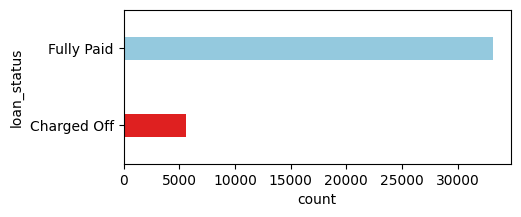

In [36]:
display(HTML("<h1 style='color:orange;'>UNIVARIATE ANALYSIS</h1>"))

# loan_status loan_status
display(HTML("<h1 style='color:orange;'>loan_status</h1>"))
print(loan_data.loan_status.value_counts(normalize=True), '\n\n')

# countplot with different colors
plt.figure(figsize=(5,2))
sns.countplot(loan_data, y='loan_status', hue='loan_status', width=0.3, palette={'Fully Paid': 'skyblue', 'Charged Off': 'red'})
plt.show()

# Univariate analysis: 14.5% defaults

Observations:

loan_status target variable is a binary class categorical feature.

'Fully Paid' & 'Charged Off' classes are in the ratio ~6:1.

So, we can call this highly imbalanced feature.

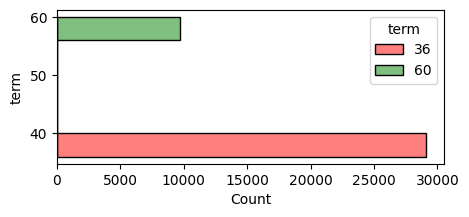



 count    38770.000000
mean        41.988548
std         10.385818
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64 


term
36    0.750477
60    0.249523
Name: proportion, dtype: float64 




In [37]:
## Write Code here

display(HTML("<h1 style='color:orange;'>term</h1>"))

# countplot with different colors
plt.figure(figsize=(5,2))
sns.histplot(loan_data, y='term', hue='term', binwidth=4, palette=['red', 'green'])
plt.show()

print("\n\n", loan_data['term'].describe(include='all'),'\n\n')
print(loan_data.term.value_counts(normalize=True), '\n\n')




Observations:

Term is also an imbalanced feature with 3:1 ratio infavor of 36months.

count     38770
unique        7
top           B
freq      11726
Name: grade, dtype: object 


grade
B    11726
A    10052
C     7879
D     5121
E     2699
F      992
G      301
Name: count, dtype: int64 


Frequency ZSCORE
 [ 1.49146377  1.08795037  0.5641543  -0.10065452 -0.6844714  -1.09593937
 -1.26250315] 




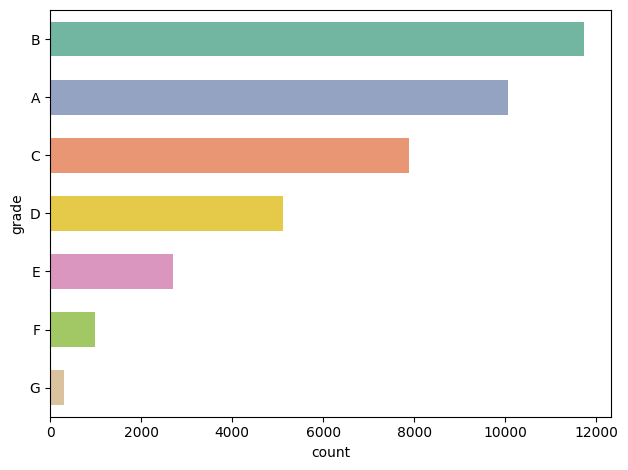

In [38]:
## Write Code here

display(HTML("<h1 style='color:orange;'>grade</h1>"))

print(loan_data['grade'].describe(),'\n\n')
print(loan_data.grade.value_counts(), '\n\n')

# outliers based on frequency
from scipy import stats

grade_vc = loan_data.grade.value_counts(normalize=True)
print('Frequency ZSCORE\n', stats.zscore(grade_vc), '\n\n')

# Sort categories by frequency
sorted_categories = loan_data['grade'].value_counts().sort_values(ascending=False).index
class_count = loan_data['grade'].nunique()
palette = sns.color_palette("Set2", class_count)
sns.countplot(data=loan_data, y='grade', hue='grade', width=0.6, order=sorted_categories, palette=palette)
plt.tight_layout()
plt.show()


Observations:

There are 7 unique grades of loan-takers A to G.

Of them, Grade B has the highest frequency 11726 and the lowest was Grade G with just 301 people.

There are no outliers as Z-score was within the [-3,+3] range.





 count                  38770
unique                    14
top       debt_consolidation
freq                   18145
Name: purpose, dtype: object 


 value counts normalized

  purpose
debt_consolidation    0.468017
credit_card           0.130049
other                 0.100077
home_improvement      0.074852
major_purchase        0.055739
small_business        0.045551
car                   0.038999
wedding               0.023988
medical               0.017591
moving                0.014908
vacation              0.009698
house                 0.009518
educational           0.008383
renewable_energy      0.002631
Name: proportion, dtype: float64 


 value counts

  purpose
debt_consolidation    18145
credit_card            5042
other                  3880
home_improvement       2902
major_purchase         2161
small_business         1766
car                    1512
wedding                 930
medical                 682
moving                  578
vacation                376
house     

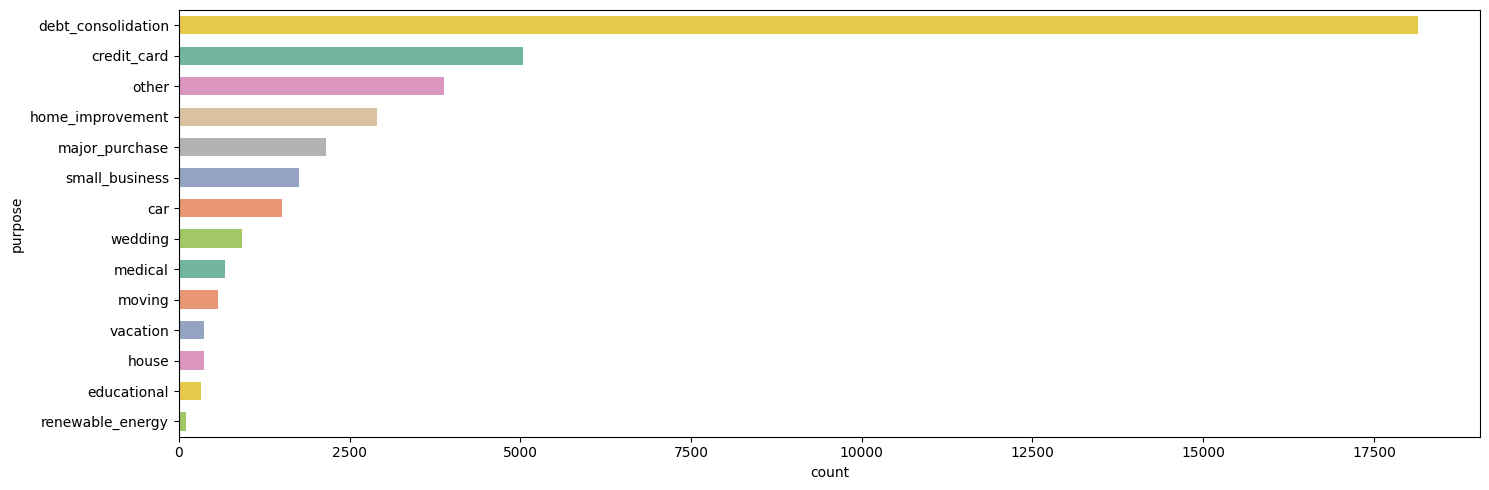

In [39]:
## Write Code here

display(HTML("<h1 style='color:orange;'>purpose</h1>"))

print("\n\n", loan_data['purpose'].describe(),'\n\n')
print(GRNBLD, 'value counts normalized\n\n', CLEAN,loan_data.purpose.value_counts(normalize=True), '\n\n')
print(GRNBLD, 'value counts\n\n', CLEAN, loan_data.purpose.value_counts(), '\n\n')


#Frequency Z-score
purpose_vc = loan_data.purpose.value_counts(normalize=False)
print('Frequency ZSCORE\n', stats.zscore(purpose_vc), '\n\n')
print('Outlier Frequency\n', purpose_vc[np.abs(stats.zscore(purpose_vc))>3], '\n\n')


#debt_consolidation frequnecy is an outlier: but, do we want to drop it? What's it share of defaults?
#=> bi-variate analysis should help

# Sort categories by frequency
sorted_categories = loan_data['purpose'].value_counts().sort_values(ascending=False).index
class_count = loan_data['purpose'].nunique()
palette = sns.color_palette("Set2", class_count)
plt.figure(figsize=(15,5))
sns.countplot(data=loan_data, y='purpose', hue='purpose', width=.6, order=sorted_categories, palette=palette)
plt.tight_layout()
plt.show()

Observations:

Purpose has 14 categories.

Of these, 'debt_consolidation' has the highest freq of 18,145.

It's also an outlier!!

That brings in the question whether to just keep it (not drop) and drop all others because it's just dominating heavily.

Only 102 people took loan for 'renewable_energy' purpose!

In [40]:
print(len(loan_data.loan_amnt.unique()))

870




 count    38770.000000
mean     11069.122388
std       7362.292600
min        500.000000
25%       5325.000000
50%       9737.500000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64 


median 9737.5 

mode 0    10000.0
Name: loan_amnt, dtype: float64 

mode# 2814 

value counts
 loan_amnt
10000.0    0.072582
12000.0    0.058164
5000.0     0.052463
6000.0     0.048878
15000.0    0.047588
             ...   
19650.0    0.000026
750.0      0.000026
23475.0    0.000026
19275.0    0.000026
950.0      0.000026
Name: proportion, Length: 870, dtype: float64 


ZSCORE
 [-0.82436287 -1.16393539 -1.17751829 ... -0.82436287 -0.82436287
 -0.48479035] 


Outliers
 652  total
 77       35000.0
122      35000.0
179      35000.0
259      35000.0
267      35000.0
          ...   
18550    35000.0
18630    35000.0
18656    35000.0
18792    35000.0
18909    35000.0
Name: loan_amnt, Length: 652, dtype: float64 




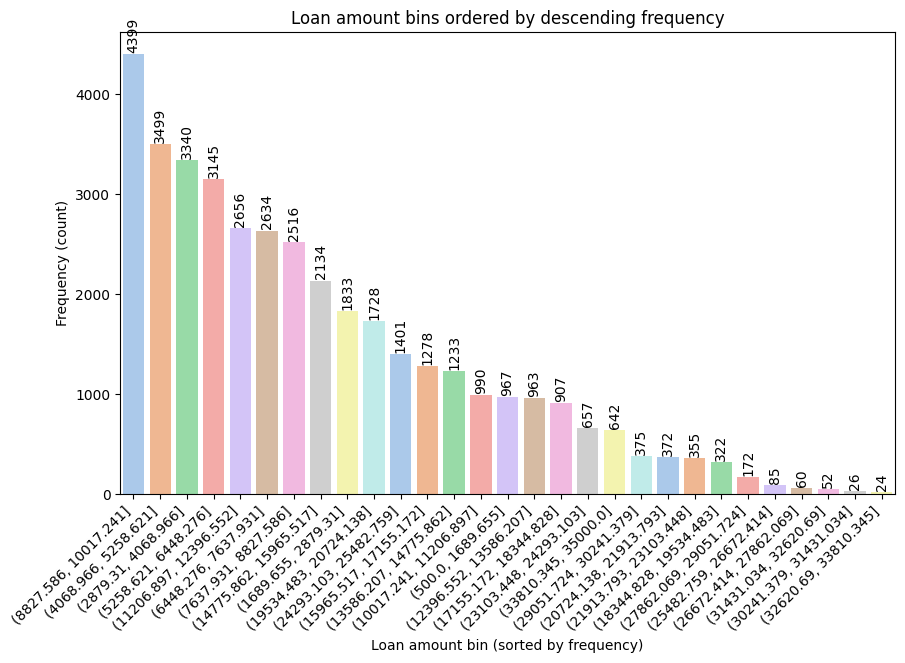

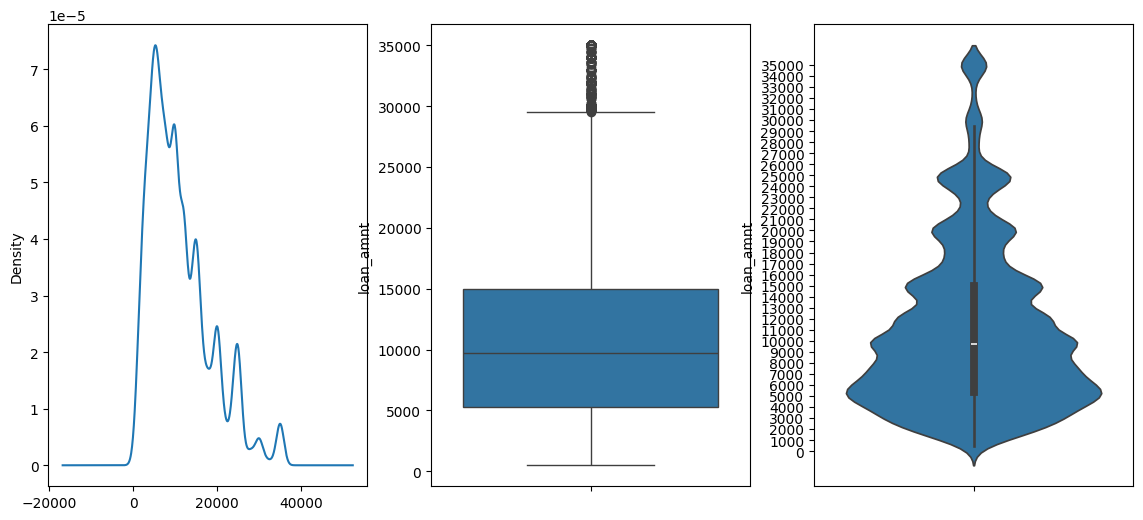

In [41]:
# Loan_amount univariate analysis
display(HTML("<h1 style='color:orange;'>loan_amnt</h1>"))

# Write Code here
print("\n\n", loan_data['loan_amnt'].describe(),'\n\n')
print("median", loan_data['loan_amnt'].median(), '\n')
print('mode', loan_data['loan_amnt'].mode(), '\n')
print('mode#', (loan_data['loan_amnt']==10000.00).sum(), '\n')
print('value counts\n', loan_data.loan_amnt.value_counts(normalize=True), '\n\n')


#Outlier loan amounts
print('ZSCORE\n', stats.zscore(loan_data.loan_amnt),'\n\n')
amnt_out = loan_data.loan_amnt[np.abs(stats.zscore(loan_data.loan_amnt))>3]
print('Outliers\n', amnt_out.size, ' total\n', amnt_out, '\n\n')


# draw histplot

num_bins = int(len(loan_data.loan_amnt.unique())/30)

col = loan_data.loan_amnt

# make bin edges
bin_edges = np.linspace(col.min(), col.max(), num_bins + 1)

# assign bins and get counts
bin_series = pd.cut(col, bins=bin_edges)
counts = bin_series.value_counts()               # by default returns counts indexed by Interval
counts_sorted = counts.sort_values(ascending=False)  # sort descending by count

# make readable labels (strings)
labels = counts_sorted.index.astype(str)

# color palette sized to number of bins
palette = sns.color_palette("pastel", n_colors=len(counts_sorted))

# plot as barplot (bins as categories ordered by frequency)
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts_sorted.values, palette=palette)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Loan amount bin (sorted by frequency)")
plt.ylabel("Frequency (count)")
plt.title("Loan amount bins ordered by descending frequency")

# annotate counts on top of bars (optional)
for i, v in enumerate(counts_sorted.values):
    plt.text(i, v + max(counts_sorted.values)*0.01, str(int(v)), ha='center', rotation='vertical')

plt.show()

fig, axes = plt.subplots(1, 3, figsize=(14, 6))

loan_data.loan_amnt.plot(kind='density', ax=axes[0])
#plt.tight_layout()
#plt.show()

sns.boxplot(loan_data.loan_amnt, ax=axes[1])
#plt.tight_layout()
#plt.show()

sns.violinplot(loan_data.loan_amnt, ax=axes[2])
plt.yticks(np.arange(0, 36000, 1000))
plt.show()

Observations

1. Median of the loan_amnt feature is ~$9737. Loan amounts ranged bewteen 500-35000, with 10000 as the most taken loan amount, and 35000 being an outlier.

2. Majority of the loans (4399) were within the $8800-$10,000 range

3. There are 652 outliers with amount $35K

4. While a detailed barplot helped understand the distribution in detail, density, box and violin plots also helped understand the feature quickly.

5. Lowest number of loans were in the ranges clearly shown in the barplot towards the right.

6. A similar barplot vis-a-vis loan_status in bi-variate amalysis would be interesting.


A total of 5234 unique incomes - to plot them we will need to bin them.



 count    3.877000e+04
mean     6.880025e+04
std      6.416132e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.892350e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64 


annual_inc
60000.00    0.038019
50000.00    0.026644
40000.00    0.022182
45000.00    0.020996
30000.00    0.020892
              ...   
70522.26    0.000026
78862.00    0.000026
54099.00    0.000026
50952.00    0.000026
5000.00     0.000026
Name: proportion, Length: 5234, dtype: float64 


 
INCOME: Min 4000.0 Max 6000000.0 

 
5234
annual_inc
60000.0     1474
50000.0     1033
40000.0      860
45000.0      814
30000.0      810
            ... 
12500.0        1
57100.0        1
213000.0       1
33990.0        1
43949.0        1
Name: count, Length: 5234, dtype: int64

 annual_inc
4000.0       1
4080.0       1
4200.0       2
4800.0       4
4888.0       1
            ..
1782000.0    1
1900000.0    1
2039784.0    1
3900000.0    1
6000000.0    1
Name: count, Length: 5234, dtype:

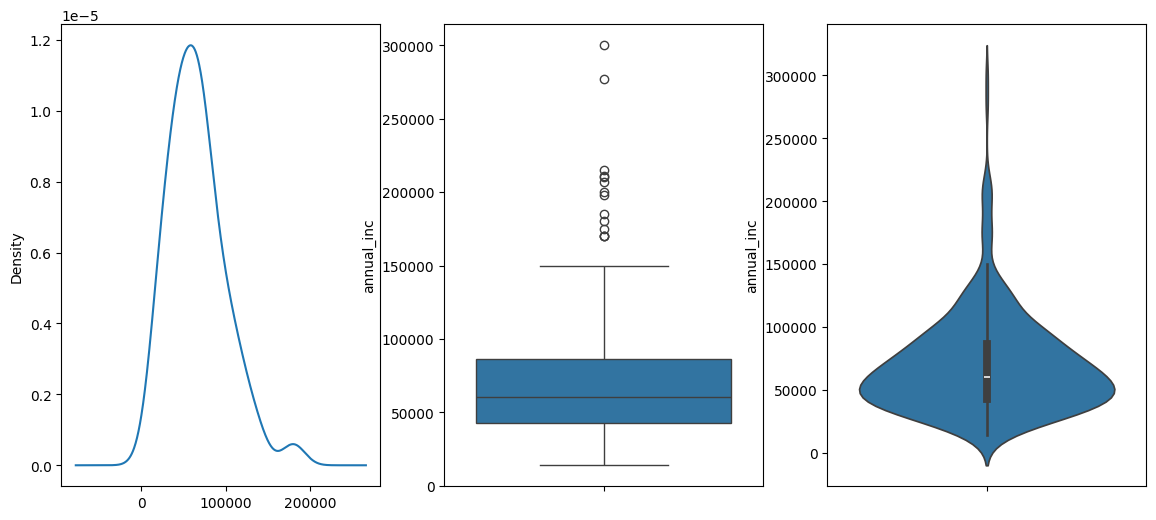

In [42]:
## Write Code here
display(HTML("<h1 style='color:orange;'>annual_inc</h1>"))

print('\n\n', loan_data['annual_inc'].describe(),'\n\n')
print(loan_data.annual_inc.value_counts(normalize=True), '\n\n')
print(GRNBLD, '\nINCOME: Min', loan_data.annual_inc.min(), 'Max', loan_data.annual_inc.max(),'\n\n', CLEAN)

print(len(loan_data.annual_inc.unique()))
# print sorted value counts to know the distribution, min/max
print(loan_data.annual_inc.value_counts().sort_values(ascending=False))

avc = loan_data.annual_inc.value_counts()

# sort avc on income
avc.sort_index(inplace=True)
# print with income and freq as headers
print("\n", avc)

#Outlier annual incomes
#some confusion on the output: revisit
print('ZSCORE\n', stats.zscore(loan_data.annual_inc),'\n\n')
anninc_out = loan_data.loan_amnt[np.abs(stats.zscore(loan_data.annual_inc))>3]
print('\nOutliers\n', anninc_out.size, ' total\n\n')
print('mode', loan_data['annual_inc'].mode(), '\n')

fig, axes = plt.subplots(1, 3, figsize=(14, 6))

loan_data.annual_inc.sample(100).plot(kind='density', ax=axes[0])

sns.boxplot(loan_data.annual_inc[::100], ax=axes[1])

sns.violinplot(loan_data.annual_inc[::100], ax=axes[2])
plt.show()

Observations

1. Income of loan takers ranged from 4K, all the way up to $6M per annum !!

2. The median is 60K with 1434 count and 50K is the next with 1033 count

3. The density plot obviously peaked between $50K-$60K and then tapered off fast as it approached $200K

4. There are 280 outliers, the big ones are 6M and 4M and all above 150K (box plot here is pretty useful)

5. Violing plot expectedly bulged between 50K-60K and significantly tailed after 150K

6. The median is nicely shown in all the plots.

**Observations**

Overall:
0. Loan Status: There are ~15% defaults, which is high
1. Term: 36mon term loan is taken 75% of the time whilr 72mon loan is 25%
2. Grade: 'B' grade loans were the most taken while 'G' were the least.
3. Purpose: Debt consolidation is the high frequency purpose.
4. annual_inc: With range between 4k-6M, mean of 59k, std of 64k, has mode of 60k, shows a lot of income concentration between 10k and 120k.


#### Bivariate Analysis

For the bivariate analysis, you can perform multiple analysis such as follows:

- How the default rate varies across the different variables
- Correlation Matrix
- etc.

Let's see if the reasons for defaults has anything to with the loan_amnt, annual_inc, int_rate, etc, or if there is no spcific correlation at all !!

In [43]:
display(HTML("<h1 style='color:orange;'>BIVARIATE ANALYSIS</h1>"))
display(HTML("<h2 style='color:lightgreen;'>Metrics:</h2>"))
display(HTML("<h2 style='color:blue;'>Numerical features:</h2>"))
display(HTML("<h2 style='color:lightgreen; margin-left:30px;'>Pearson, Kendall, Spearman correlations</h2>"))
display(HTML("<h2 style='color:lightgreen; margin-left:30px;'>Groupby description of the each feature vs loan_status classes</h2>"))
display(HTML("<h2 style='color:lightgreen; margin-left:30px;'>T-stat, P-val: Null Hyptothesis</h2>"))
display(HTML("<h2 style='color:lightgreen; margin-left:30px;'>Various informative plots</h2>"))
display(HTML("<h2 style='color:blue;'>Categorical features:</h2>"))
display(HTML("<h2 style='color:lightgreen; margin-left:30px;'>Contingency table</h2>"))
display(HTML("<h2 style='color:lightgreen; margin-left:30px;'>Chi-square distributions and plots</h2>"))
display(HTML("<h2 style='color:lightgreen; margin-left:30px;'>Various informative plots</h2>"))


In [44]:

'''
Different methods of correlation analysis: of bivariate analysis (metrics and visualizations)
'''

def corr_strength(corr_strength):
  #Perfect: 0.80 to 1.00
  #Strong: 0.50 to 0.79
  #Moderate: 0.30 to 0.49
  #Weak: 0.00 to 0.29
  if corr_strength >= 0.80:
    return 'Perfect'
  elif corr_strength >= 0.50:
    return 'Strong'
  elif corr_strength >= 0.30:
    return 'Moderate'
  elif corr_strength >= 0.00:
    return 'Weak'
  else:
    return 'No correlation'

'''
API to analyze bivariate metrics for numerical features
'''
def bivariate_metrics (num_col, df=loan_data):
    display(HTML(f"<h2 style='color:orange;'>bivariate_metrics of '{num_col}' vs 'loan_status'</h2>"))
    print(f"\n\n{num_col}:\n\n", loan_data[num_col].describe(),'\n')
    print(f'{num_col} normalized:\n', loan_data[num_col].value_counts(normalize=True), '\n')
    corr_strength1 = df.loan_status.map({'Fully Paid':0, 'Charged Off':1}).corr(df[num_col], method='pearson')
    corr_strength2 = df.loan_status.map({'Fully Paid':0, 'Charged Off':1}).corr(df[num_col], method='kendall')
    corr_strength3 = df.loan_status.map({'Fully Paid':0, 'Charged Off':1}).corr(df[num_col], method='spearman')
    print("\n pearson correlation:: ", corr_strength1)
    print("\n kendall correlation:: ", corr_strength2)
    print("\n spearman correlation:: ", corr_strength3)
    # get the outlier count
    print("\n Outlier count using z-score: ", df[num_col][np.abs(stats.zscore(df[num_col]))>3].size)
    print("   Acceptable outliers:", df[num_col].size*0.003)
    if df[num_col][np.abs(stats.zscore(df[num_col]))>3].size > df[num_col].size*0.003:
      print("\nLet's consider Kendall or Spearman correlation as #of entries with |Z-score| > 3 is > .3% of data")
      print("  ", corr_strength(corr_strength2), " Kendall correlation")
      print("  ", corr_strength(corr_strength3), " Spearman correlation")
    else:
      print("\nLet's consider Pearson correlation as #of entries with |Z-score| > 3 is < .3% of data")
      print("  ", corr_strength(corr_strength1), " Pearson correlation")

    print(f"\ngroupby loan_status and {num_col}\n", df.groupby('loan_status')[num_col].describe(), "\n\n")

    # T-test
    # split df num_col into paid-off and charged-off dataframes

    from scipy.stats import ttest_ind
    num_col_charged_off = df[df['loan_status'] == 'Charged Off'][num_col]
    num_col_fully_paid  = df[df['loan_status'] == 'Fully Paid'][num_col]

    t_stat, p_value = ttest_ind(num_col_charged_off, num_col_fully_paid)
    print("\nT-statistic: ", t_stat, "P-value: ", p_value)
    if p_value < .05:
      print("There is significant difference in the mean loan amounts between the two groups.\n   => strong evidence against the null hypothesis.")
    else:
      print("There is no significant difference in the mean loan amounts between the two groups.\n\n")

    # draw html BOLD double line using display
    display(HTML("<hr>"))
    display(HTML("<hr>"))
    print('\n\n')

'''
API to plot stacked bar for numerical feature vs target with a lot of
useful histogram information.
1. Bin ranges of the numerical feature
2. Sorted bars as per the frequency of the num_col
3. Dsiplay the 'defaults' and 'paid-off' poportions in the same bar with different colors
4. Display the bin range at the bottom as xticks in a readable form
5. Display actual counts of both classes on top of bars
'''
def stacked_bar_num_bin_binary_sorted(df, num_col, target_col, bins=10):
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Bin the numeric column
    bin_edges = np.histogram_bin_edges(df[num_col], bins=bins)
    df['bin_range'] = pd.cut(df[num_col], bins=bin_edges, include_lowest=True)

    # Count per bin & target
    bin_counts = df.groupby(['bin_range', target_col]).size().reset_index(name='count')

    # Pivot for stacked bar format
    pivot_df = bin_counts.pivot(index='bin_range', columns=target_col, values='count').fillna(0)

    # Sort bins by total frequency (descending)
    pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

    # Numeric positions for bars
    x_pos = np.arange(len(pivot_df.index))
    bar_width = 0.85  # Slightly less than 1 for small gaps

    fig, ax = plt.subplots(figsize=(12, 8))
    bottom_vals = np.zeros(len(pivot_df))
    colors = sns.color_palette("Set2", n_colors=len(pivot_df.columns))

    # Plot bars
    for idx, target_class in enumerate(pivot_df.columns):
        counts = pivot_df[target_class].values
        ax.bar(
            x_pos,
            counts,
            bottom=bottom_vals,
            label=str(target_class),
            color=colors[idx],
            width=bar_width
        )
        bottom_vals += counts

    # Add counts above bars (comma separated)
    for i, row in enumerate(pivot_df.itertuples(index=False)):
        label_text = ", ".join(str(int(v)) for v in row)
        total_height = sum(row)
        ax.text(
            x_pos[i],
            total_height + (max(pivot_df.sum(axis=1)) * 0.01),
            label_text,
            ha='center',
            va='bottom',
            fontsize=7,
            rotation='vertical',
            fontweight='bold'
        )

    # Remove extra side margins
    ax.set_xlim(-bar_width/2, len(x_pos) - 1 + bar_width/2)

    # Labels & style
    ax.set_xticks(x_pos)
    ax.set_xticklabels(pivot_df.index.astype(str), rotation=90, fontsize=6)
    ax.set_title(f'{num_col} Distribution by {target_col} (Sorted by Frequency)', fontsize=14)
    ax.set_xlabel(f'{num_col} Bin Range')
    ax.set_ylabel('Count')
    ax.legend(title=target_col)
    plt.tight_layout()
    plt.show()

'''
Plot:
1. Box plot    : for quick identification of outliers and median
2. Violin plot : for quick identification of outliers and median with density and mooth distribution
3. KDE plot    : for quick perception of distribution
4. barplot     : for very informative histogram bars
'''
def bivariate_num_bin(df, num_col, target_col, bins=10):
    # start on a clean slate
    plt.clf()

    # Sort target categories by median of numeric variable
    order = df.groupby(target_col)[num_col].median().sort_values().index

    fig, axes = plt.subplots(1, 3, figsize=(12, 5))
    fig.suptitle(f'Bivariate Analysis: {num_col} vs {target_col}', fontsize=16, y=1.02)

    # 1. Boxplot
    sns.boxplot(x=target_col, y=num_col, data=df, order=order, ax=axes[0])
    axes[0].set_title('Box Plot')

    # 2. Violin plot
    sns.violinplot(x=target_col, y=num_col, data=df, order=order, ax=axes[1])
    axes[1].set_title('Violin Plot')

    # 3. KDE plot
    sns.kdeplot(data=df, x=num_col, hue=target_col, fill=True, ax=axes[2])
    axes[2].set_title('KDE Plot')

    plt.tight_layout()
    plt.show()

    # 4. Histogram using bar plot with bars sorted as per frequency
    stacked_bar_num_bin_binary_sorted(df, num_col, target_col, bins=bins)
    plt.tight_layout()
    plt.show()

'''
API to plot bivariate metrics for categorical features
'''
def stacked_bar_cat_binary_sorted(df, cat_col, target_col):
    # Count occurrences for each category/target combination
    counts = df.groupby([cat_col, target_col]).size().unstack(fill_value=0)
    counts = counts.reindex(columns=['Fully Paid', 'Charged Off'])

    # Sort categories by total frequency
    counts = counts.loc[counts.sum(axis=1).sort_values(ascending=False).index]

    # Plot stacked bar
    ax = counts.plot(
        kind='bar',
        stacked=True,
        figsize=(10, 6),
        color=['skyblue', 'orange'],
        edgecolor='black'
    )

    # Annotate counts for each segment
    #for i, category in enumerate(counts.index):
    for i, (cat, row) in enumerate(counts.iterrows()):
        c0, c1 = row[0], row[1]   # bottom class count, top class count
        total_height = c0 + c1
        ax.text(i, total_height + 1, f"{c0}-{c1}",
                ha='center', va='bottom', fontsize=9, color='black',rotation='vertical')

    # Styling
    ax.set_xlabel(cat_col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_title(f"{cat_col} vs {target_col} (Stacked Bar)", fontsize=14, color='darkgreen')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

'''
API to analyze bivariate metrics for categorical features
'''
from logging import critical
def bivariate_cat_metrics (cat_col, rmx1, rdiv1, rmx2, rdiv2, dof1, dof2, df=loan_data):
    # Grade vs loan_status
    # 1. Contingency Table
    # 2. Chi-square test of Independence
    # 3. Visualization

    display(HTML(f"<h2 style='color:orange;'>bivariate_metrics of '{cat_col}'' vs 'loan_status'</h2>"))

    # 1. Contingency Table
    print(pd.crosstab(df[cat_col], df.loan_status))

    # Grades BCD have relatively more defaults

    # 2. Chi-square test of Independence
    from scipy.stats import chi2_contingency as chi2_c
    from scipy.stats import chi2 as chisq
    chi2, p, dof, expected = chi2_c(pd.crosstab(df[cat_col], df.loan_status))
    print("\n\n Chi-square:", chi2, "\n", "P-value:", p, "\n", "Degrees of freedom:", dof, "\n")

    #alpha
    a=.05
    critical_value = chisq.ppf(1-a, dof)
    print("Critical value: ", critical_value)
    # Chi-square 1560 > 13 (criticial value)
    # p-value of 0.0 (<0.05) => there is a strong association between cat_col and defaults
    # we reject the null hypothesis

    # 3. Chi-square Visualization
    print("\n\n Visualization\n")
    plt.clf()

    #x = np.linspace(0, 100, 2000)
    #plt.xticks(np.arange(0, 100, 5))
    #y = chisq.pdf(x, dof)
    #plt.plot(x, y, 'r-', lw=5, alpha=0.6, label='Chi-square dof=34')

    x = np.linspace(0, rmx1, rdiv1)
    plt.xticks(np.arange(0, rmx1, 5))
    y = chisq.pdf(x, dof)
    plt.plot(x, y, 'r-', lw=5, alpha=0.6, label=f'Chi-square dof={dof1}')
    plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=0.5, label='Critical Region')

    #plt.axvline(chi2, color='blue', linestyle='dashed', label='Calculated Chi-Square')
    plt.axvline(critical_value, color='green', linestyle='dashed', label='Critical Value')
    plt.title('Chi-Square Distribution and Critical Region')
    plt.xlabel('Chi-Square Value')
    plt.ylabel('Probability Density Function')
    plt.legend()
    plt.show()

    x = np.linspace(0, rmx2, rdiv2)
    plt.xticks(np.arange(0, rmx2, 5))
    y = chisq.pdf(x, dof)
    plt.plot(x, y, 'r-', lw=5, alpha=0.6, label=f'Chi-square dof={dof2}')
    plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=0.5, label='Critical Region')
    plt.axvline(chi2, color='blue', linestyle='dashed', label='Calculated Chi-Square')
    plt.axvline(critical_value, color='green', linestyle='dashed', label='Critical Value')
    plt.title('Chi-Square Distribution and Critical Region')
    plt.xlabel('Chi-Square Value')
    plt.ylabel('Probability Density Function')
    plt.legend()
    plt.show()

    #print("Calculated Chi-Square (1500+ is way greater then critical value of 13 - so there is a large discrepancy between\nobserved and expected data - a very strong reason to rject NULL Hypothesis\n\n")
    print("\n")
    display(HTML(f"<h3 style='color:orange;'>Calculated Chi-Square (1500+ is way greater then critical value of 13 - so there is a large discrepancy between\nobserved and expected data - a very strong reason to rject NULL Hypothesis</h3>"))
    print("\n")


In [45]:
print(len(loan_data.loan_amnt.unique()))

870


Observation:

There are 870 unique loan_amnt values and we will aggregate (bin) them into 87 bins for visualization.



loan_amnt:

 count    38770.000000
mean     11069.122388
std       7362.292600
min        500.000000
25%       5325.000000
50%       9737.500000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64 

loan_amnt normalized:
 loan_amnt
10000.0    0.072582
12000.0    0.058164
5000.0     0.052463
6000.0     0.048878
15000.0    0.047588
             ...   
19650.0    0.000026
750.0      0.000026
23475.0    0.000026
19275.0    0.000026
950.0      0.000026
Name: proportion, Length: 870, dtype: float64 


 pearson correlation::  0.05845301542635646

 kendall correlation::  0.038688899165305865

 spearman correlation::  0.04678491721991284

 Outlier count using z-score:  652
   Acceptable outliers: 116.31

Let's consider Kendall or Spearman correlation as #of entries with |Z-score| > 3 is > .3% of data
   Weak  Kendall correlation
   Weak  Spearman correlation

groupby loan_status and loan_amnt
                count          mean          std    min     25%      50%  \
l

<Figure size 640x480 with 0 Axes>

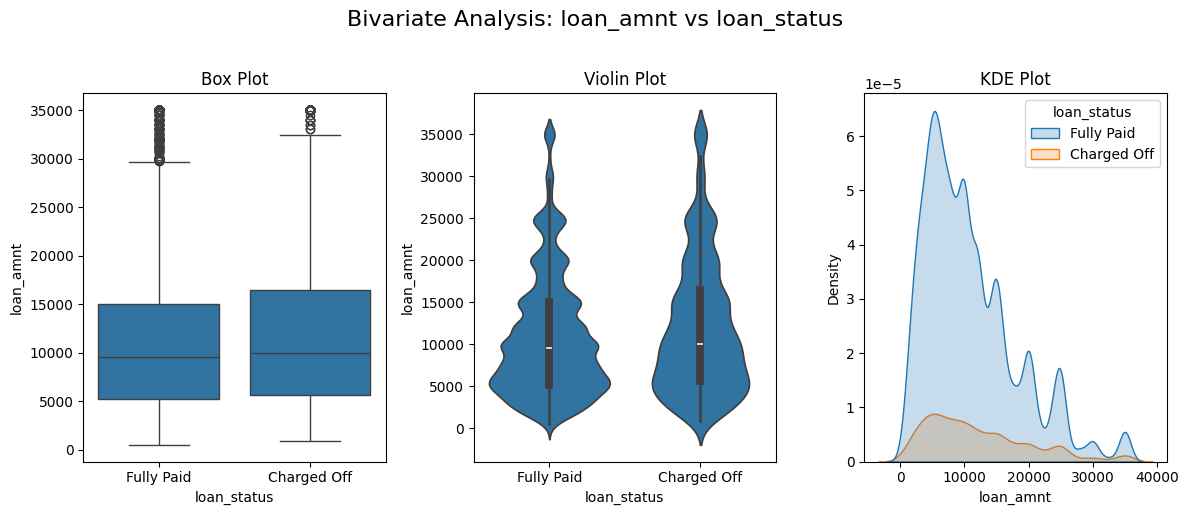

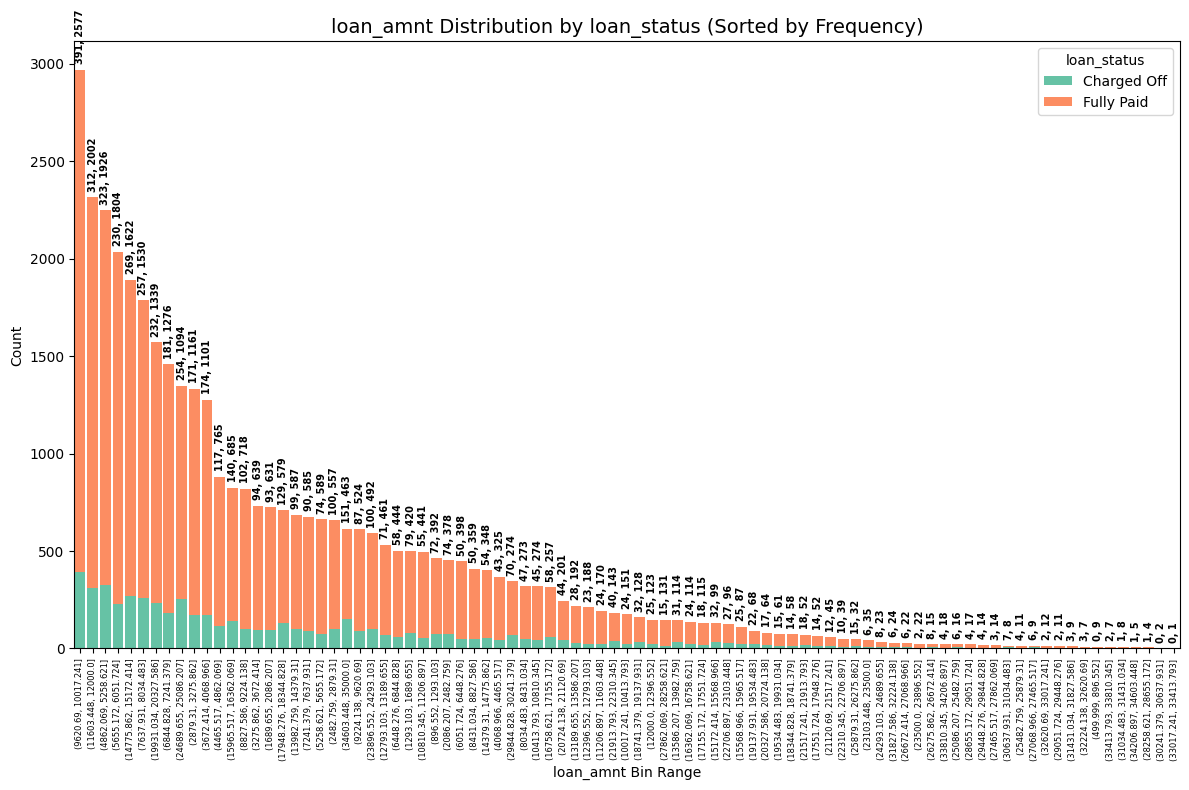

<Figure size 640x480 with 0 Axes>

In [46]:
from contextlib import redirect_stderr
#Write your code here

# Let's do the following for a few variables w.r.t. defaults
# 1. correlation and description
# 2. box, etc plots
# 3. T-test, chi-square tests where applicable

# (A) loan_amnt
# Bivariate analysis of loan_amnt and loan_status

bivariate_metrics('loan_amnt')

# PLOTS
bivariate_num_bin(loan_data, 'loan_amnt', 'loan_status', bins=87)


Observations:

1. The number of entries with |Z-score| > 3 for loan_amnt feature w.r.t. target is > .3% of the total entries.

2. It's advised to use Kendall or Spearman corr-coefficients for this case; but, both of them are very weak, implying loan_amnt's are not reliable predictors of target's classes.

3. The P-val also confirms the same by rejecting the NULL hypothesis that the means of the two features loan_amnt and loan_status are the same and that variations in one do not imply the other directly.

4. The informative barplot of the loan_mant vs loan_status:

  a) It's a sorted plot in the descending order of the counts of each loan_amnt bin.

  b) Ranges of bins are x-ticks
  
  c) Bin counts are displayed above each bar with defaults and paid-off portions giving more specific details.

        i) Interesting fact noticed is that there are 0 defaulters for bins 500-900, 30241-30637, 33017-33413

  d) The box, violin and KDE plots all show useful information

        i) the median for both classes is around 10K
       ii) high density for both classes is aroung 5-6K
      iii) A lot of outliers above 30K for fully paid and above 32K for defaults

5. Further studies could have been done for which loan_amount bins highest defaults were observed using defaulters/paid-off percentage graph in sorted order.

In [47]:
print(len(loan_data.int_rate.unique()))

371


Observation:

There are 371 unique int_rate values and we will aggregate (bin) them into 38 bins for visualization.



int_rate:

 count    38770.000000
mean        11.947715
std          3.697871
min          5.420000
25%          8.940000
50%         11.780000
75%         14.420000
max         24.590000
Name: int_rate, dtype: float64 

int_rate normalized:
 int_rate
10.99    0.023936
11.49    0.020506
7.51     0.020299
13.49    0.019603
7.88     0.018700
           ...   
17.34    0.000026
16.71    0.000026
16.15    0.000026
18.36    0.000026
14.67    0.000026
Name: proportion, Length: 371, dtype: float64 


 pearson correlation::  0.20915751219459527

 kendall correlation::  0.16516836199031645

 spearman correlation::  0.20147768299429655

 Outlier count using z-score:  41
   Acceptable outliers: 116.31

Let's consider Pearson correlation as #of entries with |Z-score| > 3 is < .3% of data
   Weak  Pearson correlation

groupby loan_status and int_rate
                count       mean       std   min    25%    50%    75%    max
loan_status                                                            

<Figure size 640x480 with 0 Axes>

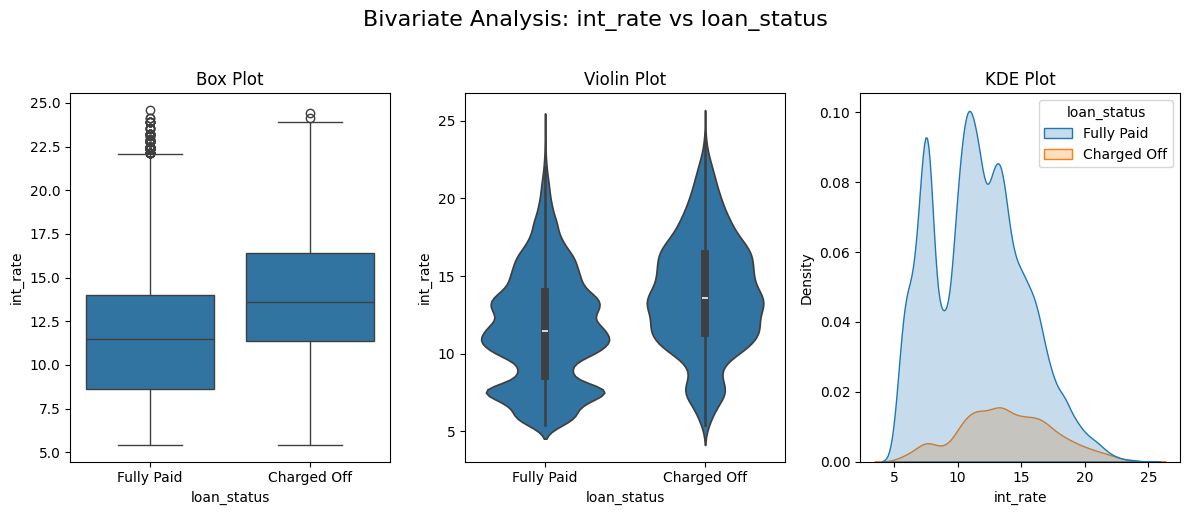

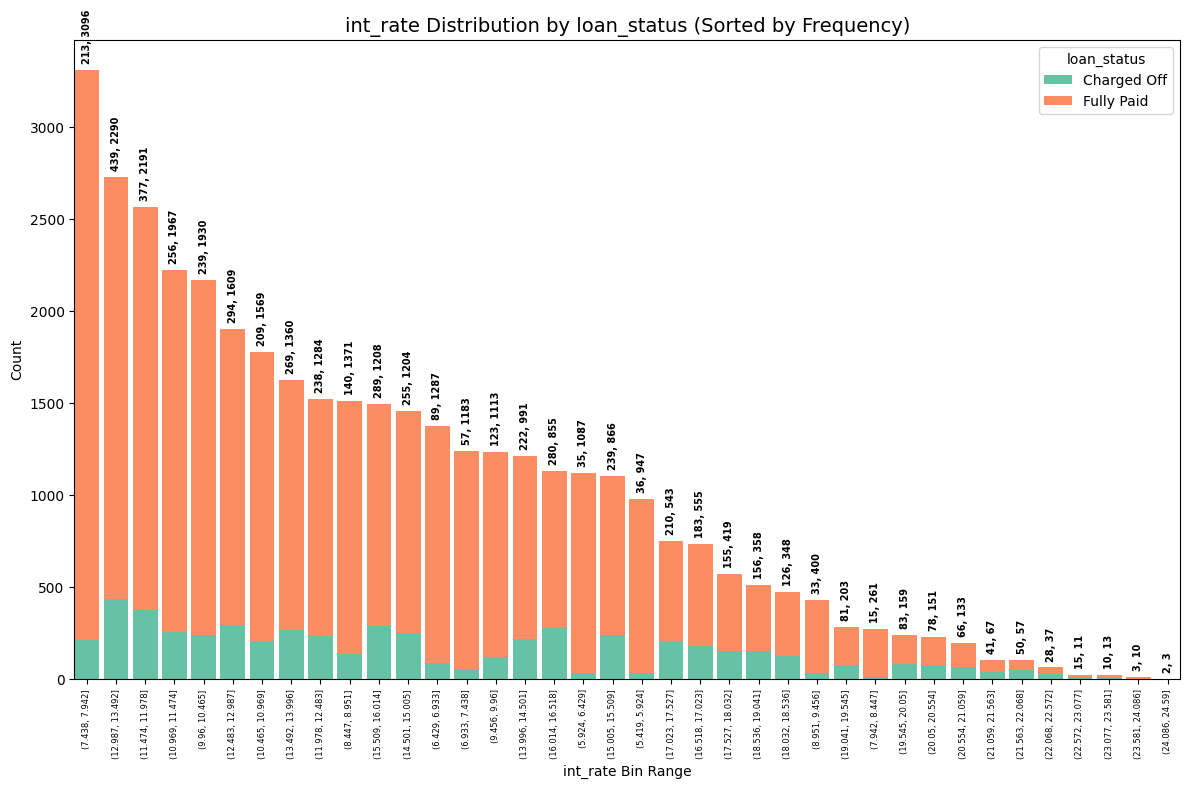

<Figure size 640x480 with 0 Axes>

In [48]:
#Write your code here
# (B) Interest rate
# 1. correlation and description
# 2. box, etc plots
# 3. T-test, chi-square tests where applicable

# Bivariate metrics
bivariate_metrics('int_rate')

# PLOTS
bivariate_num_bin(loan_data, 'int_rate', 'loan_status', bins=38)

Observations:

1.  The number of entries with |Z-score| > 3 for int_rate feature w.r.t. target is < .3% of the total entries.

2.  It's advised to use Pearson corr-coefficient for this case; but, it's weak, implying int_rate's are not reliable predictors of target's classes.

3.  The P-val also confirms the same by rejecting the NULL hypothesis that the means of the two features int_rate and loan_status are the same and that variations in one do not imply the other directly.

4.  The informative barplot of the int_rate vs loan_status:

    a) It's a sorted plot in the descending order of the counts of each int_rate bin.

    b) Ranges of bins are x-ticks

    c) Bin counts are displayed above each bar with defaults and paid-off  portions giving more specific details.

    d) The box, violin and KDE plots all show useful information

         i) the median int_rate for fully_paid is 11.5% and for defaults is 13.6%

        ii) high density is around 11% & 7.5% for fully_paid and 10-18% for defaults

       iii) Outliers are above 22% for fully_paid and 23.5% for defaults

5) Further studies could have been done for which int_amount bins highest defaults were observed using defaulters/paid-off percentage graph in sorted order.

In [49]:
print(len(loan_data.dti.unique()))

2856


Observation:

There are 2856 unique dti values and we will aggregate (bin) them into 57 bins for visualization.



dti:

 count    38770.000000
mean        13.276704
std          6.676355
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64 

dti normalized:
 dti
0.00     0.004669
12.00    0.001186
18.00    0.001161
19.20    0.001006
13.20    0.001006
           ...   
28.08    0.000026
28.82    0.000026
25.43    0.000026
0.06     0.000026
27.87    0.000026
Name: proportion, Length: 2856, dtype: float64 


 pearson correlation::  0.044827302219276464

 kendall correlation::  0.03781301884490979

 spearman correlation::  0.046300590023627686

 Outlier count using z-score:  0
   Acceptable outliers: 116.31

Let's consider Pearson correlation as #of entries with |Z-score| > 3 is < .3% of data
   Weak  Pearson correlation

groupby loan_status and dti
                count       mean       std  min   25%     50%    75%    max
loan_status                                                               
Charged Off   5634.0

<Figure size 640x480 with 0 Axes>

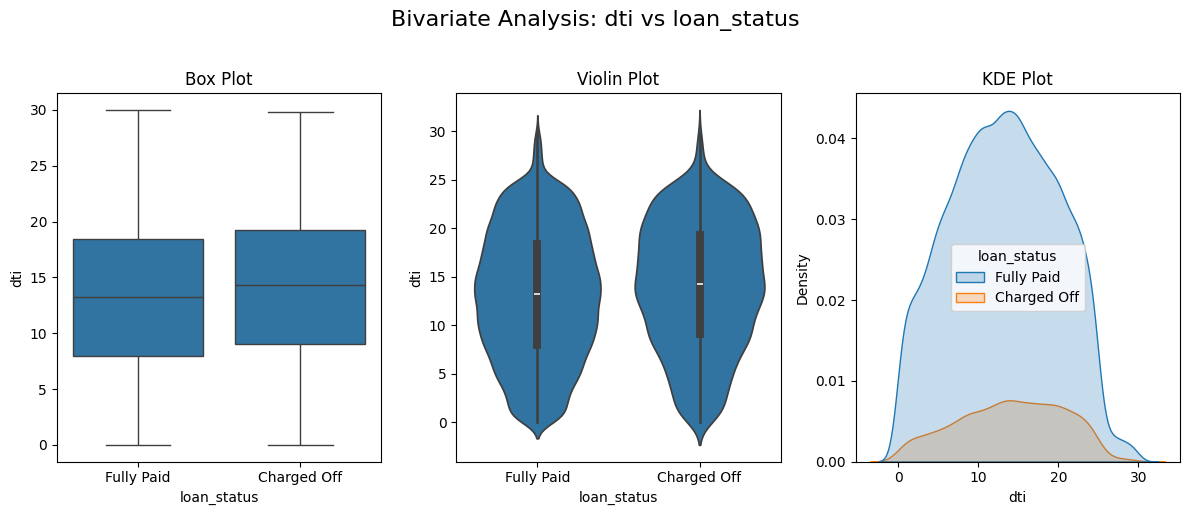

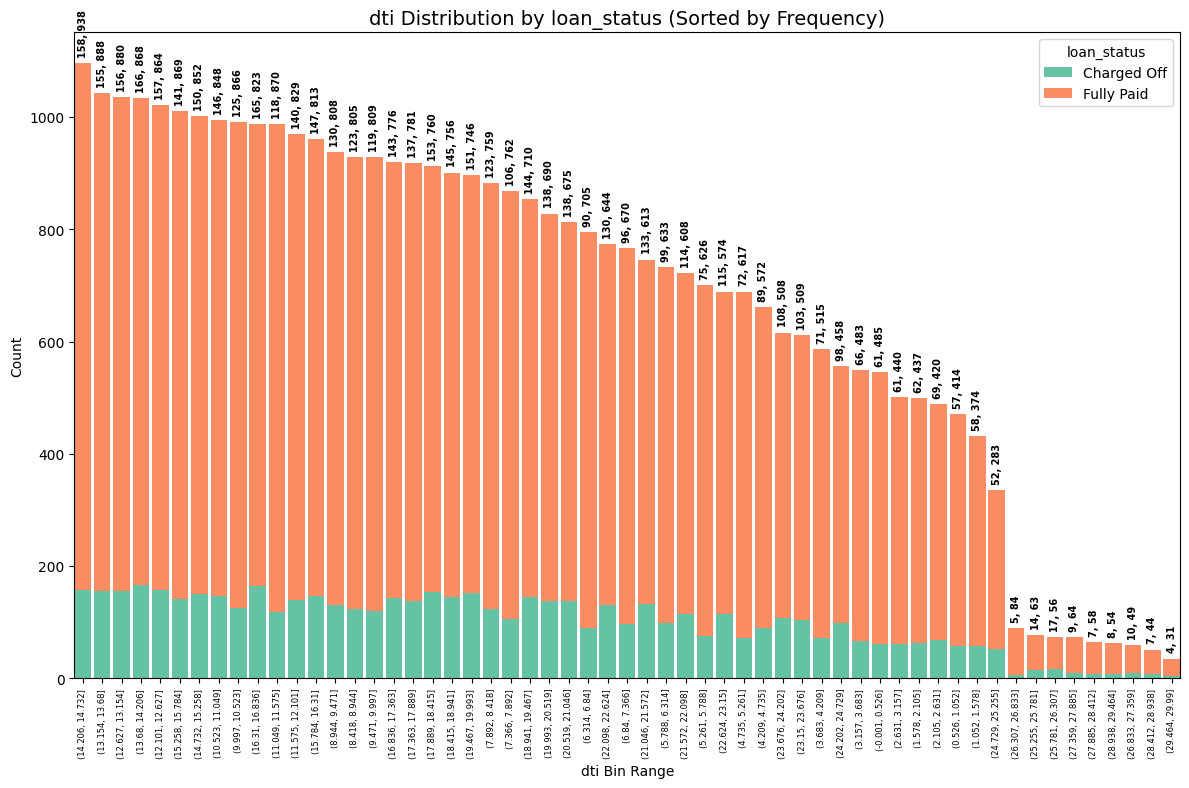

<Figure size 640x480 with 0 Axes>

In [50]:
#Write your code here

# we will cover a couple of more numerical features here
# dti : debt to income ratio
# 1. correlation and description
# 2. box, etc plots
# 3. T-test, chi-square tests where applicable

bivariate_metrics('dti')

# PLOTS
bivariate_num_bin(loan_data, 'dti', 'loan_status', bins=57)



Observations:

1. The number of entries with |Z-score| > 3 for dti feature 0

2. It's advised to use Pearson corr-coefficients for this case; but, it's very weak, implying dti's are not reliable predictors of target's classes.

3. The P-val also confirms the same by rejecting the NULL hypothesis that the means of the two features dti and loan_status are the same and that variations in one do not imply the other directly.

4. The informative barplot of the dti vs loan_status:

  a) It's a sorted plot in the descending order of the counts of each dti bin.

  b) Ranges of bins are x-ticks
  
  c) Bin counts are displayed above each bar with defaults and paid-off portions giving more specific details.

        i) Interesting fact noticed is that the frequencies for dti's > 25.25 dropped significantly => very few people with high DTI have taken any loans.

  d) The box, violin and KDE plots all show useful information

        i) the DTI medians for fully_paid and defaults are 13.2 & 14.3, resp'ly
       ii) high density for both classes is between 1-24 DTI
      iii) No Outliers


In [51]:
print(len(loan_data.delinq_2yrs.unique()))

11


Observation:

There are 11 unique delinq_2yrs values and we will aggregate (bin) them into 12 bins for visualization.



delinq_2yrs:

 count    38770.000000
mean         0.146660
std          0.492197
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64 

delinq_2yrs normalized:
 delinq_2yrs
0.0     0.891385
1.0     0.083080
2.0     0.017462
3.0     0.005520
4.0     0.001548
5.0     0.000542
6.0     0.000258
7.0     0.000103
8.0     0.000052
9.0     0.000026
11.0    0.000026
Name: proportion, dtype: float64 


 pearson correlation::  0.02062734967928467

 kendall correlation::  0.019612437906319294

 spearman correlation::  0.019817915918554984

 Outlier count using z-score:  990
   Acceptable outliers: 116.31

Let's consider Kendall or Spearman correlation as #of entries with |Z-score| > 3 is > .3% of data
   Weak  Kendall correlation
   Weak  Spearman correlation

groupby loan_status and delinq_2yrs
                count      mean       std  min  25%  50%  75%   max
loan_status                                 

<Figure size 640x480 with 0 Axes>

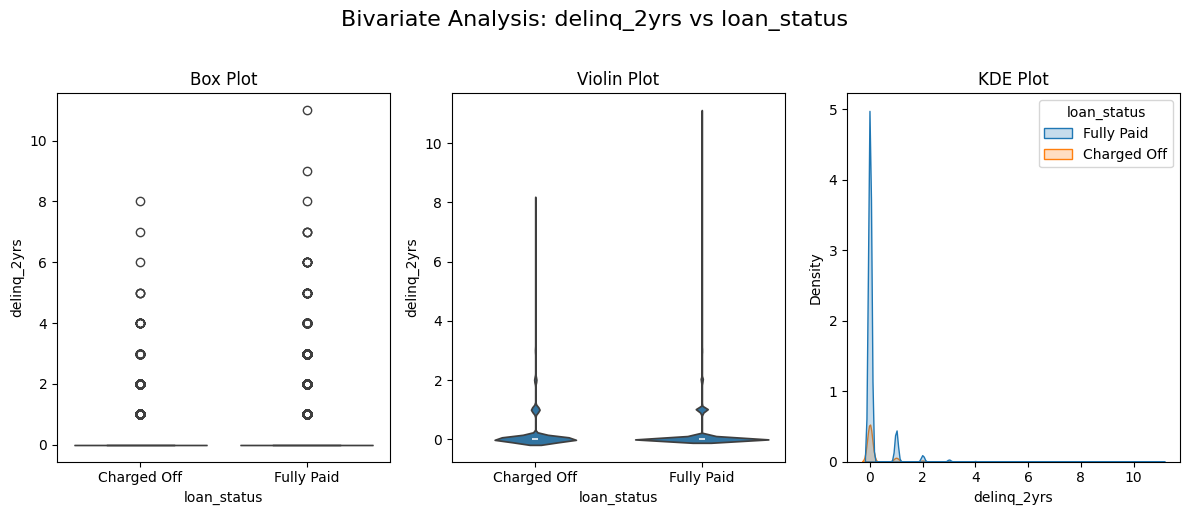

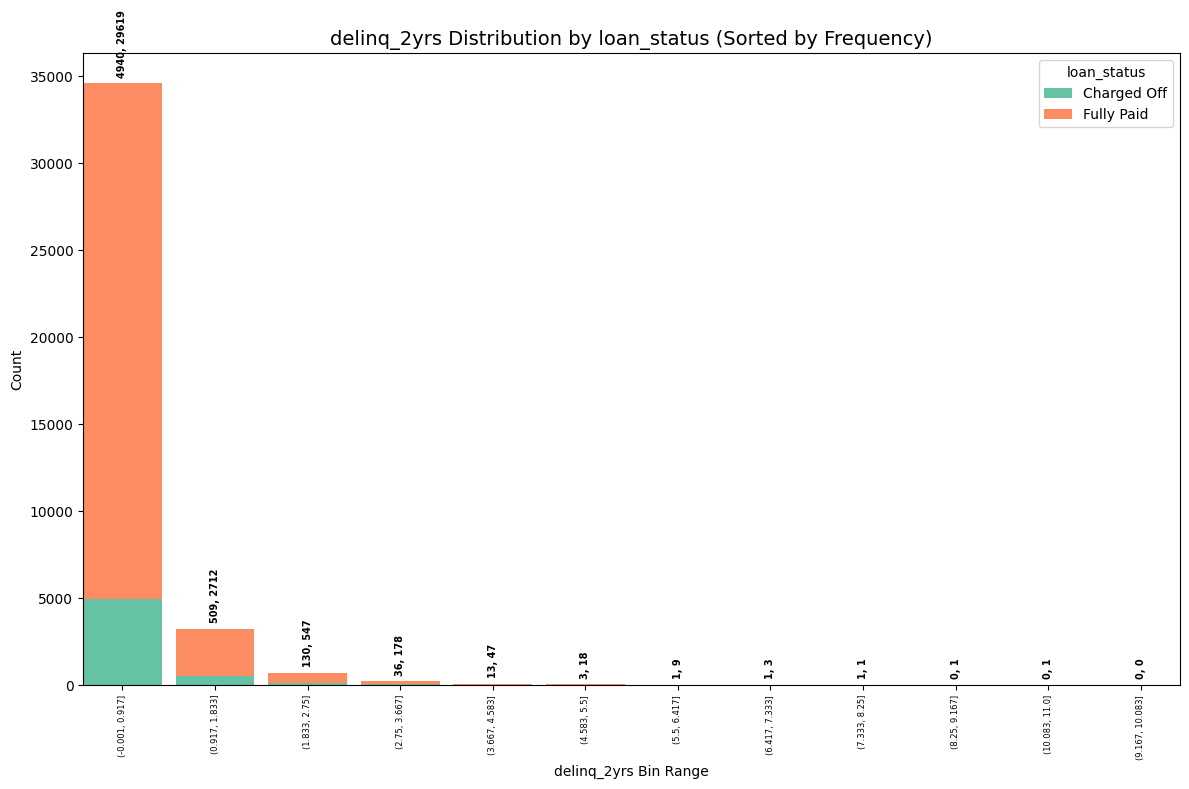

<Figure size 640x480 with 0 Axes>

In [52]:
# delinquency
# 1. correlation and description
# 2. box, etc plots
# 3. T-test, chi-square tests where applicable

bivariate_metrics('delinq_2yrs')

# PLOTS
bivariate_num_bin(loan_data, 'delinq_2yrs', 'loan_status', bins=12)

Observations:

1. The number of entries with |Z-score| > 3 for delinq_2yrs feature are > the acceptable outlier count (.3%).

2. It's advised to use Kendall & Spearman corr-coefficients for this case; but, are very weak, implying delinq_2yrs's are not reliable predictors of target's classes.

3. The P-val also confirms the same by rejecting the NULL hypothesis that the means of the two features delinq_2yrs and loan_status are the same and that variations in one do not imply the other directly.

4. The informative barplot of the delinq_2yrs vs loan_status:

  a) It's a sorted plot in the descending order of the counts of each delinq_2yrs bin.

  b) Ranges of bins are x-ticks
  
  c) Bin counts are displayed above each bar with defaults and paid-off portions giving more specific details.

        i) Interesting fact noticed is that majority of the frequencies are at the delinquncy count 0!! And hence the distribution sharply falls after 2 bins.

  d) The box, violin and KDE plots all show useful information

        i) the delinq_2yrs medians for fully_paid and defaults are at 0.
       ii) high density for both classes is 0 delinq_2yrs
      iii) 990 Outliers


loan_status  Charged Off  Fully Paid
grade                               
A                    602        9450
B                   1427       10299
C                   1347        6532
D                   1121        4000
E                    716        1983
F                    320         672
G                    101         200


 Chi-square: 1559.7337937263703 
 P-value: 0.0 
 Degrees of freedom: 6 

Critical value:  12.591587243743977


 Visualization



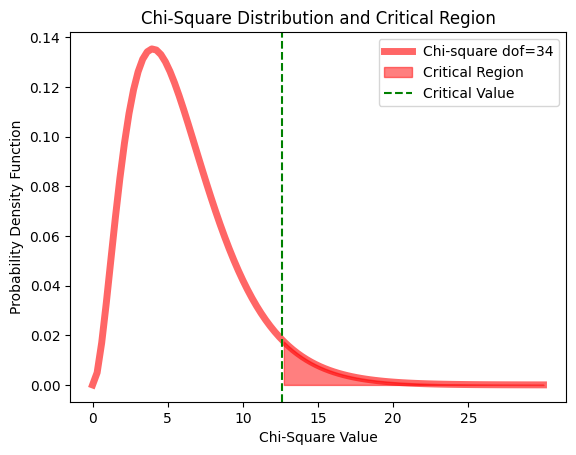

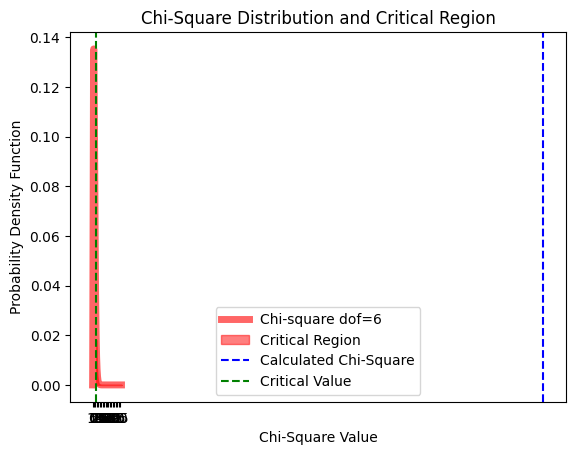

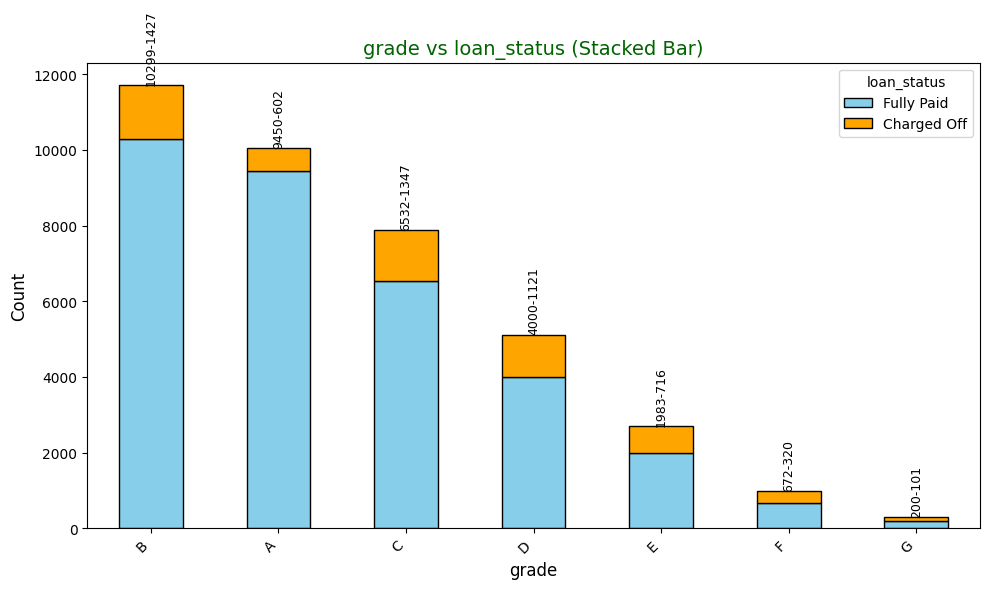

In [53]:
# GRADE vs loan_status

bivariate_cat_metrics('grade', 30, 100, 100, 2000, 34, 6)
stacked_bar_cat_binary_sorted(loan_data, 'grade', 'loan_status')


Observations

1. P-val is 0 and Chi^2 is very large compared to the critical value of 13.

2. So, there is strong evidence against the NUll Hypothesis => Grade and loan_status have different means.

3. Two plots were drawn to be able to see a good curve and also the critcial value & calculated Chi^2 values

4. The informative barplot of the grade vs loan_status:

    a) It's a sorted plot in the descending order of the counts of each delinq_2yrs bin.

    b) Ranges of bins are x-ticks

    c) Bin counts are displayed above each bar with defaults and paid-off portions giving more specific details.

loan_status  Charged Off  Fully Paid
sub_grade                           
A1                    30        1109
A2                    74        1434
A3                   103        1707
A4                   178        2696
A5                   217        2504
B1                   171        1629
B2                   228        1780
B3                   343        2503
B4                   329        2118
B5                   356        2269
C1                   336        1730
C2                   321        1619
C3                   270        1226
C4                   212        1003
C5                   208         954
D1                   167         764
D2                   271        1024
D3                   257         870
D4                   215         713
D5                   211         629
E1                   198         531
E2                   163         456
E3                   120         405
E4                   126         304
E5                   109         287
F

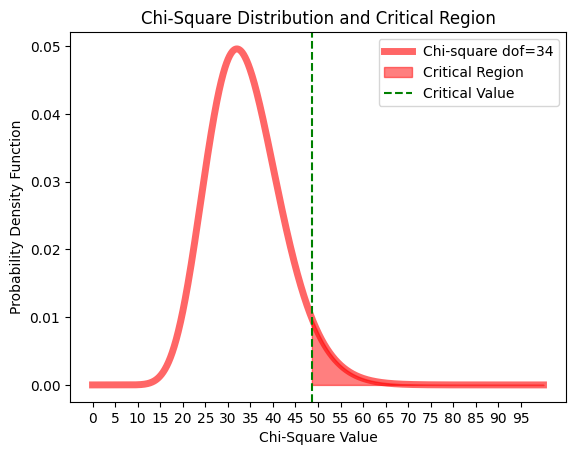

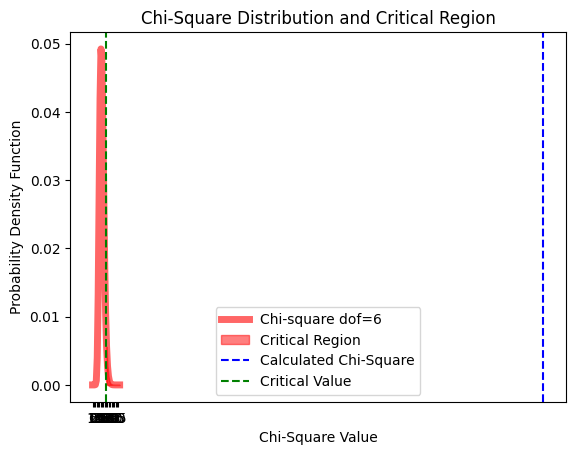

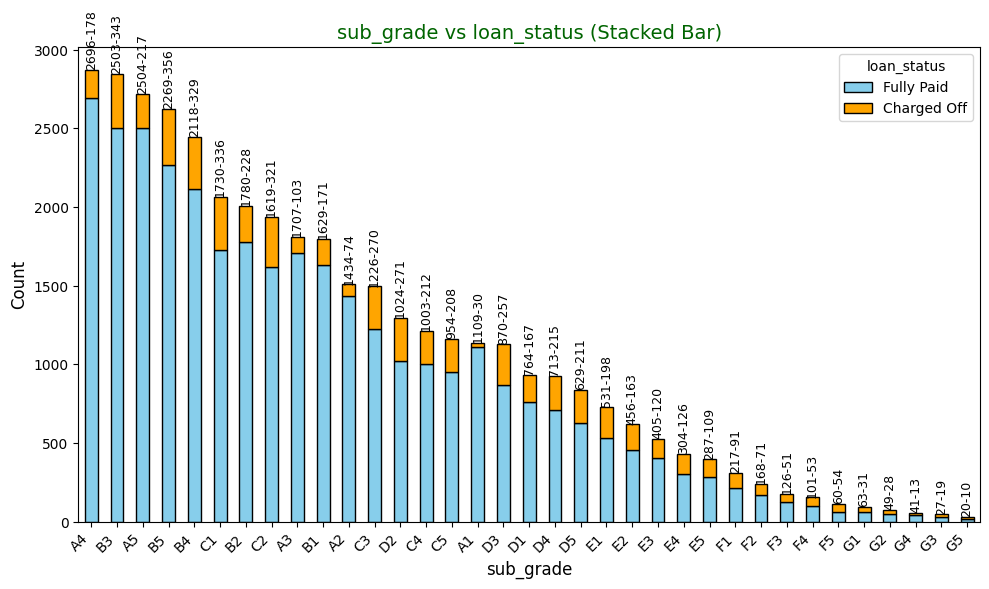

In [54]:
# let's do dthe same for sub_grade now
# sub_grade

bivariate_cat_metrics('sub_grade', 100, 2000, 100, 30, 34, 6)
stacked_bar_cat_binary_sorted(loan_data, 'sub_grade', 'loan_status')


Observations

Sub-grade also has the same Chi^2 metrics and hence the same observations.

THe barplot is much more granular as sub-grade is nothing but an underlying property of Grade.


loan_status         Charged Off  Fully Paid
purpose                                    
car                         160        1352
credit_card                 543        4499
debt_consolidation         2772       15373
educational                  56         269
home_improvement            347        2555
house                        59         310
major_purchase              222        1939
medical                     106         576
moving                       92         486
other                       633        3247
renewable_energy             19          83
small_business              476        1290
vacation                     53         323
wedding                      96         834


 Chi-square: 379.6271580064625 
 P-value: 4.4595499548463123e-73 
 Degrees of freedom: 13 

Critical value:  22.362032494826934


 Visualization



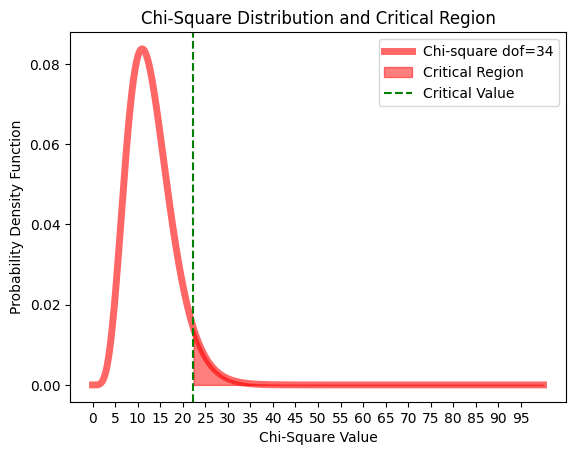

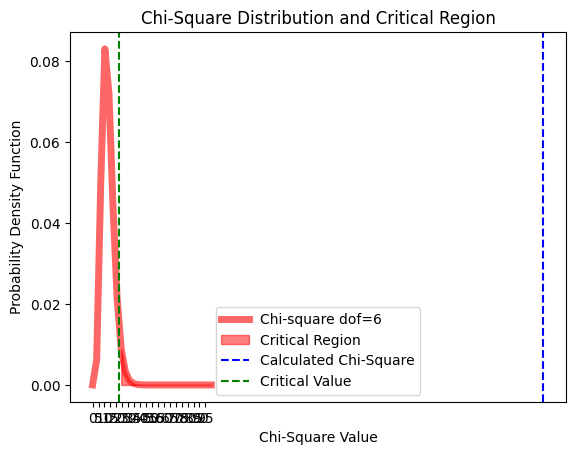

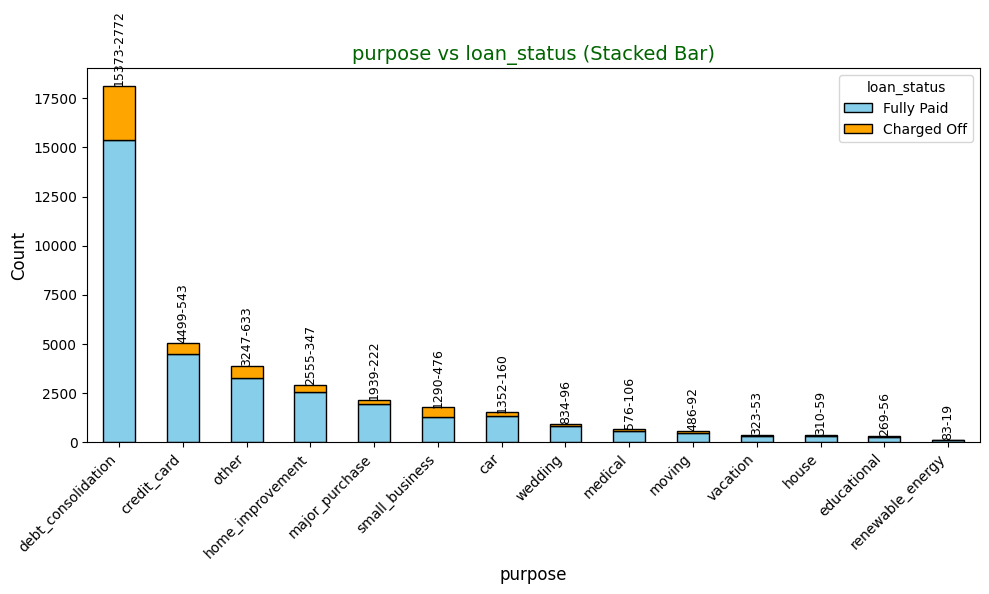

In [55]:
# let's repeat this for 'purpose'
## Purpose

bivariate_cat_metrics('purpose', 100, 2000, 100, 30, 34, 6)

# basic count plot of garde frequencies vis-a-vis status
stacked_bar_cat_binary_sorted(loan_data, 'purpose', 'loan_status')


Observations

1. P-val is 0 and Chi^2 380 is large compared to the critical value of 13.

2. So, there is strong evidence against the NUll Hypothesis => Grade and loan_status have different means.

3. Two plots were drawn to be able to see a good curve and also the critcial value & calculated Chi^2 values

4. The informative barplot of the purpose vs loan_status:

    a) It's a sorted plot in the descending order of the counts of each purpose bin.

    b) Ranges of bins are x-ticks

    c) Bin counts are displayed above each bar with defaults and paid-off portions giving more specific details.

    d) From univaritate analysis as well as above barplot, debt_consolidation stands out and also has very large frequency - it's an outlier!

#### Pre-ML Data Pre-Processing

Before building the machine learning model, we shall perform
- encoding on all the categorical variables
- handle class imbalance
- train-test split
- scaling

##### Encoding variables

In [56]:
#
# No new code is added to for this section for the following reason:
# We already have a copy of loan_data, i.e., loan_data_copy, which was built for imputation of missing values,
# and is already in pre-processed state.
# So, we keep the original loan_data untouched and use the copy for further msnipultions.
#


**Handling Class Imbalance**

Suggestion - Perform SMOTE here

In [57]:
display(HTML(f"<h2 style='color:orange;'>SMOTE: Handling Class Imbalance</h2>"))

# there is 6:1 class-imbalance between fully-paid and defaulted categories
# Let's use following methods to make them balanced
# 1. SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Copy the imbalanced dataset into ld_cp
ld_cp = loan_data_copy.copy()

y = ld_cp.loan_status
ld_cp.drop('loan_status', axis=1, inplace=True)



Observations

1. Just to be careful, keeping loan_data_copy that has all the updated  pre-processed data. Using a copy of it in ld_cp and modifying it for SMOTEing.

2. Need to drop target variable from the dataset before SMOTEing so that the sythetic data generated would not be influenced by the target data.

In [58]:
# Let's first build the mask for the encoded categorical features as we
# are not supposed to scale these as their meaning could be lost

import re
print(num_mask)
print(loan_data_copy.columns)
ldc_cols = loan_data_copy.columns
print(loan_data.select_dtypes(include = 'object').columns)
ld_obj_cols = loan_data.select_dtypes(include = 'object').columns
cat_mask = []
for col in loan_data.select_dtypes(include = 'object').columns:
    patt = re.compile(rf'^{col}.*')
    for m in ldc_cols:
       if patt.match(m):
          cat_mask.append(m)
cat_mask.remove('loan_status')
print(cat_mask)

scale_mask = list(set(num_mask) - set(cat_mask))
print(num_mask)
print(scale_mask)

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc'],
      dtype='object')
Index(['loan_amnt', 'term', 'int_rate', 'emp_length',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'annual_inc',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'loan_status'],
      dtype='obj

Observations:

1. Used original loan_data dataset which had all the categorical columns un-encoded to build a mask of those features.

2. Removed target feature from cat_mask.

3. Removed any common features, if any, between from num_mask using this.
   (But, there are none)

In [59]:
## Write code
# apply smote for class imbalance
from re import X
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

over_sample = SMOTENC(categorical_features = cat_mask, random_state=42)
# fit and apply the transform
ld_cp_res, y_res = over_sample.fit_resample(ld_cp, y)
y_res.value_counts()

loan_status
0    33136
1    33136
Name: count, dtype: int64

Observations

Used cat_mask in SMOTENC() to oversample the dataset to handle class imbalance.
As can be seen, both classes have equal number of rows now: 33136.

**Train-test split**

Now that we have handled class imbalance, let's perform the train-test split. We have to do a few additional imports

In [60]:
# Splitting our dataset between training and testing set
from sklearn.model_selection import train_test_split

# Example: Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(ld_cp_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

print("X-train:", X_train.shape)
print("X-test:", X_test.shape)
print("y-train:", y_train.shape)
print("y-test:", y_test.shape)


X-train: (53017, 34)
X-test: (13255, 34)
y-train: (53017,)
y-test: (13255,)


Observation:

train-test-split split the database int to 80:20 ratio

**Scaling**

In [61]:
from sklearn.preprocessing import MinMaxScaler
# Write code for MinMax Scaler
# Let's not scale encoded categorical features

scaler = MinMaxScaler()

print(GRNBLD, "Before MinMax scaling\n", CLEAN, X_train.head())

X_train[num_mask] = scaler.fit_transform(X_train[num_mask])
X_test[num_mask] = scaler.transform(X_test[num_mask])

print(GRNBLD, "After MinMax scaling\n", CLEAN, X_train.head())


 Before MinMax scaling
            loan_amnt     term   int_rate  emp_length  home_ownership_MORTGAGE  \
58050   8629.851258  46.6974  12.996915     2.67435                      0.0   
37179  20000.000000  36.0000  10.510000     5.00000                      1.0   
31972   8000.000000  36.0000  11.140000     0.00000                      1.0   
9006   14000.000000  60.0000  18.390000     9.00000                      0.0   
34666   7200.000000  36.0000  13.220000     1.00000                      0.0   

       home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
58050                  0.0                   0.0                 0.0   
37179                  0.0                   0.0                 0.0   
31972                  0.0                   0.0                 0.0   
9006                   0.0                   0.0                 1.0   
34666                  0.0                   0.0                 0.0   

          annual_inc  verification_status_Not Verified  \
580

Observations

1. Used minmaxscaler() to bind the range in [0,1]

2. Did it, of course, for only numerical features

3. Chose minmax over standard as we had seen in univariate analysis that all features are not even approximately Gaussian.

4. Yes, many feature have outliers which is not good for minmax; one thing that I could done is to remove the rows that are too much outside, in certain features. Will do so, later, if the results are not good in the end.

In [62]:
X_train.head()

loan_amnt      term  int_rate  emp_length  home_ownership_MORTGAGE  \
58050   0.235648  0.445725  0.395249    0.243123                      0.0   
37179   0.565217  0.000000  0.265519    0.454545                      1.0   
31972   0.217391  0.000000  0.298383    0.000000                      1.0   
9006    0.391304  1.000000  0.676578    0.818182                      0.0   
34666   0.194203  0.000000  0.406886    0.090909                      0.0   

       home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
58050                  0.0                   0.0                 0.0   
37179                  0.0                   0.0                 0.0   
31972                  0.0                   0.0                 0.0   
9006                   0.0                   0.0                 1.0   
34666                  0.0                   0.0                 0.0   

       annual_inc  verification_status_Not Verified  \
58050    0.003000                               0.0   
37179    0.024337                               0.0   
31972    0.008659                               1.0   
9006     0.020506                               0.0   
34666    0.005991                               1.0   

       verification_status_Source Verified  verification_status_Verified  \
58050                                  0.0                           0.0   
37179                                  1.0                           0.0   
31972                                  0.0                           0.0   
9006                                   0.0                           1.0   
34666                                  0.0                           0.0   

       purpose_car  purpose_credit_card  purpose_debt_consolidation  \
58050          0.0                  0.0                         1.0   
37179          0.0                  0.0                         0.0   
31972          0.0                  1.0                         0.0   
9006           0.0                  0.0                         1.0   
34666          0.0                  0.0                         1.0   

       purpose_educational  purpose_home_improvement  purpose_house  \
58050                  0.0                       0.0            0.0   
37179                  0.0                       1.0            0.0   
31972                  0.0                       0.0            0.0   
9006                   0.0                       0.0            0.0   
34666                  0.0                       0.0            0.0   

       purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
58050                     0.0              0.0             0.0            0.0   
37179                     0.0              0.0             0.0            0.0   
31972                     0.0              0.0             0.0            0.0   
9006                      0.0              0.0             0.0            0.0   
34666                     0.0              0.0             0.0            0.0   

       purpose_renewable_energy  purpose_small_business  purpose_vacation  \
58050                       0.0                     0.0               0.0   
37179                       0.0                     0.0               0.0   
31972                       0.0                     0.0               0.0   
9006                        0.0                     0.0               0.0   
34666                       0.0                     0.0               0.0   

       purpose_wedding       dti  delinq_2yrs  inq_last_6mths  open_acc  \
58050              0.0  0.619832          0.0        0.263569  0.105851   
37179              0.0  0.097366          0.0        0.000000  0.166667   
31972              0.0  0.685895          0.0        0.125000  0.119048   
9006               0.0  0.706569          0.0        0.125000  0.261905   
34666              0.0  0.759253          0.0        0.125000  0.142857   

       pub_rec  revol_bal  revol_util  total_acc  
58050      0.0   

### Model Building and Model Evaluation

- Your task is to build at least 3 models and evaluate their performance
- Start with a baseline model such as logistic regression
- Build additional models like decision trees, random forests, XGboost, etc.
- Make sure you're checking for overfitting and underfitting
- Use cross-validation and hyperparamater tuning to fit the best models
- Evaluate each of the model using metrics such as accuracy, precision, recall, ROC-AUC score, etc.
- Select the best possible model that you will be using for classfication

Let's start off with the simplest model - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as ac
X_train_scaled = X_train
X_test_scaled = X_test

In [63]:
#
# Utility routine to
# 1. plot learning curve of the model
# 2. plot ROC-AUC curve
# 3. print accuracy scores
#

def model_prediction_metrics(model, X, y, X_train, X_test, y_train, y_test, X_test_scaled, y_train_pred, y_test_pred, title):

    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    from sklearn.metrics import roc_curve, roc_auc_score
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import StratifiedKFold, cross_val_score

    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_test_scaled, y_test_pred, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Take the mean accuracy across folds
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # 1. Plot
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Training accuracy", color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

    plt.plot(train_sizes, test_mean, label="Validation accuracy", color='orange')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')

    plt.title(f"Learning Curve - {title}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

    # 2. Accuracy metrics
    display(HTML("<h3 style='color:green;'>Accuracy metrics</h3>"))

    # Define stratified k-fold cross-validator
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    print(GRNBLD, "\n(CV) cross_val_score with StratifiedKFold",
          CLEAN, "\nMEAN: ", scores.mean(), "\nSTD: ", scores.std())

    train_accuracy_value = ac(y_train, y_train_pred)
    test_accuracy_value = ac(y_test, y_test_pred)

    # Print the accuracies
    print(GRNBLD, "\n\nOverall model accuracy\n", CLEAN)
    print(f"Training Accuracy: {train_accuracy_value:.4f}")
    print(f"Test Accuracy: {test_accuracy_value:.4f}")

    print(classification_report(y_test, y_test_pred, output_dict=True))
    accuracy_score = ac(y_test, y_test_pred)
    print("Accuracy:", accuracy_score)

    # ROC-AUC
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    print("ROC-AUC Score:", roc_auc)

    # Plot ROC-AUC curve of class 1 for visualization

    # Predict probabilities (for ROC, use probabilities, not labels)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # probability of positive class

    # 3. ROC Curve
    display(HTML("<h3 style='color:green;'>ROC Curve</h3>"))

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Plot
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random guess")  # diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # 4. Confusion matrix
    display(HTML("<h3 style='color:green;'>Confusion Matrix</h3>"))

    ## Plot the Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

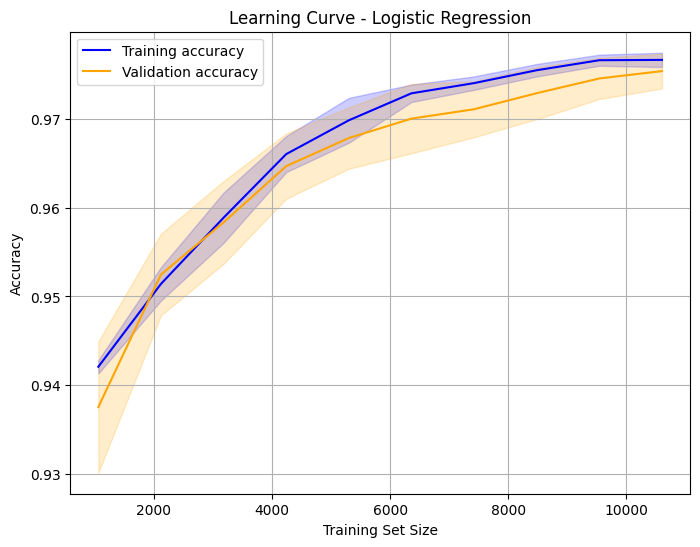

 
(CV) cross_val_score with StratifiedKFold  
MEAN:  0.6426996244402592 
STD:  0.0127259420082011
 

Overall model accuracy
 
Training Accuracy: 0.7952
Test Accuracy: 0.7952
{'0': {'precision': 0.7576715395759251, 'recall': 0.8679843089921545, 'f1-score': 0.8090851557555727, 'support': 6628.0}, '1': {'precision': 0.8454609678558813, 'recall': 0.722347970424023, 'f1-score': 0.7790707136463504, 'support': 6627.0}, 'accuracy': 0.7951716333459072, 'macro avg': {'precision': 0.8015662537159032, 'recall': 0.7951661397080887, 'f1-score': 0.7940779347009616, 'support': 13255.0}, 'weighted avg': {'precision': 0.8015629421569338, 'recall': 0.7951716333459072, 'f1-score': 0.7940790668941757, 'support': 13255.0}}
Accuracy: 0.7951716333459072
ROC-AUC Score: 0.8852896368880656


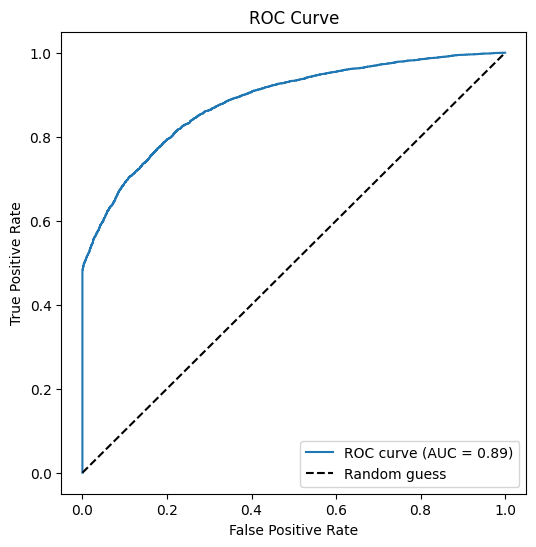

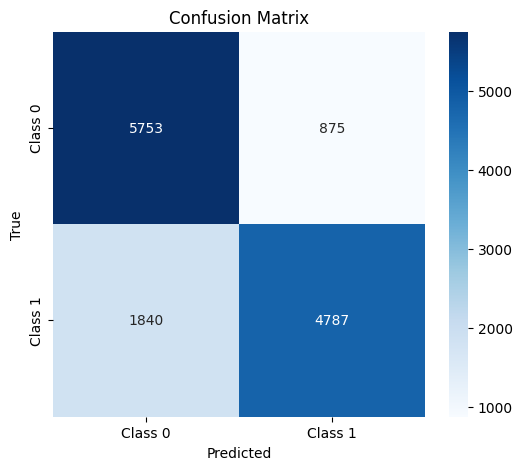

"\nClass-weights = None\n\nTraining Accuracy: 0.7957\nTest Accuracy: 0.7933\n              precision    recall  f1-score   support\n\n           0       0.76      0.86      0.81      6569\n           1       0.84      0.73      0.78      6686\n\n    accuracy                           0.79     13255\n   macro avg       0.80      0.79      0.79     13255\nweighted avg       0.80      0.79      0.79     13255\n\nAccuracy: 0.7932855526216522\nROC-AUC Score: 0.8843327329887791\n---\nClass-weights = 'balanced'\n\nTraining Accuracy: 0.7957\nTest Accuracy: 0.7937\n              precision    recall  f1-score   support\n\n           0       0.76      0.86      0.81      6569\n           1       0.84      0.73      0.78      6686\n\n    accuracy                           0.79     13255\n   macro avg       0.80      0.79      0.79     13255\nweighted avg       0.80      0.79      0.79     13255\n\nAccuracy: 0.7936627687665032\nROC-AUC Score: 0.8841672970884055\n"

In [64]:
display(HTML("<h2 style='color:blue;'>LogisticRegression</h2>"))

from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as ac
X_train_scaled = X_train
X_test_scaled = X_test

model = LogisticRegression(random_state=42, max_iter=1000)

## Class weight balancing is not required since we have SMOTEd the target variable already
#model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

model_prediction_metrics(model, ld_cp_res, y_res, X_train, X_test, y_train, y_test, X_test_scaled, y_train_pred, y_test_pred, "Logistic Regression")

#---- OUTPUT ----
'''
Class-weights = None

Training Accuracy: 0.7957
Test Accuracy: 0.7933
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      6569
           1       0.84      0.73      0.78      6686

    accuracy                           0.79     13255
   macro avg       0.80      0.79      0.79     13255
weighted avg       0.80      0.79      0.79     13255

Accuracy: 0.7932855526216522
ROC-AUC Score: 0.8843327329887791
---
Class-weights = 'balanced'

Training Accuracy: 0.7957
Test Accuracy: 0.7937
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      6569
           1       0.84      0.73      0.78      6686

    accuracy                           0.79     13255
   macro avg       0.80      0.79      0.79     13255
weighted avg       0.80      0.79      0.79     13255

Accuracy: 0.7936627687665032
ROC-AUC Score: 0.8841672970884055
'''


Observations:

# 0. LogisticRegression is a simple and faster classification model.
# 1. Tried with class_weight balance set to true:
# The class weight balance hyper parameter did not add much value because the target class is already SMOTED well.
# There is, however, a little closeness in the both curves in the 2000-4000 range for balanced class weights.
# 2. Learning Curve
# The testing curve is away from the training curve at smaller dataset sizes while they are much closer at higher sizes.
# 3. Accuracy metrics
# Accuracy fell below 80% for both training and test, but very close to it.
# Precision/Recall/F1scores all stayed between the 75%-84% range for both classes together.
# 4. Precision and Recall for both classes improved dramatically after SMOTEing.
#    During imputation these numbers were not good for Class 1.

              precision    recall  f1-score   support

           0       0.79      0.96      0.86      6628
           1       0.95      0.74      0.83      6627

    accuracy                           0.85     13255
   macro avg       0.87      0.85      0.85     13255
weighted avg       0.87      0.85      0.85     13255

ROC-AUC:  0.8485772596496529
Confusion Matrix: 
 [[6343  285]
 [1722 4905]]
 Proba  (13255, 2)
 Proba 
(13255, 2)
[1 0 0 ... 0 1 0]
[[0.         1.        ]
 [0.79661017 0.20338983]
 [0.51020408 0.48979592]
 ...
 [0.87387387 0.12612613]
 [0.         1.        ]
 [0.5338843  0.4661157 ]]
 HIGH 
0.5
0.5
0.9428899961671139
{'0': {'precision': 0.7876073161627473, 'recall': 0.9550392275196138, 'f1-score': 0.8632799181725196, 'support': 6628.0}, '1': {'precision': 0.9428899961671139, 'recall': 0.7424173834314169, 'f1-score': 0.8307302659349937, 'support': 6627.0}, 'accuracy': 0.8487363259147491, 'macro avg': {'precision': 0.8652486561649306, 'recall': 0.8487283054755154,

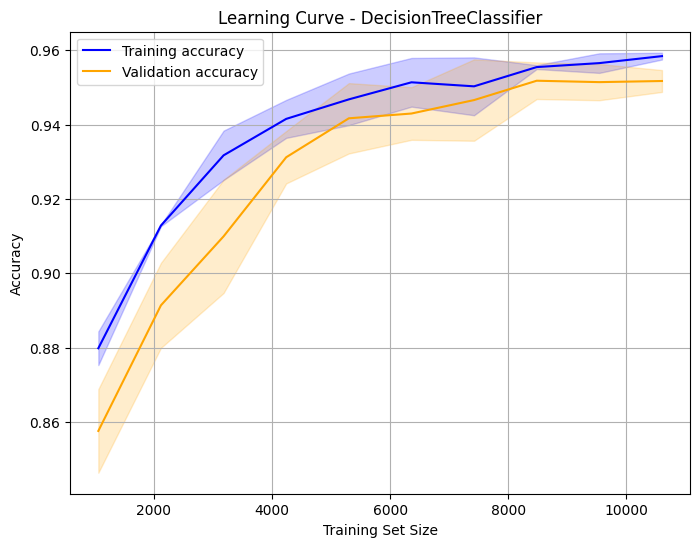

 
(CV) cross_val_score with StratifiedKFold  
MEAN:  0.8502685042392276 
STD:  0.0029452706993166626
 

Overall model accuracy
 
Training Accuracy: 0.8573
Test Accuracy: 0.8486
{'0': {'precision': 0.7864848109113454, 'recall': 0.9570006035003018, 'f1-score': 0.8634043422037705, 'support': 6628.0}, '1': {'precision': 0.9450867052023122, 'recall': 0.740153915799004, 'f1-score': 0.8301599390708302, 'support': 6627.0}, 'accuracy': 0.8485854394568088, 'macro avg': {'precision': 0.8657857580568288, 'recall': 0.8485772596496529, 'f1-score': 0.8467821406373004, 'support': 13255.0}, 'weighted avg': {'precision': 0.8657797753373158, 'recall': 0.8485854394568088, 'f1-score': 0.8467833946698592, 'support': 13255.0}}
Accuracy: 0.8485854394568088
ROC-AUC Score: 0.9155552521510227


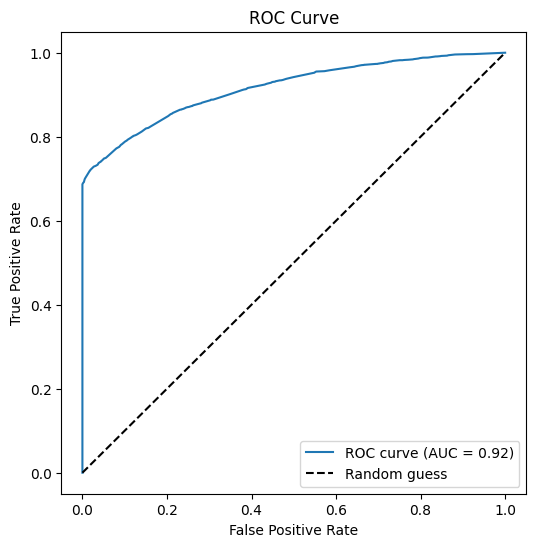

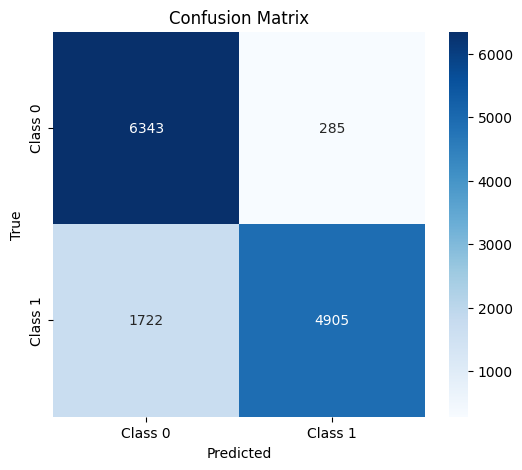

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      6628
           1       0.94      0.74      0.83      6627

    accuracy                           0.84     13255
   macro avg       0.86      0.84      0.84     13255
weighted avg       0.86      0.84      0.84     13255

ROC-AUC:  0.8449559049549406
Confusion Matrix: 
 [[6326  302]
 [1753 4874]]
 Proba  (13255, 2)
 Proba 
(13255, 2)
[1 0 1 ... 0 1 0]
[[0.         1.        ]
 [0.64615385 0.35384615]
 [0.33727811 0.66272189]
 ...
 [0.87387387 0.12612613]
 [0.         1.        ]
 [0.5338843  0.4661157 ]]
 HIGH 
0.5
0.5
0.9416537867078826
{'0': {'precision': 0.783017700210422, 'recall': 0.9544357272178636, 'f1-score': 0.860270619432923, 'support': 6628.0}, '1': {'precision': 0.9416537867078826, 'recall': 0.7354760826920175, 'f1-score': 0.8258917224434466, 'support': 6627.0}, 'accuracy': 0.8449641644662391, 'macro avg': {'precision': 0.8623357434591523, 'recall': 0.8449559049549406, '

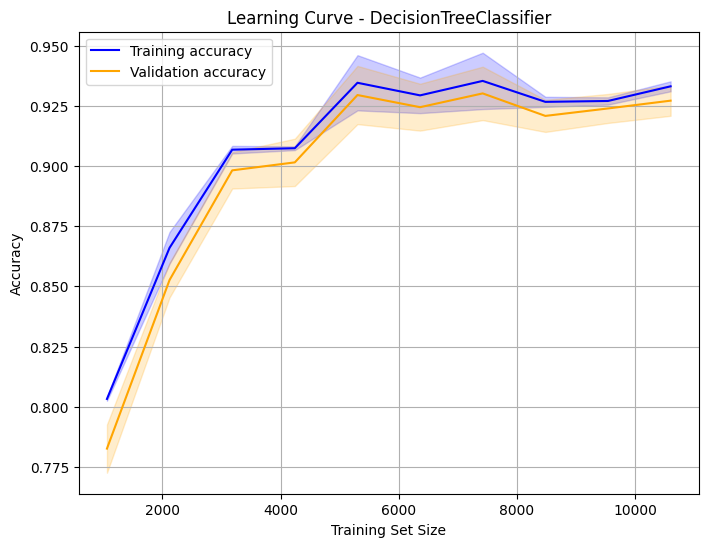

 
(CV) cross_val_score with StratifiedKFold  
MEAN:  0.8458020533376912 
STD:  0.003011547512853988
 

Overall model accuracy
 
Training Accuracy: 0.8512
Test Accuracy: 0.8450
{'0': {'precision': 0.783017700210422, 'recall': 0.9544357272178636, 'f1-score': 0.860270619432923, 'support': 6628.0}, '1': {'precision': 0.9416537867078826, 'recall': 0.7354760826920175, 'f1-score': 0.8258917224434466, 'support': 6627.0}, 'accuracy': 0.8449641644662391, 'macro avg': {'precision': 0.8623357434591523, 'recall': 0.8449559049549406, 'f1-score': 0.8430811709381848, 'support': 13255.0}, 'weighted avg': {'precision': 0.862329759449854, 'recall': 0.8449641644662391, 'f1-score': 0.8430824677656835, 'support': 13255.0}}
Accuracy: 0.8449641644662391
ROC-AUC Score: 0.9134404626052471


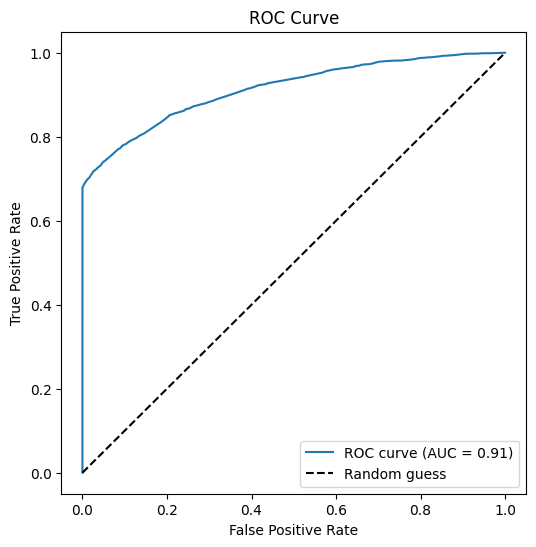

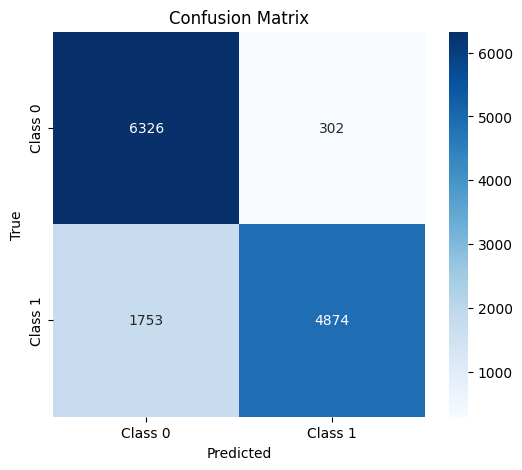

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      6628
           1       0.94      0.72      0.82      6627

    accuracy                           0.84     13255
   macro avg       0.86      0.84      0.84     13255
weighted avg       0.86      0.84      0.84     13255

ROC-AUC:  0.8385426442128492
Confusion Matrix: 
 [[6335  293]
 [1847 4780]]
 Proba  (13255, 2)
 Proba 
(13255, 2)
[1 0 1 ... 0 1 0]
[[0.         1.        ]
 [0.52281369 0.47718631]
 [0.37530266 0.62469734]
 ...
 [0.91666667 0.08333333]
 [0.         1.        ]
 [0.7544784  0.2455216 ]]
 HIGH 
0.5
0.49
0.9422432485708654
{'0': {'precision': 0.7742605719872891, 'recall': 0.9557936028968015, 'f1-score': 0.8555030384875084, 'support': 6628.0}, '1': {'precision': 0.9422432485708654, 'recall': 0.7212916855288969, 'f1-score': 0.8170940170940171, 'support': 6627.0}, 'accuracy': 0.8385514900037722, 'macro avg': {'precision': 0.8582519102790773, 'recall': 0.8385426442128492

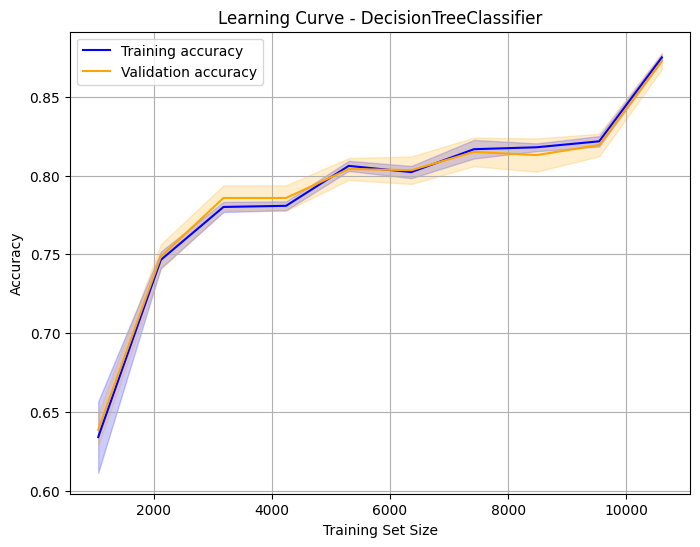

 
(CV) cross_val_score with StratifiedKFold  
MEAN:  0.8377896875697461 
STD:  0.0013093229171587772
 

Overall model accuracy
 
Training Accuracy: 0.8398
Test Accuracy: 0.8386
{'0': {'precision': 0.7742605719872891, 'recall': 0.9557936028968015, 'f1-score': 0.8555030384875084, 'support': 6628.0}, '1': {'precision': 0.9422432485708654, 'recall': 0.7212916855288969, 'f1-score': 0.8170940170940171, 'support': 6627.0}, 'accuracy': 0.8385514900037722, 'macro avg': {'precision': 0.8582519102790773, 'recall': 0.8385426442128492, 'f1-score': 0.8362985277907627, 'support': 13255.0}, 'weighted avg': {'precision': 0.8582455737013109, 'recall': 0.8385514900037722, 'f1-score': 0.8362999766410605, 'support': 13255.0}}
Accuracy: 0.8385514900037722
ROC-AUC Score: 0.9058042190198853


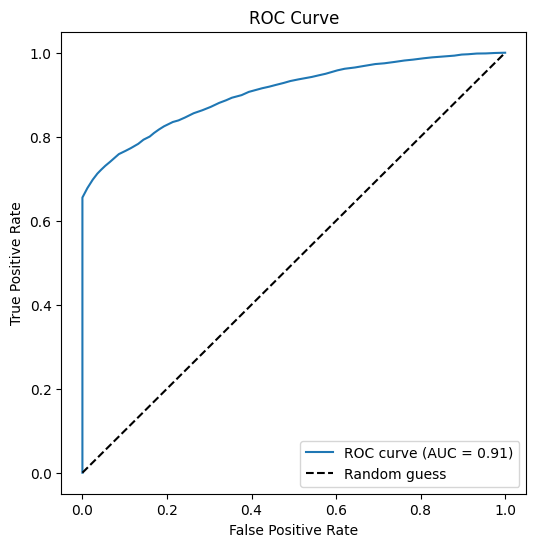

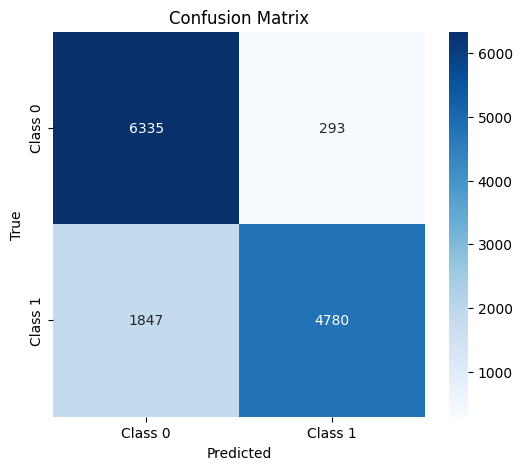

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      6628
           1       0.93      0.72      0.81      6627

    accuracy                           0.83     13255
   macro avg       0.85      0.83      0.83     13255
weighted avg       0.85      0.83      0.83     13255

ROC-AUC:  0.8345447051477111
Confusion Matrix: 
 [[6260  368]
 [1825 4802]]
 Proba  (13255, 2)
 Proba 
(13255, 2)
[1 1 1 ... 0 1 0]
[[0.         1.        ]
 [0.4910148  0.5089852 ]
 [0.4910148  0.5089852 ]
 ...
 [0.88049536 0.11950464]
 [0.         1.        ]
 [0.78932316 0.21067684]]
 HIGH 
0.5
0.49
0.9288201160541586
{'0': {'precision': 0.7742733457019171, 'recall': 0.9444779722389861, 'f1-score': 0.8509481410997077, 'support': 6628.0}, '1': {'precision': 0.9288201160541586, 'recall': 0.7246114380564358, 'f1-score': 0.814105281003645, 'support': 6627.0}, 'accuracy': 0.8345529988683515, 'macro avg': {'precision': 0.8515467308780378, 'recall': 0.834544705147711, 

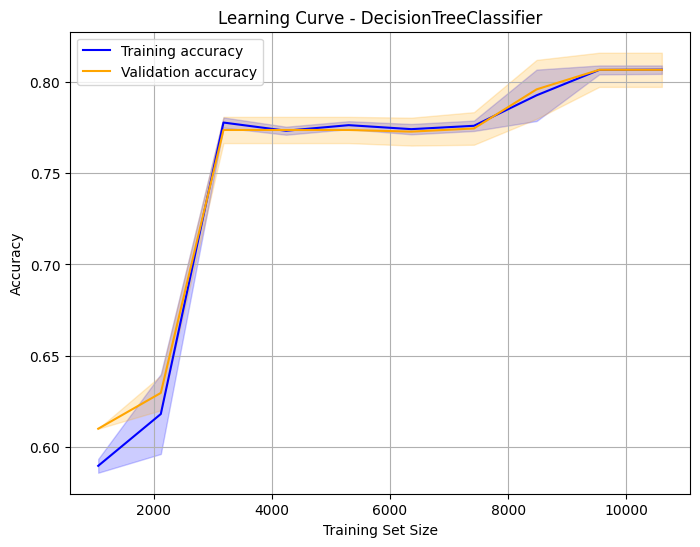

 
(CV) cross_val_score with StratifiedKFold  
MEAN:  0.8342738691669602 
STD:  0.0017259192016988185
 

Overall model accuracy
 
Training Accuracy: 0.8351
Test Accuracy: 0.8346
{'0': {'precision': 0.7742733457019171, 'recall': 0.9444779722389861, 'f1-score': 0.8509481410997077, 'support': 6628.0}, '1': {'precision': 0.9288201160541586, 'recall': 0.7246114380564358, 'f1-score': 0.814105281003645, 'support': 6627.0}, 'accuracy': 0.8345529988683515, 'macro avg': {'precision': 0.8515467308780378, 'recall': 0.834544705147711, 'f1-score': 0.8325267110516763, 'support': 13255.0}, 'weighted avg': {'precision': 0.8515409011243465, 'recall': 0.8345529988683515, 'f1-score': 0.8325281008238414, 'support': 13255.0}}
Accuracy: 0.8345529988683515
ROC-AUC Score: 0.8993621469894333


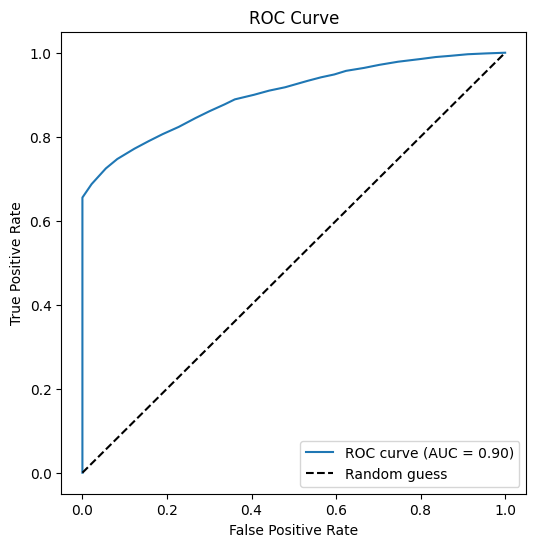

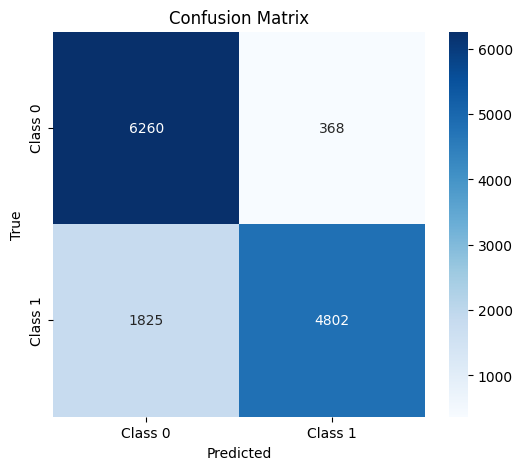

              precision    recall  f1-score   support

           0       0.74      0.88      0.80      6628
           1       0.85      0.68      0.76      6627

    accuracy                           0.78     13255
   macro avg       0.79      0.78      0.78     13255
weighted avg       0.79      0.78      0.78     13255

ROC-AUC:  0.7799249112484825
Confusion Matrix: 
 [[5801  827]
 [2090 4537]]
 Proba  (13255, 2)
 Proba 
(13255, 2)
[1 0 0 ... 0 1 0]
[[0.44753946 0.55246054]
 [0.72005772 0.27994228]
 [0.53620009 0.46379991]
 ...
 [0.58471761 0.41528239]
 [0.         1.        ]
 [0.82990982 0.17009018]]
 HIGH 
0.5
0.48000000000000004
0.8458240119313944
{'0': {'precision': 0.7351413002154353, 'recall': 0.8752263126131563, 'f1-score': 0.7990908464770301, 'support': 6628.0}, '1': {'precision': 0.8458240119313944, 'recall': 0.6846235098838087, 'f1-score': 0.756734217329664, 'support': 6627.0}, 'accuracy': 0.7799321010939269, 'macro avg': {'precision': 0.7904826560734148, 'recall': 0.77

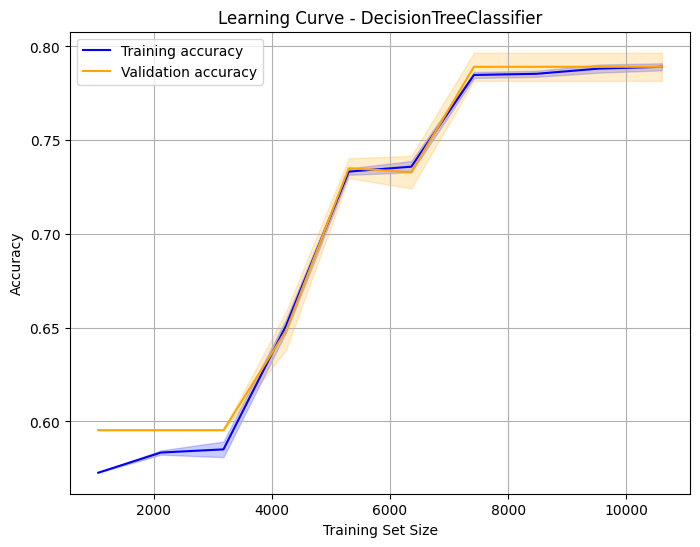

 
(CV) cross_val_score with StratifiedKFold  
MEAN:  0.7806917371107998 
STD:  0.0032152613433755117
 

Overall model accuracy
 
Training Accuracy: 0.7819
Test Accuracy: 0.7799
{'0': {'precision': 0.7351413002154353, 'recall': 0.8752263126131563, 'f1-score': 0.7990908464770301, 'support': 6628.0}, '1': {'precision': 0.8458240119313944, 'recall': 0.6846235098838087, 'f1-score': 0.756734217329664, 'support': 6627.0}, 'accuracy': 0.7799321010939269, 'macro avg': {'precision': 0.7904826560734148, 'recall': 0.7799249112484825, 'f1-score': 0.7779125319033471, 'support': 13255.0}, 'weighted avg': {'precision': 0.7904784809428334, 'recall': 0.7799321010939269, 'f1-score': 0.7779141296637826, 'support': 13255.0}}
Accuracy: 0.7799321010939269
ROC-AUC Score: 0.8616869536384821


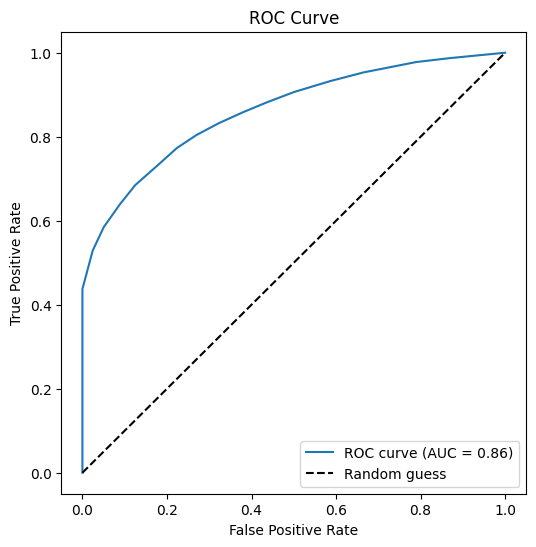

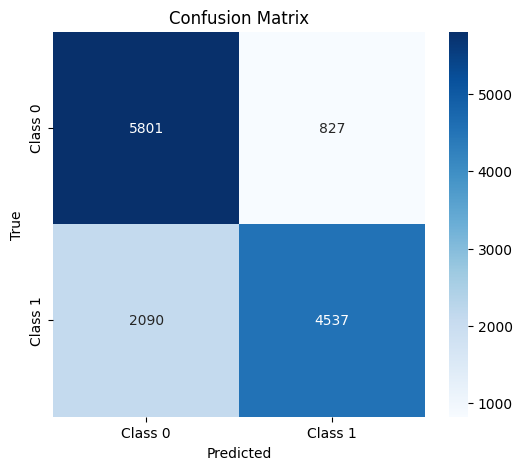

In [65]:

display(HTML("<h2 style='color:green;'>DecisionTreeClassifier</h2>"))

from sklearn.tree import DecisionTreeClassifier
X_train_scaled = X_train
X_test_scaled = X_test

for msl in 50,100,500,1000,2000:
  display(HTML(f"<h3 style='color:green;'>min_samples_leaf {msl}</h3>"))
  dclf = DecisionTreeClassifier(random_state=42,
                                min_samples_leaf=msl,
                                min_samples_split=msl+1,
                                max_depth=10)
  dclf.fit(X_train_scaled, y_train)
  y_pred = dclf.predict(X_test_scaled)
  print(classification_report(y_test, y_pred))
  print("ROC-AUC: ", roc_auc_score(y_test, y_pred))
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

  y_pred_proba = dclf.predict_proba(X_test_scaled)
  print(GRNBLD, "Proba", CLEAN, y_pred_proba.shape)
  loan_print_stats(y_pred_proba, y_test, y_pred)

  y_train_pred = dclf.predict(X_train_scaled)
  y_test_pred = dclf.predict(X_test_scaled)

  model_prediction_metrics(dclf, ld_cp_res, y_res, X_train, X_test, y_train, y_test, X_test_scaled, y_train_pred, y_test_pred, "DecisionTreeClassifier")



# Observations
#
# DecisionTreeClassifier is tried with different min_samples_leaf hyper parameter.
# min_samples_leaf values of 100 & above gave good quality learning curves. The testing curve followed the testing curve very closely. This is an amazing thing to notice! This clearly means model is not overfitting; but, since, the curves are moving up in accuracy with training set size and stayed above 80, it is also not underfitting. It implies the model is a good FIT.
# For low min_samples_leaf (10), it is observed that the standard deviation bigger (wider light colored bands).
# AUC-ROC curve is bowing out towards top left with high AUC values (>90). It implies that the model is able to distinguish positives well, predict many +ves correctly, and very few -ves incorrectly.
# Almost all confusion matrices show more -ve (False) predictions for class 1. This requires post-processing methods like adjusting (lowering) thresholds for class 1.
# DecisionTreeClassifier is also much faster than other models and thus could be a good match when compute resource is less.

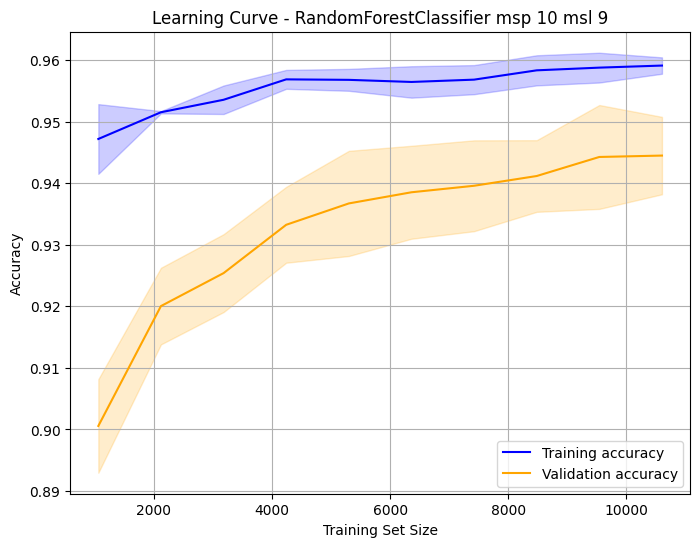

 
(CV) cross_val_score with StratifiedKFold  
MEAN:  0.8570739286153595 
STD:  0.0020239828745155703
 

Overall model accuracy
 
Training Accuracy: 0.8674
Test Accuracy: 0.8590
{'0': {'precision': 0.811086416525036, 'recall': 0.936028968014484, 'f1-score': 0.869090144988443, 'support': 6628.0}, '1': {'precision': 0.9243667499108098, 'recall': 0.7819526180775614, 'f1-score': 0.8472165454099567, 'support': 6627.0}, 'accuracy': 0.8589966050546963, 'macro avg': {'precision': 0.8677265832179228, 'recall': 0.8589907930460228, 'f1-score': 0.8581533451991998, 'support': 13255.0}, 'weighted avg': {'precision': 0.8677223101008582, 'recall': 0.8589966050546963, 'f1-score': 0.8581541703066905, 'support': 13255.0}}
Accuracy: 0.8589966050546963
ROC-AUC Score: 0.9249716827495353


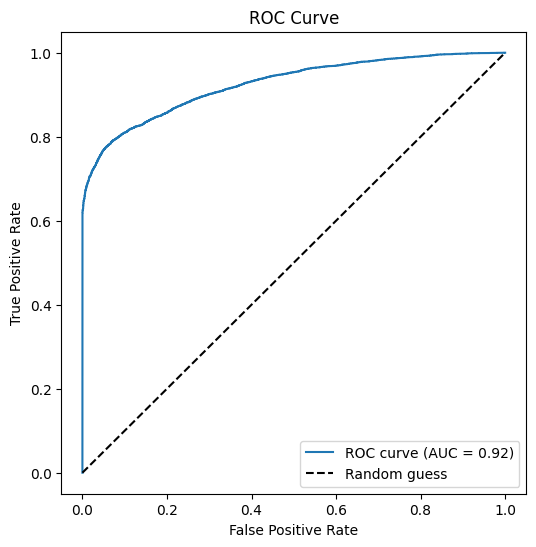

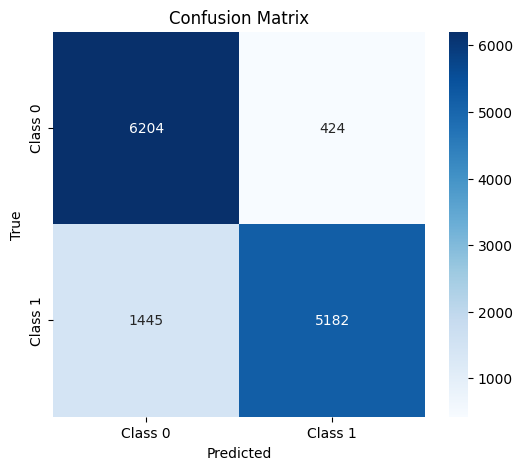

In [ ]:
## RandomForest
display(HTML("<h2 style='color:green;'>RandomForestClassifier</h2>"))

from sklearn.ensemble import RandomForestClassifier as RFC

X_train_scaled = X_train
X_test_scaled = X_test

rfc = RFC(n_estimators=100,
          random_state=42,
          max_features=10,
          max_depth=10,
          min_samples_split=10,
          min_samples_leaf=9
         )
rfc.fit(X_train_scaled, y_train)
y_train_pred = rfc.predict(X_train_scaled)
y_test_pred = rfc.predict(X_test_scaled)

model_prediction_metrics(rfc, ld_cp_res, y_res, X_train, X_test, y_train, y_test, X_test_scaled, y_train_pred, y_test_pred, "RandomForestClassifier msp 10 msl 9")


## Observations
# RFC has comparavle accuracy and AUC w.r.t. DecisionTreeClassifier.
# Started with lower (10 & 9) min_samples_split and leaf values.
# Further tests will be carried out with different values.

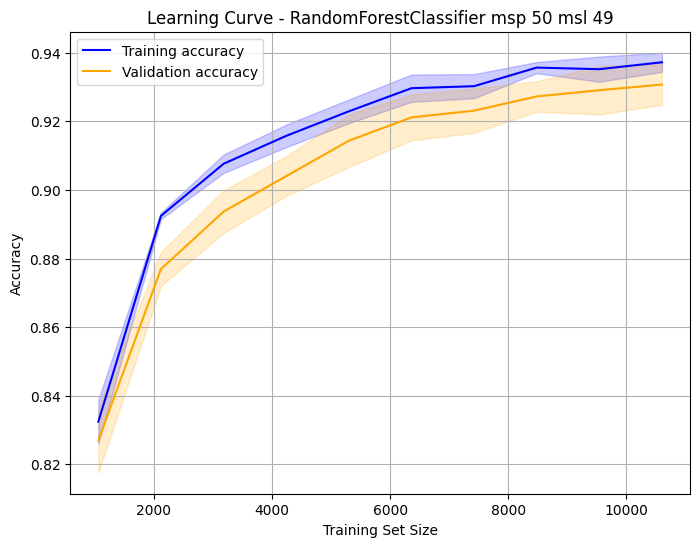

 
(CV) cross_val_score with StratifiedKFold  
MEAN:  0.8522302365236871 
STD:  0.0011007995897731303
 

Overall model accuracy
 
Training Accuracy: 0.8569
Test Accuracy: 0.8513
{'0': {'precision': 0.8052169353781623, 'recall': 0.9268255884127942, 'f1-score': 0.8617521217647471, 'support': 6628.0}, '1': {'precision': 0.9137931034482759, 'recall': 0.7757658065489663, 'f1-score': 0.8391414347506733, 'support': 6627.0}, 'accuracy': 0.851301395699736, 'macro avg': {'precision': 0.8595050194132191, 'recall': 0.8512956974808803, 'f1-score': 0.8504467782577102, 'support': 13255.0}, 'weighted avg': {'precision': 0.8595009237448649, 'recall': 0.851301395699736, 'f1-score': 0.850447631169329, 'support': 13255.0}}
Accuracy: 0.851301395699736
ROC-AUC Score: 0.9197795265960407


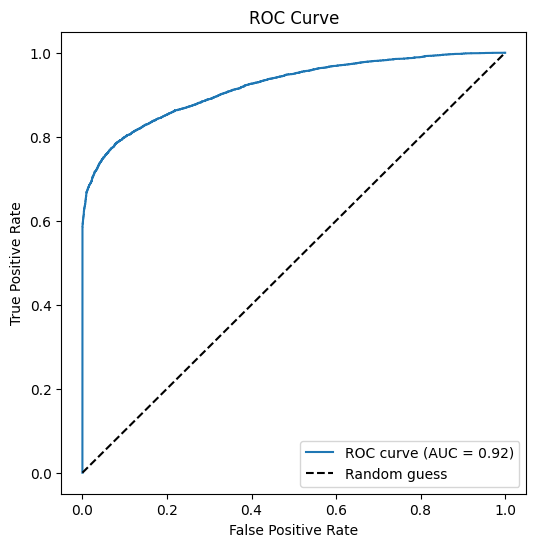

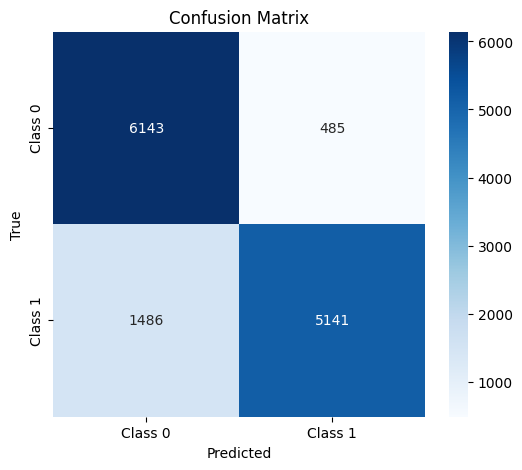

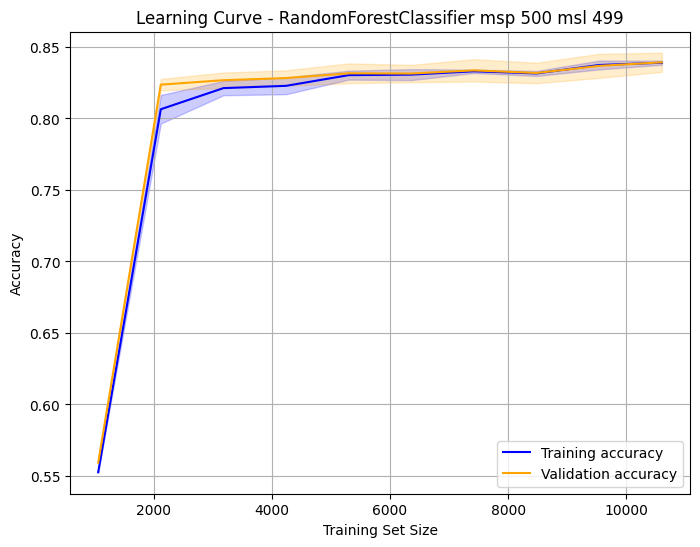

 
(CV) cross_val_score with StratifiedKFold  
MEAN:  0.8234699263332785 
STD:  0.002736959876641746
 

Overall model accuracy
 
Training Accuracy: 0.8274
Test Accuracy: 0.8249
{'0': {'precision': 0.7905031701065696, 'recall': 0.884127942063971, 'f1-score': 0.8346983833060323, 'support': 6628.0}, '1': {'precision': 0.8685381718589524, 'recall': 0.7656556511241889, 'f1-score': 0.8138583687545112, 'support': 6627.0}, 'accuracy': 0.8248962655601659, 'macro avg': {'precision': 0.8295206709827609, 'recall': 0.82489179659408, 'f1-score': 0.8242783760302718, 'support': 13255.0}, 'weighted avg': {'precision': 0.8295177273765085, 'recall': 0.8248962655601659, 'f1-score': 0.8242791621492664, 'support': 13255.0}}
Accuracy: 0.8248962655601659
ROC-AUC Score: 0.9010459055459646


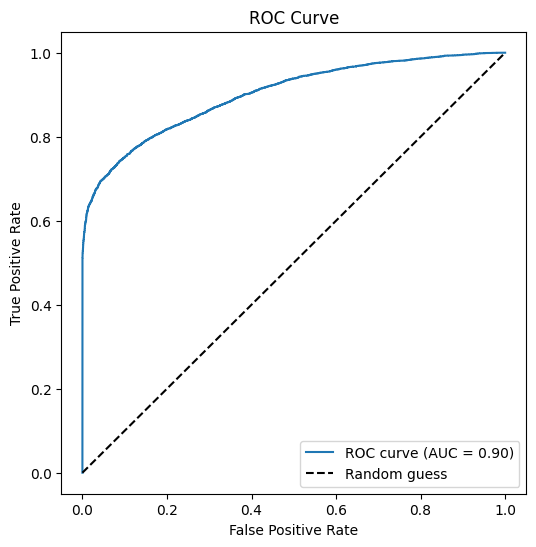

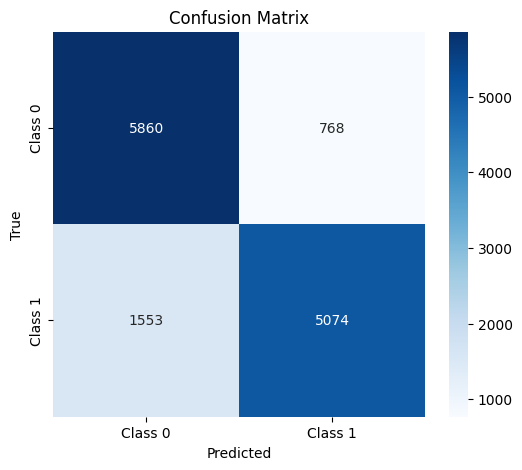

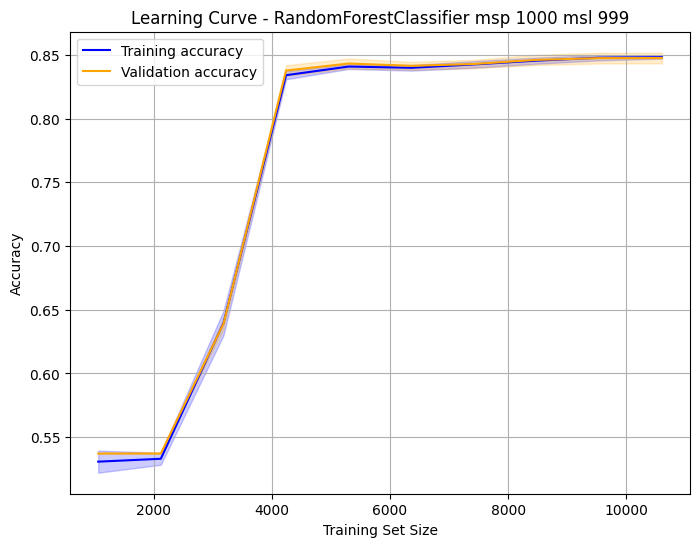

 
(CV) cross_val_score with StratifiedKFold  
MEAN:  0.8028277026125135 
STD:  0.004749574646304515
 

Overall model accuracy
 
Training Accuracy: 0.8103
Test Accuracy: 0.8084
{'0': {'precision': 0.7870786516853933, 'recall': 0.8455039227519614, 'f1-score': 0.8152458539423916, 'support': 6628.0}, '1': {'precision': 0.8330888345558273, 'recall': 0.7712388712841406, 'f1-score': 0.8009716345400407, 'support': 6627.0}, 'accuracy': 0.8083741984156922, 'macro avg': {'precision': 0.8100837431206103, 'recall': 0.808371397018051, 'f1-score': 0.8081087442412161, 'support': 13255.0}, 'weighted avg': {'precision': 0.8100820075422297, 'recall': 0.8083741984156922, 'f1-score': 0.8081092826878176, 'support': 13255.0}}
Accuracy: 0.8083741984156922
ROC-AUC Score: 0.8849288867737084


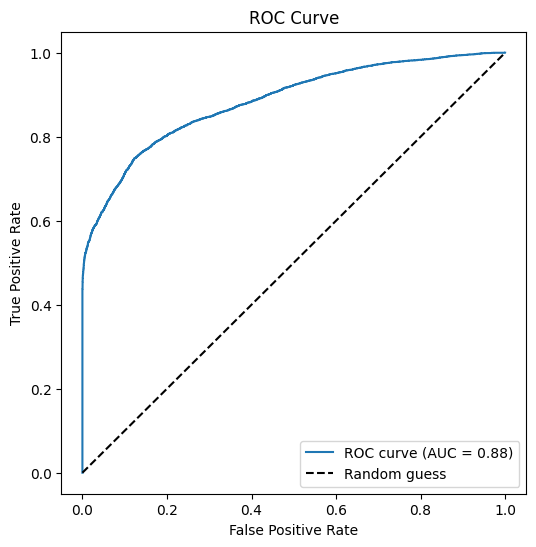

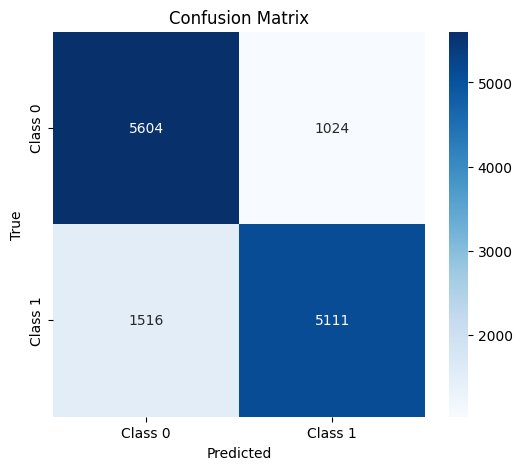

In [ ]:
# below attempt is to tune hyper parameters that are causing the overfitting
# max_depth is restricted to 10
# min_samples_split is set to 5 (only if there are 5 samples in the leaf we will split)
# min_samples_leaf is set to 4 (leaf must have at least 4 samples)

display(HTML("<h2 style='color:green;'>RandomForestClassifier addressing overfitting: min_samples_split=50, min_samples_leaf=49</h2>"))

from sklearn.ensemble import RandomForestClassifier as RFC

t = time.time()

X_train_scaled = X_train
X_test_scaled = X_test

rfc = RFC(n_estimators=100,
          random_state=42,
          max_features=10,
          max_depth=10,         # limit depth
          min_samples_split=50, # need at least 50 samples to split
          min_samples_leaf=49   # leaf must have at least 49 samples
         )
rfc.fit(X_train_scaled, y_train)
y_train_pred = rfc.predict(X_train_scaled)
y_test_pred = rfc.predict(X_test_scaled)

model_prediction_metrics(rfc, ld_cp_res, y_res, X_train, X_test, y_train,
                         y_test, X_test_scaled, y_train_pred, y_test_pred,
                         "RandomForestClassifier msp 50 msl 49")

display(HTML("<h2 style='color:green;'>RandomForestClassifier: min_samples_split=500, min_samples_leaf=499</h2>"))


X_train_scaled = X_train
X_test_scaled = X_test

rfc = RFC(n_estimators=100,
          random_state=42,
          max_features=10,
          max_depth=10,          # limit depth
          min_samples_split=500, # need at least 500 samples to split
          min_samples_leaf=499   # leaf must have at least 499 samples
         )
rfc.fit(X_train_scaled, y_train)
y_train_pred = rfc.predict(X_train_scaled)
y_test_pred = rfc.predict(X_test_scaled)

model_prediction_metrics(rfc, ld_cp_res, y_res, X_train, X_test, y_train,
                         y_test, X_test_scaled, y_train_pred, y_test_pred,
                         "RandomForestClassifier msp 500 msl 499")

display(HTML("<h2 style='color:green;'>RandomForestClassifier: min_samples_split=1000, min_samples_leaf=999</h2>"))

X_train_scaled = X_train
X_test_scaled = X_test

rfc = RFC(n_estimators=100,
          random_state=42,
          max_features=10,
          max_depth=10,           # limit depth
          min_samples_split=1000, # need at least 1000 samples to split
          min_samples_leaf=999    # leaf must have at least 999 samples
         )
rfc.fit(X_train_scaled, y_train)
y_train_pred = rfc.predict(X_train_scaled)
y_test_pred = rfc.predict(X_test_scaled)

model_prediction_metrics(rfc, ld_cp_res, y_res, X_train, X_test, y_train,
                         y_test, X_test_scaled, y_train_pred, y_test_pred,
                         "RandomForestClassifier msp 1000 msl 999")

tt = time.time() - t
display(HTML(f"<h2 style='color:green;'>Time Taken {tt} seconds</h2>"))


## Observations
# min_samples_split (50, 500, 1000) and min_samples_leaf(49, 99, 999), resp'ly, were tried.
# Higher these values, higher the parallellism and closeness seen between training and test learning curves. So, observations made in this context made for DecisionTreeClassifier apply here also.
# RFC took longer time as expected since, DecisionTreeClassifier works on a single tree while RFC trains many trees (100 in above trials). Majority vote is used among results from these trees.
# ROC-AUC is less steeper (more smoother) at lower train set sizes, implying more FPR is seen at lower train set sizes itself w.r.t. DecisionTreeClassifier.

In [ ]:
#
# !! CAUTION - RUNS FOR 2+ HRS !!
# Let's apply random & grid search cross-validation (CV) methods to find
# the best hyper parameters and thus the best performace for RFC.
# This is an automatci way than doing it manually to find best hyper-params.
#

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

t = time.time()

X_train_scaled = X_train
X_test_scaled = X_test

# Define parameter grid using our experiences above for mss & msl
param_dist = {
    'n_estimators': [100, 500],        # number of trees
    'max_depth': [None] + list(np.arange(5, 51, 40)),  # depth of each tree
    'max_features': ['sqrt', 'log2', None],           # features considered for split
    'min_samples_split': [51, 501], #[501, 1001], # min samples to split a node
    'min_samples_leaf':  [50, 500], #[500, 1000], # min samples in a leaf
    'bootstrap': [True, False],                       # bootstrap sampling
    'class_weight': [None, 'balanced']                # handle class imbalance
}

rfc = RFC(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=50,                 # number of random combinations to try
    cv=5,                      # 5-fold cross validation
    verbose=2,
    n_jobs=-1,
    scoring='roc_auc',         # or 'f1', 'accuracy', etc.
    random_state=42,
)

random_search.fit(X_train_scaled, y_train)

print("Best parameters:", random_search.best_params_)
print("Best AUC:", random_search.best_score_)


tt = time.time() - t
display(HTML(f"<h2 style='color:green;'>Time Taken {tt} seconds</h2>"))

'''
OUTPUT: In the next run just use beflow best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 51, 'min_samples_leaf': 50, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': False}
Best AUC: 0.9287897468222652
Time Taken 8090.359530448914 seconds
'''

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 51, 'min_samples_leaf': 50, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': False}
Best AUC: 0.9287897468222652


In [70]:
## GridSearchCV()
# !! CAUTION - RUNS FOR 1.5+ HRS !!

X_train_scaled = X_train
X_test_scaled = X_test

# Define parameter grid using our experiences above for mss & msl
param_grid = {
    'n_estimators': [90, 110],        # number of trees
    'max_depth': [None, 45, 50],  # depth of each tree
    'max_features': ['sqrt'],           # features considered for split
    'min_samples_split': [41, 51, 61], # min samples to split a node
    'min_samples_leaf':  [40, 50, 60], # min samples in a leaf
    'bootstrap': [False],                       # bootstrap sampling
    'class_weight': ['balanced']                # handle class imbalance
}

rfc = RFC(random_state=42)

grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best AUC:", grid_search.best_score_)

tt = time.time() - t
display(HTML(f"<h2 style='color:green;'>Time Taken {tt} seconds</h2>"))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 40, 'min_samples_split': 41, 'n_estimators': 110}
Best AUC: 0.9312790165329268


## Observations
# Performed RandomeSearchCV and GridSearchCV with different hyper parameter sets. This generates a lot of combinations to be tried taking execution time beyond 2 hours for the former and close to 4 hours together.
# This is prohibitive for frequent runs and should be tried a very limited number of times making a better correction in the hyper parameter choices and finalyzing the actual hyper parameter set for the final model.
# This is done here ONLY for curiosity sake and could be avoided as the  accuracies are already above required 80% minimum.
# CV implies coss-validation folds in data set employed during training.

Training Accuracy: 0.8857
Test Accuracy: 0.8723


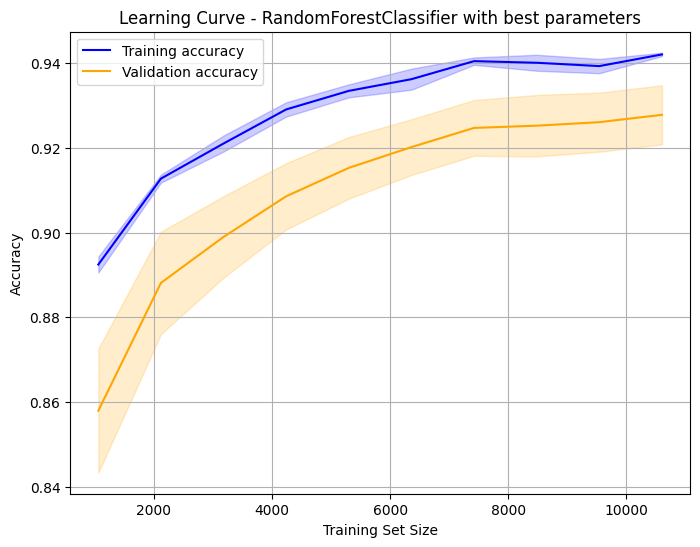

 
(CV) cross_val_score with StratifiedKFold  
MEAN:  0.8695075089464318 
STD:  0.002148769357061543
 

Overall model accuracy
 
Training Accuracy: 0.8857
Test Accuracy: 0.8723
{'0': {'precision': 0.8252273625939106, 'recall': 0.9446288473144236, 'f1-score': 0.8809004572634541, 'support': 6628.0}, '1': {'precision': 0.9352505292872265, 'recall': 0.7999094612947035, 'f1-score': 0.8623017486783245, 'support': 6627.0}, 'accuracy': 0.8722746133534516, 'macro avg': {'precision': 0.8802389459405686, 'recall': 0.8722691543045635, 'f1-score': 0.8716011029708893, 'support': 13255.0}, 'weighted avg': {'precision': 0.8802347956890901, 'recall': 0.8722746133534516, 'f1-score': 0.8716018045442046, 'support': 13255.0}}
Accuracy: 0.8722746133534516
ROC-AUC Score: 0.9327816819672706


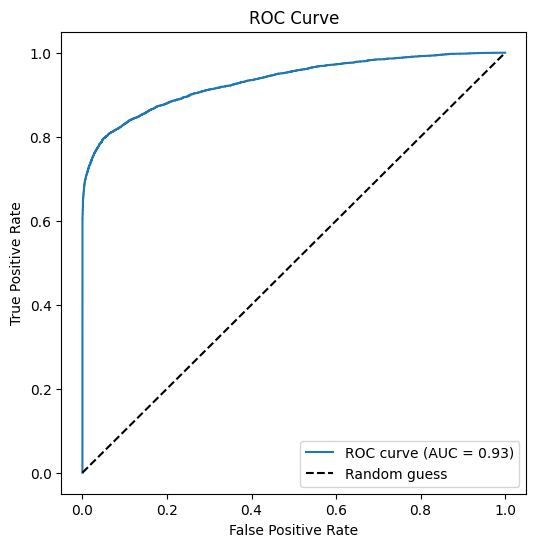

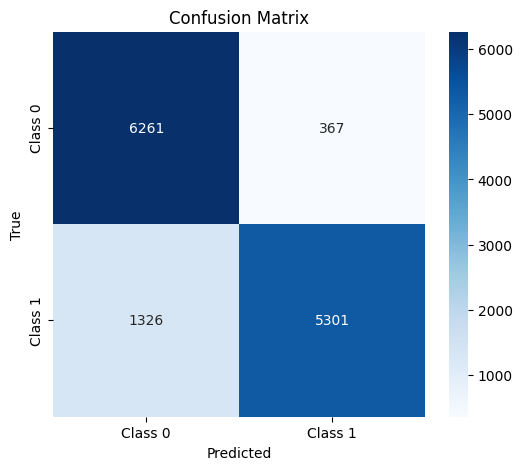

In [71]:
#
# From the above experiments with Random and Grid search CV methods, following parameters are given as best.
# We finalize the model and the hyper params using these, run the model and measure the metrics now.
#
t = time.time()

X_train_scaled = X_train
X_test_scaled = X_test

'''
# Get best parameters
best_params = grid_search.best_params_

rfc = RFC(
           **best_params,
           random_state=42,
          )

rfc.fit(X_train_scaled, y_train)
'''
final_model = grid_search.best_estimator_
y_train_pred = final_model.predict(X_train_scaled)
y_test_pred = final_model.predict(X_test_scaled)

train_accuracy_value = ac(y_train, y_train_pred)
test_accuracy_value = ac(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy_value:.4f}")
print(f"Test Accuracy: {test_accuracy_value:.4f}")

model_prediction_metrics(final_model, ld_cp_res, y_res, X_train, X_test, y_train,
                         y_test, X_test_scaled, y_train_pred, y_test_pred,
                         "RandomForestClassifier with best parameters")

tt = time.time() - t
display(HTML(f"<h2 style='color:green;'>Time Taken {tt} seconds</h2>"))

## Observations
# The final set of hyper parameters gave an AUC of 93 and accuracies > 88% implying the resulting final RFC model is pretty good.
# Further, lower class 1 threshold should be used for lowering the False Negatives.

Training Accuracy: 0.9241
Test Accuracy: 0.9126


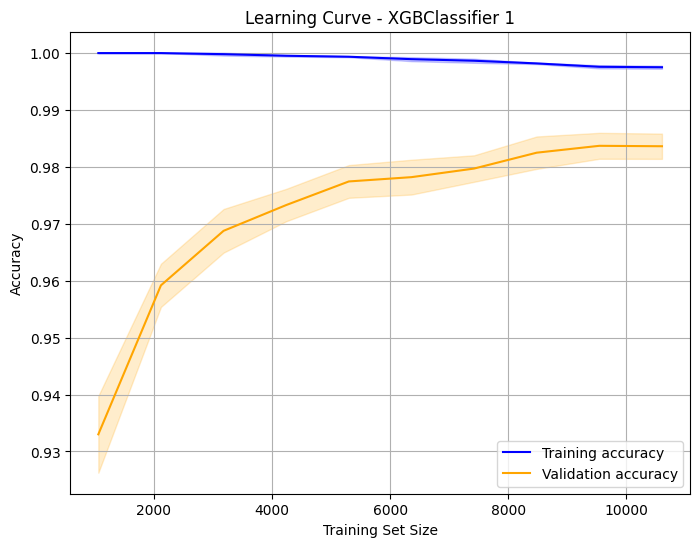

 
(CV) cross_val_score with StratifiedKFold  
MEAN:  0.9112445895780764 
STD:  0.0014722282501738158
 

Overall model accuracy
 
Training Accuracy: 0.9241
Test Accuracy: 0.9126
{'0': {'precision': 0.856101054824847, 'recall': 0.991852745926373, 'f1-score': 0.9189907038512616, 'support': 6628.0}, '1': {'precision': 0.9903156384505022, 'recall': 0.8332578844122529, 'f1-score': 0.9050233549127263, 'support': 6627.0}, 'accuracy': 0.9125612976235383, 'macro avg': {'precision': 0.9232083466376746, 'recall': 0.9125553151693129, 'f1-score': 0.912007029381994, 'support': 13255.0}, 'weighted avg': {'precision': 0.9232032838468928, 'recall': 0.9125612976235383, 'f1-score': 0.912007556252946, 'support': 13255.0}}
Accuracy: 0.9125612976235383
ROC-AUC Score: 0.9497604895173355


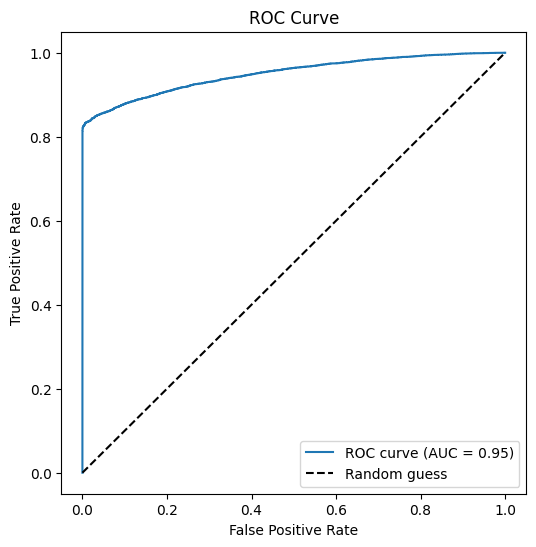

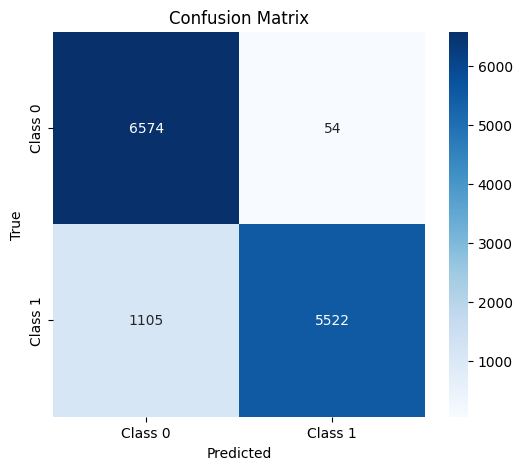

In [66]:
# XGboost

display(HTML("<h2 style='color:green;'>XGBClassifier</h2>"))

from xgboost import XGBClassifier as XGBC

X_train_scaled = X_train
X_test_scaled = X_test

xgb = XGBC(
           n_estimators=500,          # more trees
           learning_rate=0.05,        # lower learning rate
           max_depth=6,               # limit tree depth
           min_child_weight=3,        # avoid too-specific splits
           subsample=0.8,             # row sampling
           colsample_bytree=0.8,      # feature sampling
           gamma=0.1,                 # minimum loss reduction
           reg_alpha=0.1,             # L1 regularization
           reg_lambda=1.0,            # L2 regularization
           scale_pos_weight=1,        # adjust for imbalance if needed
           objective="binary:logistic",
           eval_metric="auc",
           random_state=42,
           use_label_encoder=False
          )
xgb.fit(X_train_scaled, y_train)
y_train_pred = xgb.predict(X_train_scaled)
y_test_pred = xgb.predict(X_test_scaled)

train_accuracy_value = ac(y_train, y_train_pred)
test_accuracy_value = ac(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy_value:.4f}")
print(f"Test Accuracy: {test_accuracy_value:.4f}")

model_prediction_metrics(xgb, ld_cp_res, y_res, X_train, X_test, y_train,
                         y_test, X_test_scaled, y_train_pred, y_test_pred, "XGBClassifier 1")

tt = time.time() - t
display(HTML(f"<h2 style='color:green;'>Time Taken {tt} seconds</h2>"))

## Observations
# XGBoostClassifier started performing very well in the initial attempt itself with 500 trees, .05 learning rate and a max_depth of 6.
# Training phase started with 100% correct predictions at lower training set sizes and gradually tapered a tiny little bit towards higher sizes.
# Validation accuracy started at 93% and rose to > 98% towards higher sizes.
# There is no overfitting since test phase also showed above 95% accuracy.
# Of course, at the lower training sizes the difference between training anf test accuracies is higher implying a bit of overfitting, which got resolved as size increased.
# There is no underfitting either since both accuracies are way above 70-75%.

In [67]:
#
# Now, let's try RandomizedSearchCV and GridSearchCV for automatic paramater tuning
# COMMENTED OUT AS IT'S TAKING FOREVER (>4 HRS) TO COMPLETE
# Instead random & grid search are tried in the next secion.
#
'''
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

X_train_scaled = X_train
X_test_scaled = X_test

xgb = XGBC(
           objective="binary:logistic",
           eval_metric="auc",
           random_state=42,
           use_label_encoder=False
          )

# Parameter distributions
param_dist = {
    "n_estimators": [200, 500, 800],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.3, 0.5],
    "reg_alpha": [0, 0.01, 0.1, 1],
    "reg_lambda": [0.5, 1, 2]
}

# Random search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,                # number of parameter settings sampled
    scoring="roc_auc",        # evaluation metric
    cv=3,                     # cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

print("Best parameters:", random_search.best_params_)
print("Best AUC:", random_search.best_score_)
'''

'\nfrom sklearn.model_selection import RandomizedSearchCV, GridSearchCV\n\nX_train_scaled = X_train\nX_test_scaled = X_test\n\nxgb = XGBC(\n           objective="binary:logistic",\n           eval_metric="auc",\n           random_state=42,\n           use_label_encoder=False\n          )\n\n# Parameter distributions\nparam_dist = {\n    "n_estimators": [200, 500, 800],\n    "learning_rate": [0.01, 0.05, 0.1, 0.2],\n    "max_depth": [3, 5, 7, 10],\n    "min_child_weight": [1, 3, 5],\n    "subsample": [0.6, 0.8, 1.0],\n    "colsample_bytree": [0.6, 0.8, 1.0],\n    "gamma": [0, 0.1, 0.3, 0.5],\n    "reg_alpha": [0, 0.01, 0.1, 1],\n    "reg_lambda": [0.5, 1, 2]\n}\n\n# Random search\nrandom_search = RandomizedSearchCV(\n    estimator=xgb,\n    param_distributions=param_dist,\n    n_iter=20,                # number of parameter settings sampled\n    scoring="roc_auc",        # evaluation metric\n    cv=3,                     # cross-validation folds\n    verbose=2,\n    random_state=42,\n  

In [68]:
# Wherever lower/upper limits happen to be best parameters, try a covering range until some inner value becomes the best param.
# Then we can try a more tighter GridSearch covering these params
# In the (previous) attempt 1, the best params are:
'''
param_dist = {
    "n_estimators": [200, 500, 800],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.3, 0.5],
    "reg_alpha": [0, 0.01, 0.1, 1],
    "reg_lambda": [0.5, 1, 2]
}

#   Fitting 3 folds for each of 20 candidates, totalling 60 fits
#   Best parameters: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 1.0}
#   Best AUC: 0.9486131530778668
# Attempt 2:

param_dist = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1,],
    "max_depth": [7, 10, 15, 20],
    "min_child_weight": [1, 3, 5, 7, 10],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.8, 1.0, 1.4, 1.8],
    "gamma": [0, 0.1, 0.3, 0.5],
    "reg_alpha": [0.05, 0.08, 0.1, 0.2, 0.5],
    "reg_lambda": [0.3, 0.4, 0.5, 0.6, 0.7]
}

#   Fitting 3 folds for each of 20 candidates, totalling 60 fits
#   Best parameters: {'subsample': 0.6, 'reg_lambda': 0.4, 'reg_alpha': 0.2, 'n_estimators': 300, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 1.0}
#   Best AUC: 0.9478681149994751

Attempt 3:
param_dist = {
    "subsample": [0.2, 0.4, 0.6],
    "reg_lambda": [0.2, 0.3, 0.4, 0.5],
    "reg_alpha": [0.1, 0.2, 0.3],
    "n_estimators": [300, 500, 700],
    "min_child_weight": [6, 7, 8],
    "max_depth": [7, 10, 15, 20],
    "learning_rate": [0.01, 0.05, 0.1,],
    "gamma": [0, 0.1, 0.3, 0.5],
    "colsample_bytree": [0.8, 1.0, 1.4, 1.8]
}

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 0.6, 'reg_lambda': 0.4, 'reg_alpha': 0.3, 'n_estimators': 700, 'min_child_weight': 7, 'max_depth': 15, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best AUC: 0.9497033334813194

Attempt 4:
param_dist = {
    "subsample": [0.4, 0.6, 0.8, 1.0],
    "reg_lambda": [0.3, 0.4, 0.5],
    "reg_alpha": [0.1, 0.2, 0.3],
    "n_estimators": [600, 700, 900, 1100],
    "min_child_weight": [6, 7, 8],
    "max_depth": [7, 10, 15, 20],
    "learning_rate": [0.001, 0.005, 0.01, 0.02],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.2, 0.5, 0.8, 1.0]
}

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 0.8, 'reg_lambda': 0.3, 'reg_alpha': 0.1, 'n_estimators': 600, 'min_child_weight': 6, 'max_depth': 20, 'learning_rate': 0.005, 'gamma': 0, 'colsample_bytree': 0.5}
Best AUC: 0.951042159575033

Attempt 5:
param_dist = {
    "subsample": [0.6, 0.8, 1.0],
    "reg_lambda": [.05, 0.1, 0.3, 0.4],
    "reg_alpha": [0.0, 0.05, 0.1, 0.2],
    "n_estimators": [400, 600, 700],
    "min_child_weight": [4, 6, 7],
    "max_depth": [15, 20, 40, 60],
    "learning_rate": [0.001, 0.005, 0.01],
    "gamma": [0, 0.04, 0.08],
    "colsample_bytree": [0.2, 0.5, 0.8]
}

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 1.0, 'reg_lambda': 0.05, 'reg_alpha': 0.0, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 60, 'learning_rate': 0.001, 'gamma': 0, 'colsample_bytree': 0.5}
Best AUC: 0.9533544326983616

Attempt 6:
param_dist = {
    "subsample": [0.8, 1.0, 1.2],
    "reg_lambda": [0, 0.03, .05, 0.07],
    "reg_alpha": [0.0, 0.01, 0.03],
    "n_estimators": [100, 250, 400, 500],
    "min_child_weight": [4, 6, 7],
    "max_depth": [50, 60, 80, 100],
    "learning_rate": [0.0001, .0005, 0.0008, 0.001],
    "gamma": [0, 0.01],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


'''

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
t = time.time()

X_train_scaled = X_train
X_test_scaled = X_test

xgb = XGBC(
           objective="binary:logistic",
           eval_metric="auc",
           random_state=42,
           use_label_encoder=False
          )

# Parameter distributions
param_dist = {
    "subsample": [0.8, 1.0, 1.2],
    "reg_lambda": [0, 0.03, .05, 0.07],
    "reg_alpha": [0.0, 0.01, 0.03],
    "n_estimators": [100, 250, 400, 500],
    "min_child_weight": [4, 6, 7],
    "max_depth": [50, 60, 80, 100],
    "learning_rate": [0.0001, .0005, 0.0008, 0.001],
    "gamma": [0, 0.01],
    "colsample_bytree": [0.3, 0.5, 0.7]
}

# Random search
xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,                # number of parameter settings sampled
    scoring="roc_auc",        # evaluation metric
    cv=3,                     # cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random_search.fit(X_train_scaled, y_train)

print("Best parameters:", xgb_random_search.best_params_)
print("Best AUC:", xgb_random_search.best_score_)

tt = time.time() - t
display(HTML(f"<h2 style='color:green;'>Time Taken {tt} seconds</h2>"))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 0.8, 'reg_lambda': 0.03, 'reg_alpha': 0.0, 'n_estimators': 250, 'min_child_weight': 4, 'max_depth': 60, 'learning_rate': 0.0005, 'gamma': 0, 'colsample_bytree': 0.5}
Best AUC: 0.9528036154692651


## Observations:

# After 5 iterations with RandomizedSearchCV() (not sure if this narrowing is automatically doen by Grid), we have the following parameters:
# Fitting 3 folds for each of 20 candidates, totalling 60 fits
# Best parameters: {'subsample': 1.0, 'reg_lambda': 0.05, 'reg_alpha': 0.01, 'n_estimators': 500, 'min_child_weight': 4, 'max_depth': 50, 'learning_rate': 0.001, 'gamma': 0, 'colsample_bytree': 0.3}
# Best AUC: 0.9526789300964382

# * In combination with the previous attempts, following center points will be supplied to GridSearch for a tighter search around them:

    "subsample": [0.8, 1.2],

    "reg_lambda": [0.03, 0.07],

    "reg_alpha": [0.0, 0.01, 0.03],

    "n_estimators": [200, 250, 300],

    "min_child_weight": [3, 5],

    "max_depth": [55, 65],

    "learning_rate": [0.0004, 0.0005],

    "colsample_bytree": [0.45, 0.55]


In [69]:
## GridSearchCV()
## CAUTION: RUNS FOR AN 1 Hr 45 Mins+
### The final hyper param combination took only 34 mins
'''

Attempt 1: CAUTION- RAN FOR 3 HOURS
param_grid = {

    "subsample": [0.8, 1.2],

    "reg_lambda": [0.03, 0.07],

    "reg_alpha": [0.0, 0.01, 0.03],

    "n_estimators": [400, 600],

    "min_child_weight": [2, 6],

    "max_depth": [40, 60],

    "learning_rate": [0.0008, 0.0012],

    "colsample_bytree": [0.2, 0.4]
}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
Best parameters: {'colsample_bytree': 0.4, 'learning_rate': 0.0012, 'max_depth': 60, 'min_child_weight': 2, 'n_estimators': 600, 'reg_alpha': 0.0, 'reg_lambda': 0.07, 'subsample': 0.8}
Best AUC: 0.955649711947082

Attemp 2:

param_grid = {

    "subsample": [0.6, 1.2],

    "reg_lambda": [0.03, 0.07],

    "reg_alpha": [0.0],

    "n_estimators": [400, 800],

    "min_child_weight": [2],

    "max_depth": [40, 80],

    "learning_rate": [0.0008, 0.002],

    "colsample_bytree": [0.3, 0.6]
}

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.0008, 'max_depth': 40, 'min_child_weight': 2, 'n_estimators': 800, 'reg_alpha': 0.0, 'reg_lambda': 0.03, 'subsample': 0.6}
Best AUC: 0.9548878095131776
'''
t = time.time()

X_train_scaled = X_train
X_test_scaled = X_test

xgb = XGBC(
           objective="binary:logistic",
           eval_metric="auc",
           random_state=42,
           use_label_encoder=False
          )

'''
Attempt 3:
param_grid = {

    "subsample": [0.6, 1.2],

    "reg_lambda": [0.03, 0.07],

    "reg_alpha": [0.0],

    "n_estimators": [400, 800],

    "min_child_weight": [2],

    "max_depth": [40, 80],

    "learning_rate": [0.0008, 0.002],

    "colsample_bytree": [0.3, 0.6]
}
'''

# Attempt 4:
param_grid = {

    "subsample": [0.8, 1.2],

    "reg_lambda": [0.03, 0.07],

    "reg_alpha": [0.0],

    "n_estimators": [250],

    "min_child_weight": [3, 5],

    "max_depth": [55, 65],

    "learning_rate": [0.0004, 0.0005],

    "colsample_bytree": [0.45, 0.55]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best AUC:", grid_search.best_score_)

tt = time.time() - t
display(HTML(f"<h2 style='color:green;'>Time Taken {tt} seconds</h2>"))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'colsample_bytree': 0.45, 'learning_rate': 0.0005, 'max_depth': 65, 'min_child_weight': 3, 'n_estimators': 250, 'reg_alpha': 0.0, 'reg_lambda': 0.03, 'subsample': 0.8}
Best AUC: 0.9548147091205565


Observations:


## Observations

# - Document your observations

# 1) It's been observed that all the 3 models (Logistic Regression, Random Forset and decision tree) are able to predict the outcomes accurately.
# 2) The data supplied to all models is also well balanced.
# 3) Training and test accuracies are 100%
# 4) The ROC-AUC score is also 1.0 implying the models are perfect.

Training Accuracy: 1.0000
Test Accuracy: 0.9120


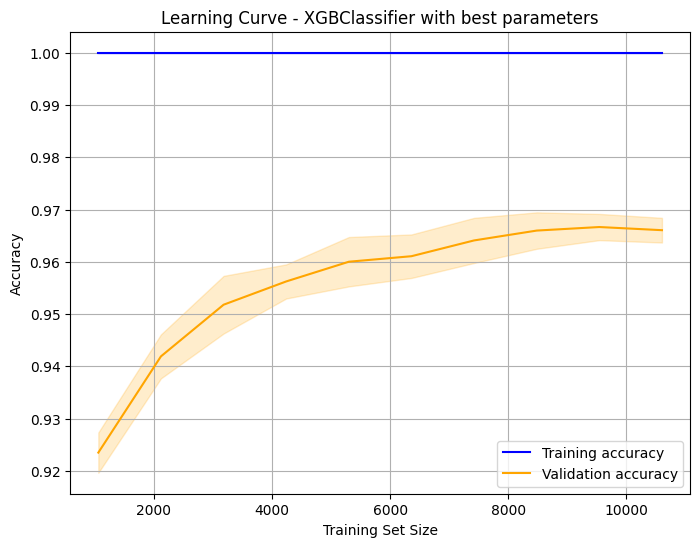

 
(CV) cross_val_score with StratifiedKFold  
MEAN:  0.9115463636323792 
STD:  0.002364736172838865
 

Overall model accuracy
 
Training Accuracy: 1.0000
Test Accuracy: 0.9120
{'0': {'precision': 0.8635334842231394, 'recall': 0.9785757392878697, 'f1-score': 0.9174623382134521, 'support': 6628.0}, '1': {'precision': 0.9752785515320335, 'recall': 0.8453297117851215, 'f1-score': 0.9056664780535122, 'support': 6627.0}, 'accuracy': 0.9119577517917767, 'macro avg': {'precision': 0.9194060178775865, 'recall': 0.9119527255364956, 'f1-score': 0.9115644081334822, 'support': 13255.0}, 'weighted avg': {'precision': 0.9194018026732368, 'recall': 0.9119577517917767, 'f1-score': 0.9115648530923716, 'support': 13255.0}}
Accuracy: 0.9119577517917767
ROC-AUC Score: 0.9519666533071534


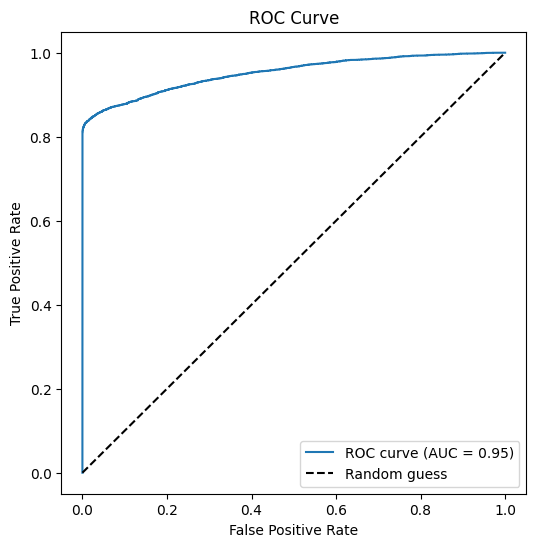

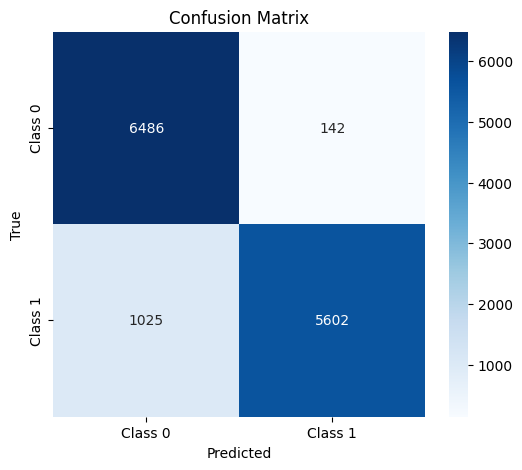

In [70]:
# FINAL XGB FINDINGS WITH GRID SEARCH BEST PARAMS ABOVE
#
# From the above experiments with Random and Grid search CV methods, following parameters have been finalized.
# We finalize the model and the hyper params using these, run the model and measure the metrics now.
#
t = time.time()

X_train_scaled = X_train
X_test_scaled = X_test

# Get best parameters
#best_xgb_params = {'colsample_bytree': 0.45, 'learning_rate': 0.0005, 'max_depth': 65, 'min_child_weight': 3, 'n_estimators': 250, 'reg_alpha': 0.0, 'reg_lambda': 0.03, 'subsample': 0.8} #grid_search.best_params_

'''
           colsample_bytree=0.45,
           learning_rate=0.0005,
           max_depth=65,
           min_child_weight=3,
           n_estimators=250,
           reg_alpha=0.0,
           reg_lambda=0.03,
           subsample=0.8,

           n_estimators=500,          # more trees
           learning_rate=0.05,        # lower learning rate
           max_depth=6,               # limit tree depth
           min_child_weight=3,        # avoid too-specific splits
           subsample=0.8,             # row sampling
           colsample_bytree=0.8,      # feature sampling
           gamma=0.1,                 # minimum loss reduction
           reg_alpha=0.1,             # L1 regularization
           reg_lambda=1.0,            # L2 regularization
           scale_pos_weight=1,        # adjust for imbalance if needed
'''

best_xgb = XGBC(
           n_estimators=500,          # more trees
           learning_rate=0.07,        # lower learning rate
           max_depth=20,               # limit tree depth
           min_child_weight=3,        # avoid too-specific splits
           subsample=0.8,             # row sampling
           colsample_bytree=0.8,      # feature sampling
           gamma=0.1,                 # minimum loss reduction
           reg_alpha=0.1,             # L1 regularization
           reg_lambda=1.0,            # L2 regularization
           scale_pos_weight=1,        # adjust for imbalance if needed
           objective="binary:logistic",
           eval_metric="auc",
           random_state=42,
           use_label_encoder=False,
          )

best_xgb.fit(X_train_scaled, y_train)
y_train_pred = best_xgb.predict(X_train_scaled)
y_test_pred = best_xgb.predict(X_test_scaled)

train_accuracy_value = ac(y_train, y_train_pred)
test_accuracy_value = ac(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy_value:.4f}")
print(f"Test Accuracy: {test_accuracy_value:.4f}")

model_prediction_metrics(best_xgb, ld_cp_res, y_res, X_train, X_test, y_train,
                         y_test, X_test_scaled, y_train_pred, y_test_pred,
                         "XGBClassifier with best parameters")

tt = time.time() - t
display(HTML(f"<h2 style='color:green;'>Time Taken {tt} seconds</h2>"))

## Observations:
# This is not a bad result as both training accuracy is 100 % and test accuracy is > 91%.

# But, the confusion matrix shows some imbalance: being a bit aggressive in predicting Flase Positives for class 1 (1025) and conservative for to predict Flase Negatives for class 0 (142). Please note that we are analyzing from the point of view of CLass-1 (Defaults). Based on how we look at it, naming of FP & FN can be swapped.

# One way to balance this asymmetry is to use a lower threshold in predicting class 1 TN's as we did in pre-imputation.

# This is okay since we have only 142 FP - we have more room to move some TPs there.

# Let's try lower thresholds for class 1 now and see how that would help striking a balance between FP & FN counts. Predicting both good and bad loans is important for business.

# 1. Get the right threshld systematically using the precision-recall curve

# 2. Using that threshold let's recompute the confusion matrix


Confusion Matrix with 0.11 as class 1 threshold
 [[5320 1308]
 [ 592 6035]]

Train Accuracy: 0.9993209725182489
Test Accuracy: 0.8566578649566201

Since, we have decided to adjust the thresholds, Test accuracy took a hit.
But, as per the business goal, we are trying to balance both False Positives
and False Negatives, so that real defaulters are not granted loans (higher FN for class 1).

We can adjust thresholds to be overcautious in our decision making for both Fully-Paid
as well as Charged-off cases, i.e., either of them could be made 100% at the cost of the other.



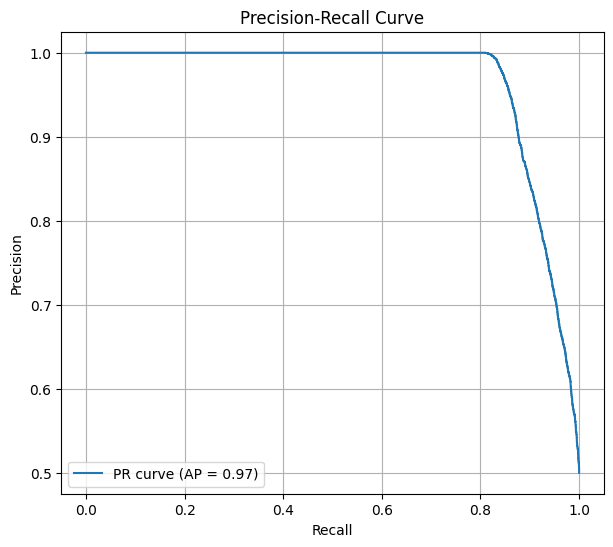

In [78]:
display(HTML("<h2 style='color:green;'>Adjusting class threshold - post porcessing</h2>"))

from sklearn.metrics import precision_recall_curve
t = time.time()

c1_threshold = .11

y_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]

y_pred_custom = (y_proba >= c1_threshold).astype(int)
print(f"\nConfusion Matrix with {c1_threshold} as class 1 threshold\n", confusion_matrix(y_test, y_pred_custom))

# For this model, a threshold of c1_threshold worked the best to resolve the asymmetry between classes 0 & 1
# So, let's check the accuracy scores again with the new custom y' prediction.

# train
y_train_proba = best_xgb.predict_proba(X_train_scaled)[:, 1]
y_test_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]
y_train_pred = (y_train_proba >= c1_threshold).astype(int)

# test
y_test_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]
y_test_pred = (y_test_proba >= c1_threshold).astype(int)

# compute & print new accuracies
train_acc = ac(y_train, y_train_pred)
test_acc = ac(y_test, y_test_pred)

print("\nTrain Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("\nSince, we have decided to adjust the thresholds, Test accuracy took a hit.")
print("But, as per the business goal, we are trying to balance both False Positives")
print("and False Negatives, so that real defaulters are not granted loans (higher FN for class 1).")
print("\nWe can adjust thresholds to be overcautious in our decision making for both Fully-Paid")
print("as well as Charged-off cases, i.e., either of them could be made 100% at the cost of the other.\n")

# Although the best hyper parameter choosing procedure is carried out only for XGBoostClassifer,
# for time sake, ideally it should be perfomed on all the tried model above to choose the best one.

from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)

# Average Precision (area under PR curve)
ap = average_precision_score(y_test, y_test_proba)

# Plot
plt.figure(figsize=(7, 6))
plt.plot(recall, precision, label=f'PR curve (AP = {ap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

tt = time.time() - t
display(HTML(f"<h2 style='color:green;'>Time Taken {tt} seconds</h2>"))

In [84]:
for c1_threshold in np.arange(.01, .20, .01):

  y_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]

  y_pred_custom = (y_proba >= c1_threshold).astype(int)
  print(f"\nConfusion Matrix with {c1_threshold} as class 1 threshold\n", confusion_matrix(y_test, y_pred_custom))


Confusion Matrix with 0.01 as class 1 threshold
 [[1832 4796]
 [  83 6544]]

Confusion Matrix with 0.02 as class 1 threshold
 [[2857 3771]
 [ 168 6459]]

Confusion Matrix with 0.03 as class 1 threshold
 [[3504 3124]
 [ 256 6371]]

Confusion Matrix with 0.04 as class 1 threshold
 [[3953 2675]
 [ 308 6319]]

Confusion Matrix with 0.05 as class 1 threshold
 [[4289 2339]
 [ 365 6262]]

Confusion Matrix with 0.060000000000000005 as class 1 threshold
 [[4542 2086]
 [ 413 6214]]

Confusion Matrix with 0.06999999999999999 as class 1 threshold
 [[4761 1867]
 [ 455 6172]]

Confusion Matrix with 0.08 as class 1 threshold
 [[4924 1704]
 [ 495 6132]]

Confusion Matrix with 0.09 as class 1 threshold
 [[5090 1538]
 [ 539 6088]]

Confusion Matrix with 0.09999999999999999 as class 1 threshold
 [[5218 1410]
 [ 565 6062]]

Confusion Matrix with 0.11 as class 1 threshold
 [[5320 1308]
 [ 592 6035]]

Confusion Matrix with 0.12 as class 1 threshold
 [[5418 1210]
 [ 620 6007]]

Confusion Matrix with 0.13 as

## Observations

# Since, the goal is to predict the defaulting loans better,
tried to set lower thresholds for class 1; that brought the ccuracies down a bit, but the precision-recall curve remained fine bowing to the top right.

# The AP is 97% which is very high, achieving a very high precision–recall tradeoff.

# The training accuracy is ~1.0 and the test's is 86%.

# Also, tried different thresholds from .01 to .20 for class; at .19 both classes balanced out pretty close, if in case, the business is to have equal chance for good loand ans bad loans.

Next go ahead and build a decision tree and other models using the similar steps as above

Note
- You can build additional models as well
- Make sure you're performing the necessary steps to evaluate the model

Ensure that the following is done:

- The accuracy/precision/recall of the best model is at least between 80%
- All the necessary hyperparameter tuning, and regularization techniques (if needed) have been applied
- There's no overfitting

## Summary

Good work completing all the steps till now!
Now, go ahead and summarize your entire work and findings below:

-

-

-

FOLLOWING MODELS HAVE BEEN TRIED AND RESULTS CAPTURED: * XGBOOST * looked more promising across all models while LogisticRegression was the fastest with acceptable results.

* Since, observations are made after each cell already, will keep the summary short below.

1. Dataset was read from the location mentioned
2. Some initial perusal of the dataset was done using well-knonw pandas methods.
3. In data processing, removed unwanted characters from the column values and converted them to the datatyps they were meant to be.
4. Some non-contributing feautres were dropped as advised.
5. Wherever required original loan_data copies were used.
6. Missing values were imputed using different methods so that the original character or relationships between features and target variable are not badly affected. This has been a very learning and BIG exercise!
7. Appropriate Categorical feature encoding was done as different methods employed in above step required all features to be numerical.
8. Using correlation matrix highly correlating features were dropped (only one of them was kept).
9. Univarariate and Bi-variate analyses were carried out using a lot stistics methods and plots. This was a great experience!! The scikit libraries are so rich in drawing very amzing plots which are so self-explanatory and can describe a feature in one notice. A picture is equal to a 1000 words!
10. Before model building, loan_data copy was reused which already had pre-processed encoded features already.
11. Numerical & categorical feature masks were used wherever required.
12. Below models were built and results analyzed after each code cell. Random and Grid search CV methods were used for detailed hyper parameter tuning. ROC-AUC curves, accuracy scores, learning curves, confusion matrices, etc metrics were used to analyze the results. Preferred XGBoost method over all of the below which gave the best results.
13. Class thresholds were used in post-processing after model prediction to balance the false positives and flase negatives so that we get a fair prediction for both classes.

LOGISTIC REGRESSION

DECISION TREES

RANDOMFOREST

XGBOOST

---

### **Some Python libraries that are worth exploring for similar projects**
  - **tqdm**: A Python library used to create progress bars for iterables. It provides visual feedback on the progress of long-running operations, making it easier to track the execution time and estimate the remaining time.
  - **Low-code learning libraries** Use lazypredict or PyCaret to compare the performance of multiple Machine Learning models simultaneously. *The best part is that you only need to write fewer than 10 lines of code.*
  - **Explainable AI**: Understand model decisions through techniques like LIME or SHAP.

In [ ]:
Further investigations can be made by using some non-linear models to see if they can provide even better results in predicting both classes.
Many models that supported class-weight balance did not meet the requirement to predict better than 80%.
SMOTE'ing helped achieve higher prediction probabilities.

Doing PCA could have helped with dimensionality reduction and speed up execution times.

ACKNOWLEDGEMENTS:

THANKS FOR GIVING US THIS EXCELLENT PROJECT AND OPPORTUNITY TO HELP US UNDERSTAND THE CLASSICAL ML CONCEPTS REALL WELL.

